In [208]:
setwd('/home/thlamp/tcga/bladder_results')

In [209]:
library(TCGAbiolinks)
library(SummarizedExperiment)
library(sesameData)
library(sesame)
library(dbplyr)
library(ggplot2)
library(survminer)
library(pheatmap)
library(dplyr)
library(biomaRt)
library(DESeq2)
library(MOFA2)
library(MOFAdata)
library(impute)

# mRNA

In [268]:
dataPrep <- readRDS("downloaded_dataPrep.rds")

## DESeq2 for MOFA

In [80]:
identical(colnames(assay(dataPrep,"unstranded")), colData(dataPrep)$barcode)

[1] TRUE

In [81]:
# Create a DESeqDataSet object
dds <- DESeqDataSetFromMatrix(countData = assay(dataPrep,"unstranded"),
                              colData = colData(dataPrep),
                              design = ~ shortLetterCode)

# Estimate size factors
dds <- estimateSizeFactors(dds)

# Perform variance-stabilizing transformation with design information
vsd <- varianceStabilizingTransformation(dds, blind = FALSE)

# Extract the normalized counts
normalized_counts <- assay(vsd)

head(normalized_counts, 2)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


TCGA-CU-A3KJ-01A-11R-A21D-07 TCGA-K4-A3WU-01B-11R-A23N-07
ENSG00000000003.15 11.0550661                   13.948765                   
ENSG00000000005.6   0.9656929                    3.917102                   
                   TCGA-DK-A3IU-01A-11R-A20F-07 TCGA-GV-A40G-01A-11R-A23N-07
ENSG00000000003.15 9.546326                     12.952404                   
ENSG00000000005.6  1.864089                      2.327022                   
                   TCGA-DK-A3IN-01A-11R-A20F-07 TCGA-SY-A9G0-01A-12R-A38B-07
ENSG00000000003.15 12.0431342                   11.074673                   
ENSG00000000005.6   0.9656929                    3.082569                   
                   TCGA-XF-A9SU-01A-31R-A39I-07 TCGA-UY-A78O-01A-12R-A33J-07
ENSG00000000003.15 12.429122                    13.645186                   
ENSG00000000005.6   2.600421                     2.039279                   
                   TCGA-GD-A2C5-01A-12R-A180-07 TCGA-G2-A2EK-01A-22R-A18C-07 ⋯
ENSG00000000003.15 13.040419                    13.7640291                   ⋯
ENSG00000000005.6   2.188613                     0.9656929                   ⋯
                   TCGA-DK-A1AD-01A-11R-A13Y-07 TCGA-XF-AAMJ-01A-11R-A42T-07
ENSG00000000003.15 14.401186                    12.2145779                  
ENSG00000000005.6   3.012336                     0.9656929                  
                   TCGA-DK-A1A6-01A-11R-A13Y-07 TCGA-XF-AAN2-01A-11R-A42T-07
ENSG00000000003.15 13.13209                     11.349758                   
ENSG00000000005.6   1.84750                      2.641802                   
                   TCGA-GU-A42Q-01A-11R-A23W-07 TCGA-GC-A4ZW-01A-11R-A26T-07
ENSG00000000003.15 9.8527139                    12.6923794                  
ENSG00000000005.6  0.9656929                     0.9656929                  
                   TCGA-XF-AAMY-01A-11R-A42T-07 TCGA-XF-AAN7-01A-11R-A42T-07
ENSG00000000003.15 12.790391                    11.613530                   
ENSG00000000005.6   3.445115                     9.286095                   
                   TCGA-E7-A6MD-01A-41R-A352-07 TCGA-ZF-A9R5-01A-12R-A42T-07
ENSG00000000003.15 12.278166                    13.768165                   
ENSG00000000005.6   3.890358                     2.283959

## Tumor stage MOFA model

In [269]:
dataPrep <- dataPrep[,which(colData(dataPrep)$shortLetterCode %in% "TP")]
dim(dataPrep)
dataPrep <- dataPrep[,which(!colData(dataPrep)$ajcc_pathologic_stage  %in% NA)]
dim(dataPrep)

[1] 60660   412

[1] 60660   410

In [270]:
# Create a DESeqDataSet object
dds <- DESeqDataSetFromMatrix(countData = assay(dataPrep,"unstranded"),
                              colData = colData(dataPrep),
                              design = ~ ajcc_pathologic_stage)

# Estimate size factors
dds <- estimateSizeFactors(dds)

# Perform variance-stabilizing transformation with design information
vsd <- varianceStabilizingTransformation(dds, blind = FALSE)

# Extract the normalized counts
normalized_counts <- assay(vsd)

head(normalized_counts, 2)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



# miRNA

In [ ]:
dataAssy.miR <- readRDS("downloaded_dataAssy_miR.rds")
# dataSmTP.miR <- readRDS("dataSmTP._miR.rds")
# dataSmNT.miR <- readRDS("dataSmNT_miRrds")

## Take columns that start with "read_count_" (for raw data) and create matrix

In [ ]:
read_countData <-  colnames(dataAssy.miR)[grep("read_count_", colnames(dataAssy.miR))]

data_matrix_miR <- dataAssy.miR[,read_countData]

colnames(data_matrix_miR) <- gsub("read_count_","", colnames(data_matrix_miR))

head(data_matrix_miR, 2)

## Prepare meatadata for MOFA

In [ ]:
dataPrep <- readRDS("downloaded_dataPrep.rds")
data_met <- readRDS("downloaded_data_met.rds")

In [ ]:
mrna_coldata <- colData(dataPrep)[, c("sample", "shortLetterCode", "ajcc_pathologic_stage")]
head(mrna_coldata, 2)
meth_coldata <- colData(data_met)[, c("sample", "shortLetterCode", "ajcc_pathologic_stage")]
head(meth_coldata, 2)

In [ ]:
mirna_coldata <- rbind(mrna_coldata, meth_coldata)
dim(mirna_coldata)

In [ ]:
mirna_coldata <- mirna_coldata[!duplicated(mirna_coldata[,"sample"]),]
dim(mirna_coldata)

In [ ]:
miRcolData <- data.frame(barcode=colnames(data_matrix_miR))
head(miRcolData,2)

In [ ]:
miRcolData$sample <- ""
miRcolData$sample <- substr(miRcolData$barcode, 0, 16)
head(miRcolData,2)

In [ ]:
miRcolData$shortLetterCode <- ""
miRcolData$shortLetterCode <- apply(as.matrix(miRcolData$sample),1, function (x){mirna_coldata$shortLetterCode[which(mirna_coldata$sample %in% x)]})

miRcolData$ajcc_pathologic_stage <- ""
miRcolData$ajcc_pathologic_stage <- apply(as.matrix(miRcolData$sample),1, function (x){mirna_coldata$ajcc_pathologic_stage[which(mirna_coldata$sample %in% x)]})

dim(miRcolData)
head(miRcolData,2)

## DESeq2 for MOFA

In [90]:
identical(colnames(data_matrix_miR), miRcolData$barcode)

[1] TRUE

In [91]:
# Create a DESeqDataSet object
miRdds <- DESeqDataSetFromMatrix(countData = data_matrix_miR,
                              colData = miRcolData,
                              design = ~ shortLetterCode)

# Estimate size factors
miRdds <- estimateSizeFactors(miRdds)

miRvst <- varianceStabilizingTransformation(miRdds, blind = FALSE)

# Extract the normalized counts
normalized_counts_miR <- assay(miRvst)

head(normalized_counts_miR, 2)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


TCGA-DK-A2I2-01A-11R-A17X-13 TCGA-E7-A6MF-01A-12R-A32J-13
hsa-let-7a-1 14.15373                     16.95934                    
hsa-let-7a-2 14.15606                     16.96719                    
             TCGA-DK-A3IV-01A-22R-A21E-13 TCGA-FD-A6TA-01A-12R-A33A-13
hsa-let-7a-1 15.18639                     14.55119                    
hsa-let-7a-2 15.16547                     14.54437                    
             TCGA-FD-A62S-01A-11R-A30J-13 TCGA-BT-A20T-01A-11R-A14X-13
hsa-let-7a-1 14.63024                     15.97608                    
hsa-let-7a-2 14.63603                     15.96960                    
             TCGA-UY-A78M-01A-21R-A358-13 TCGA-DK-AA6L-01A-11R-A39B-13
hsa-let-7a-1 14.88960                     15.71214                    
hsa-let-7a-2 14.89135                     15.71038                    
             TCGA-FD-A5BT-01A-11R-A26X-13 TCGA-KQ-A41S-01A-12R-A33A-13 ⋯
hsa-let-7a-1 14.50654                     14.96509                     ⋯
hsa-let-7a-2 14.50309                     14.97114                     ⋯
             TCGA-BT-A2LB-11A-11R-A18B-13 TCGA-GC-A3WC-11A-11R-A22V-13
hsa-let-7a-1 15.60613                     15.36820                    
hsa-let-7a-2 15.59716                     15.36085                    
             TCGA-BL-A13J-11A-13R-A10V-13 TCGA-CU-A0YR-11A-13R-A10V-13
hsa-let-7a-1 16.41457                     16.14623                    
hsa-let-7a-2 16.41590                     16.14260                    
             TCGA-BT-A2LA-11A-11R-A18B-13 TCGA-BT-A20U-11A-11R-A14X-13
hsa-let-7a-1 15.97692                     15.99141                    
hsa-let-7a-2 15.97134                     15.95411                    
             TCGA-K4-A54R-11A-11R-A26X-13 TCGA-GD-A2C5-11A-11R-A17X-13
hsa-let-7a-1 15.13047                     15.78532                    
hsa-let-7a-2 15.09819                     15.77360                    
             TCGA-CU-A0YN-11A-11R-A10V-13 TCGA-BT-A20Q-11A-11R-A14X-13
hsa-let-7a-1 15.94804                     15.85062                    
hsa-let-7a-2 15.97354                     15.85015

## Tumor stage for MOFA

In [ ]:
miRcolData_stage <- miRcolData[which(miRcolData$shortLetterCode %in% "TP"), ]
dim(miRcolData_stage)
miRcolData_stage <- miRcolData_stage[which(!miRcolData_stage$ajcc_pathologic_stage %in% NA), ]
dim(miRcolData_stage)

In [ ]:
data_matrix_miR <- data_matrix_miR[, miRcolData_stage$barcode]
dim(data_matrix_miR)
head(data_matrix_miR, 2)

In [ ]:
identical(colnames(data_matrix_miR), miRcolData_stage$barcode)

In [ ]:
# Create a DESeqDataSet object
miRdds <- DESeqDataSetFromMatrix(countData = data_matrix_miR,
                              colData = miRcolData_stage,
                              design = ~ ajcc_pathologic_stage)

# Estimate size factors
miRdds <- estimateSizeFactors(miRdds)

miRvst <- varianceStabilizingTransformation(miRdds, blind = FALSE)

# Extract the normalized counts
normalized_counts_miR <- assay(miRvst)

head(normalized_counts_miR, 2)

# Methylation

In [ ]:
# data_met <- readRDS("downloaded_data_met.rds")
data_met

In [ ]:
# Convertion to M-values for MOFA
meth_mat_mean <- readRDS("meth_mat_mean_with_na.rds")

m_values <- log2(meth_mat_mean / (1 - meth_mat_mean))

dim(m_values)
head(m_values, 2)

In [ ]:
# Create a logical matrix indicating where NAs or NaNs are present
is_na_nan <- is.na(m_values) | is.nan(m_values)

# Summarize each row to check if all elements are NA or NaN
all_na_nan_rows <- apply(is_na_nan, 1, all)

# Identify row indices where all elements are TRUE
rows_with_only_na_nan <- which(all_na_nan_rows)

m_values <- m_values[!all_na_nan_rows, ]

# MOFA

## mRNA

In [ ]:
head(normalized_counts, 2)

In [ ]:
barcode <- colnames(normalized_counts)
sample <- ""
sample <- apply(as.matrix(barcode),1, function (x){dataPrep$sample[which(dataPrep$barcode %in% x)]})

shortLetterCode <- ""
shortLetterCode <- apply(as.matrix(barcode),1, function (x){dataPrep$shortLetterCode[which(dataPrep$barcode %in% x)]})

ajcc_pathologic_stage <- ""
ajcc_pathologic_stage <- apply(as.matrix(barcode),1, function (x){dataPrep$ajcc_pathologic_stage[which(dataPrep$barcode %in% x)]})

age_at_diagnosis <- ""
age_at_diagnosis <- apply(as.matrix(barcode),1, function (x){dataPrep$age_at_diagnosis[which(dataPrep$barcode %in% x)]})

primary_diagnosis <- ""
primary_diagnosis <- apply(as.matrix(barcode),1, function (x){dataPrep$primary_diagnosis[which(dataPrep$barcode %in% x)]})

cigarettes_per_day  <- ""
cigarettes_per_day  <- apply(as.matrix(barcode),1, function (x){dataPrep$cigarettes_per_day [which(dataPrep$barcode %in% x)]})

gender <- ""
gender <- apply(as.matrix(barcode),1, function (x){dataPrep$gender[which(dataPrep$barcode %in% x)]})

ethnicity <- ""
ethnicity <- apply(as.matrix(barcode),1, function (x){dataPrep$ethnicity[which(dataPrep$barcode %in% x)]})

age_at_index <- ""
age_at_index <- apply(as.matrix(barcode),1, function (x){dataPrep$age_at_index[which(dataPrep$barcode %in% x)]})

race <- ""
race <- apply(as.matrix(barcode),1, function (x){dataPrep$race[which(dataPrep$barcode %in% x)]})

days_to_death <- ""
days_to_death <- apply(as.matrix(barcode),1, function (x){dataPrep$days_to_death[which(dataPrep$barcode %in% x)]})

mrna_samples <- data.frame(barcode,sample, shortLetterCode, ajcc_pathologic_stage, age_at_diagnosis, cigarettes_per_day, gender,ethnicity, 
                           age_at_index, race, days_to_death)
head(mrna_samples,2)

### Add "-1" at the end of duplicate sample ids to modified_sample_ids to make integration easier.

In [ ]:
mrna_samples$modified_sample_ids <- mrna_samples$sample
modified_ids <- which(duplicated(mrna_samples$sample))
mrna_samples$modified_sample_ids[modified_ids] <- paste0(mrna_samples$modified_sample_ids[modified_ids], "-1")
head(mrna_samples,2)

In [ ]:
mrna_samples[mrna_samples$sample %in% c("TCGA-BL-A13J-01A","TCGA-BL-A13I-01A","TCGA-BL-A0C8-01A"), ]

### Replace barcodes with sample ids at colnames

In [ ]:
colnames(normalized_counts) <- apply(as.matrix(colnames(normalized_counts)),1, function (x){mrna_samples$modified_sample_ids[which(mrna_samples$barcode %in% x)]})
head(normalized_counts, 1)

### Biomart transcriptIDs to ensemblIDs

In [ ]:
library(biomaRt)

In [ ]:
ensembl <- useEnsembl(biomart = 'genes',dataset = "hsapiens_gene_ensembl",version = 102)

### Search for unique transcriptIDs to avoid repetitions of same transcriptIDs

In [ ]:
# check number of rownames to be sure there are all in bm_results with ensembl_gene_id
length(rownames(normalized_counts))

In [ ]:
searchAttributes(mart = ensembl, pattern = "ensembl")

In [ ]:
gene_ids_versions <- rownames(normalized_counts)

bm_results <- getBM(attributes = c('ensembl_gene_id', 'ensembl_gene_id_version'),
      filters = 'ensembl_gene_id_version',
      values = gene_ids_versions, 
      mart = ensembl)

In [ ]:
dim(bm_results)
head(bm_results,2)

In [ ]:
# Load the tidyverse package
library(tidyverse)

# Create the initial data frame
df <- data.frame(
  ensembl_gene_id_version = gene_ids_versions[grep("PAR_Y", gene_ids_versions)]
)

# Use regular expressions to extract the desired part and add it as a new column
df <- df %>%
  mutate(
    ensembl_gene_id = str_remove(ensembl_gene_id_version, "\\.\\d+")
  )

# Reorder the columns of df to match bm_results
df <- df[, colnames(bm_results)]

# Combine the two data frames using rbind
bm_results <- rbind(bm_results, df)

dim(bm_results)

### Match ensembl_gene_id with the data from mapping_data by ensembl_transcript_id

In [ ]:
rownames(normalized_counts) <- apply(as.matrix(rownames(normalized_counts)),1, function (x){bm_results$ensembl_gene_id[which(bm_results$ensembl_gene_id_version %in% x)]})
head(normalized_counts, 2)

## miRNA

In [ ]:
head(normalized_counts_miR, 2)

In [ ]:
# miRcolData is the metadata that is needed to create DESeq2 object for miRNA
head(miRcolData, 2)

In [ ]:
miRcolData$modified_sample_ids <- miRcolData$sample

duplicated_sample_ids <- which(duplicated(miRcolData$sample))
duplicates_sample_ids <- miRcolData$sample[duplicated_sample_ids]

miRcolData$modified_sample_ids[duplicated_sample_ids] <- paste0(miRcolData$modified_sample_ids[duplicated_sample_ids], "-1")

head(miRcolData, 1)

### Keep 16 first characters of barcode that are the sample id

In [ ]:
colnames(normalized_counts_miR) <- substr(colnames(normalized_counts_miR), 1, 16)   
head(normalized_counts_miR, 1)

### Paste "-1" at the end of duplicated sample ids to make easier the integration

In [ ]:
duplicated_mirna <- which(duplicated(colnames(normalized_counts_miR)))
duplicates <- colnames(normalized_counts_miR)[duplicated_mirna]
colnames(normalized_counts_miR)[duplicated_mirna] <- paste0(colnames(normalized_counts_miR)[duplicated_mirna], "-1")

In [ ]:
colnames(normalized_counts_miR)[which(colnames(normalized_counts_miR) %in% duplicates)]
colnames(normalized_counts_miR)[duplicated_mirna]

## Methylation

In [248]:
head(m_values, 2)

TCGA-FD-A3NA-01A-11D-A21B-05 TCGA-E7-A6MF-01A-12D-A32C-05
ENSG00000000003 -1.6731590                   -2.496407                   
ENSG00000000005  0.6200819                    1.397996                   
                TCGA-UY-A9PB-01A-11D-A38H-05 TCGA-E7-A4IJ-01A-31D-A26N-05
ENSG00000000003 -1.5537959                   -1.7752266                  
ENSG00000000005  0.3556771                   -0.0869612                  
                TCGA-DK-A3IV-01A-22D-A21B-05 TCGA-FD-A6TA-01A-12D-A33I-05
ENSG00000000003 -2.147910                    -1.750815                   
ENSG00000000005  2.279113                     1.443138                   
                TCGA-GU-A42R-01A-11D-A23O-05 TCGA-FD-A6TG-01A-11D-A32C-05
ENSG00000000003 -1.832955                    -2.2118050                  
ENSG00000000005  3.583669                     0.9985654                  
                TCGA-UY-A78M-01A-21D-A34V-05 TCGA-FD-A5BT-01A-11D-A26N-05 ⋯
ENSG00000000003 -0.8630033                   -1.419756                    ⋯
ENSG00000000005 -0.1273481                    1.161536                    ⋯
                TCGA-BT-A20W-11A-11D-A14Z-05 TCGA-K4-A5RI-11A-11D-A28N-05
ENSG00000000003 -1.399898                    -0.6412204                  
ENSG00000000005  2.899890                     1.3499670                  
                TCGA-BT-A20V-11A-11D-A14Z-05 TCGA-BT-A20N-11A-11D-A14Z-05
ENSG00000000003 -0.7384546                   -1.16531                    
ENSG00000000005  1.8978214                    2.90263                    
                TCGA-K4-A3WV-11A-21D-A231-05 TCGA-BT-A20P-11A-11D-A14Z-05
ENSG00000000003 -0.4496351                   -0.530620                   
ENSG00000000005  2.2700290                    1.574616                   
                TCGA-CU-A0YN-11A-11D-A10W-05 TCGA-GD-A2C5-11A-11D-A17Y-05
ENSG00000000003 -1.548875                    -0.8266681                  
ENSG00000000005  3.031188                     1.6356497                  
                TCGA-BL-A13J-11A-13D-A10W-05 TCGA-GD-A3OQ-11A-21D-A223-05
ENSG00000000003 -1.123247                    -1.597692                   
ENSG00000000005  3.253244                     3.363951

In [249]:
barcode <- colnames(m_values)

sample <- ""
sample <- apply(as.matrix(barcode),1, function (x){data_met$sample[which(data_met$barcode %in% x)]})

shortLetterCode <- ""
shortLetterCode <- apply(as.matrix(barcode),1, function (x){data_met$shortLetterCode[which(data_met$barcode %in% x)]})

ajcc_pathologic_stage <- ""
ajcc_pathologic_stage <- apply(as.matrix(barcode),1, function (x){data_met$ajcc_pathologic_stage[which(data_met$barcode %in% x)]})

age_at_diagnosis <- ""
age_at_diagnosis <- apply(as.matrix(barcode),1, function (x){data_met$age_at_diagnosis[which(data_met$barcode %in% x)]})

primary_diagnosis <- ""
primary_diagnosis <- apply(as.matrix(barcode),1, function (x){data_met$primary_diagnosis[which(data_met$barcode %in% x)]})

cigarettes_per_day  <- ""
cigarettes_per_day  <- apply(as.matrix(barcode),1, function (x){data_met$cigarettes_per_day [which(data_met$barcode %in% x)]})

gender <- ""
gender <- apply(as.matrix(barcode),1, function (x){data_met$gender[which(data_met$barcode %in% x)]})

ethnicity <- ""
ethnicity <- apply(as.matrix(barcode),1, function (x){data_met$ethnicity[which(data_met$barcode %in% x)]})

age_at_index <- ""
age_at_index <- apply(as.matrix(barcode),1, function (x){data_met$age_at_index[which(data_met$barcode %in% x)]})

race <- ""
race <- apply(as.matrix(barcode),1, function (x){data_met$race[which(data_met$barcode %in% x)]})

days_to_death <- ""
days_to_death <- apply(as.matrix(barcode),1, function (x){data_met$days_to_death[which(data_met$barcode %in% x)]})

methylation_samples <- data.frame(barcode, sample, shortLetterCode, ajcc_pathologic_stage, age_at_diagnosis, cigarettes_per_day, gender, ethnicity, 
                           age_at_index, race, days_to_death)
head(methylation_samples,2)

barcode                      sample           shortLetterCode
1 TCGA-FD-A3NA-01A-11D-A21B-05 TCGA-FD-A3NA-01A TP             
2 TCGA-E7-A6MF-01A-12D-A32C-05 TCGA-E7-A6MF-01A TP             
  ajcc_pathologic_stage age_at_diagnosis cigarettes_per_day gender
1 Stage II              21936            2.4657534          male  
2 Stage II              13867            0.1369863          male  
  ethnicity              age_at_index race  days_to_death
1 not hispanic or latino 60           white NA           
2 not hispanic or latino 37           asian NA

### Replace barcodes of meth matrix with sample ids

In [250]:
colnames(m_values) <- apply(as.matrix(colnames(m_values)),1, function (x){data_met$sample[which(data_met$barcode %in% x)]})
head(m_values, 2)

TCGA-FD-A3NA-01A TCGA-E7-A6MF-01A TCGA-UY-A9PB-01A
ENSG00000000003 -1.6731590       -2.496407        -1.5537959      
ENSG00000000005  0.6200819        1.397996         0.3556771      
                TCGA-E7-A4IJ-01A TCGA-DK-A3IV-01A TCGA-FD-A6TA-01A
ENSG00000000003 -1.7752266       -2.147910        -1.750815       
ENSG00000000005 -0.0869612        2.279113         1.443138       
                TCGA-GU-A42R-01A TCGA-FD-A6TG-01A TCGA-UY-A78M-01A
ENSG00000000003 -1.832955        -2.2118050       -0.8630033      
ENSG00000000005  3.583669         0.9985654       -0.1273481      
                TCGA-FD-A5BT-01A ⋯ TCGA-BT-A20W-11A TCGA-K4-A5RI-11A
ENSG00000000003 -1.419756        ⋯ -1.399898        -0.6412204      
ENSG00000000005  1.161536        ⋯  2.899890         1.3499670      
                TCGA-BT-A20V-11A TCGA-BT-A20N-11A TCGA-K4-A3WV-11A
ENSG00000000003 -0.7384546       -1.16531         -0.4496351      
ENSG00000000005  1.8978214        2.90263          2.2700290      
                TCGA-BT-A20P-11A TCGA-CU-A0YN-11A TCGA-GD-A2C5-11A
ENSG00000000003 -0.530620        -1.548875        -0.8266681      
ENSG00000000005  1.574616         3.031188         1.6356497      
                TCGA-BL-A13J-11A TCGA-GD-A3OQ-11A
ENSG00000000003 -1.123247        -1.597692       
ENSG00000000005  3.253244         3.363951

### Paste "-1" at the end of duplicated sample ids to make easier the integration

In [251]:
duplicated_meth <- which(duplicated(colnames(m_values)))
colnames(m_values)[duplicated_meth] <- paste0(colnames(m_values)[duplicated_meth], "-1")

### Add "-1" at the end of duplicate sample ids to modified_sample_ids to make integration easier.

In [252]:
methylation_samples$modified_sample_ids <- methylation_samples$sample
modified_ids <- which(duplicated(methylation_samples$sample))
methylation_samples$modified_sample_ids[modified_ids] <- paste0(methylation_samples$modified_sample_ids[modified_ids], "-1")
head(methylation_samples,2)

barcode                      sample           shortLetterCode
1 TCGA-FD-A3NA-01A-11D-A21B-05 TCGA-FD-A3NA-01A TP             
2 TCGA-E7-A6MF-01A-12D-A32C-05 TCGA-E7-A6MF-01A TP             
  ajcc_pathologic_stage age_at_diagnosis cigarettes_per_day gender
1 Stage II              21936            2.4657534          male  
2 Stage II              13867            0.1369863          male  
  ethnicity              age_at_index race  days_to_death modified_sample_ids
1 not hispanic or latino 60           white NA            TCGA-FD-A3NA-01A   
2 not hispanic or latino 37           asian NA            TCGA-E7-A6MF-01A

### Combine the rownames from the three matrices, keep only unique names (the duplictes have -1) and sort them 

In [253]:
colnames_normalized_counts <- colnames(normalized_counts)
colnames_normalized_counts_miR <- colnames(normalized_counts_miR)
colnames_m_values <- colnames(m_values)
all_colnames <- c(colnames_normalized_counts, colnames_normalized_counts_miR, colnames_m_values)
unique_colnames <- unique(all_colnames)
head(unique_colnames,10)
sorted_colnames <- sort(unique_colnames)
head(sorted_colnames,10)

[1] "TCGA-CU-A3KJ-01A" "TCGA-K4-A3WU-01B" "TCGA-DK-A3IU-01A" "TCGA-GV-A40G-01A"
 [5] "TCGA-DK-A3IN-01A" "TCGA-SY-A9G0-01A" "TCGA-XF-A9SU-01A" "TCGA-UY-A78O-01A"
 [9] "TCGA-GD-A2C5-01A" "TCGA-G2-A2EK-01A"

[1] "TCGA-2F-A9KO-01A" "TCGA-2F-A9KP-01A" "TCGA-2F-A9KQ-01A" "TCGA-2F-A9KR-01A"
 [5] "TCGA-2F-A9KT-01A" "TCGA-2F-A9KW-01A" "TCGA-4Z-AA7M-01A" "TCGA-4Z-AA7N-01A"
 [9] "TCGA-4Z-AA7O-01A" "TCGA-4Z-AA7Q-01A"

### Create matrix with unique sorted colnames with the mRNA data

In [254]:
counts_new_matrix <- matrix(NA, nrow=nrow(normalized_counts), ncol=length(sorted_colnames))

colnames(counts_new_matrix) <- sorted_colnames
rownames(counts_new_matrix) <- rownames(normalized_counts)

cols <- colnames(normalized_counts)

counts_new_matrix[, cols] <- normalized_counts[, cols]
head(counts_new_matrix, 2)

TCGA-2F-A9KO-01A TCGA-2F-A9KP-01A TCGA-2F-A9KQ-01A
ENSG00000000003 12.702330        13.232426        12.368082       
ENSG00000000005  1.050059         2.771051         2.021904       
                TCGA-2F-A9KR-01A TCGA-2F-A9KT-01A TCGA-2F-A9KW-01A
ENSG00000000003 11.865636        11.920235        11.480529       
ENSG00000000005  1.961036         1.050059         1.050059       
                TCGA-4Z-AA7M-01A TCGA-4Z-AA7N-01A TCGA-4Z-AA7O-01A
ENSG00000000003 13.082132        12.120873        13.430481       
ENSG00000000005  2.945583         2.815921         1.050059       
                TCGA-4Z-AA7Q-01A ⋯ TCGA-ZF-AA4X-01A TCGA-ZF-AA51-01A
ENSG00000000003 12.194532        ⋯ 13.680854        11.724651       
ENSG00000000005  1.050059        ⋯  2.252275         2.247794       
                TCGA-ZF-AA52-01A TCGA-ZF-AA53-01A TCGA-ZF-AA54-01A
ENSG00000000003 11.446594        10.865754        10.587038       
ENSG00000000005  2.130206         1.050059         1.050059       
                TCGA-ZF-AA56-01A TCGA-ZF-AA58-01A TCGA-ZF-AA5H-01A
ENSG00000000003 11.480891        11.498061        10.936629       
ENSG00000000005  1.050059         1.050059         1.868438       
                TCGA-ZF-AA5N-01A TCGA-ZF-AA5P-01A
ENSG00000000003 9.341446         11.889954       
ENSG00000000005 1.050059          2.492415

### Create matrix with unique sorted colnames with the miRNA data

In [255]:
counts_miR_new_matrix <- matrix(NA, nrow=nrow(normalized_counts_miR), ncol=length(sorted_colnames))

colnames(counts_miR_new_matrix) <- sorted_colnames
rownames(counts_miR_new_matrix) <- rownames(normalized_counts_miR)

cols <- colnames(normalized_counts_miR)

counts_miR_new_matrix[, cols] <- normalized_counts_miR[, cols]
head(counts_miR_new_matrix, 2)

TCGA-2F-A9KO-01A TCGA-2F-A9KP-01A TCGA-2F-A9KQ-01A
hsa-let-7a-1 14.64265         14.67407         15.38257        
hsa-let-7a-2 14.65631         14.65658         15.37941        
             TCGA-2F-A9KR-01A TCGA-2F-A9KT-01A TCGA-2F-A9KW-01A
hsa-let-7a-1 16.06464         14.79165         14.78814        
hsa-let-7a-2 16.05882         14.80296         14.78610        
             TCGA-4Z-AA7M-01A TCGA-4Z-AA7N-01A TCGA-4Z-AA7O-01A
hsa-let-7a-1 15.38172         15.13520         15.35992        
hsa-let-7a-2 15.38311         15.12894         15.34911        
             TCGA-4Z-AA7Q-01A ⋯ TCGA-ZF-AA4X-01A TCGA-ZF-AA51-01A
hsa-let-7a-1 14.23672         ⋯ 15.41300         13.91673        
hsa-let-7a-2 14.24252         ⋯ 15.40314         13.95902        
             TCGA-ZF-AA52-01A TCGA-ZF-AA53-01A TCGA-ZF-AA54-01A
hsa-let-7a-1 15.00901         14.95881         14.73246        
hsa-let-7a-2 15.00264         14.96037         14.75412        
             TCGA-ZF-AA56-01A TCGA-ZF-AA58-01A TCGA-ZF-AA5H-01A
hsa-let-7a-1 13.99464         14.25830         14.01104        
hsa-let-7a-2 14.00021         14.24466         13.99495        
             TCGA-ZF-AA5N-01A TCGA-ZF-AA5P-01A
hsa-let-7a-1 14.67772         14.72078        
hsa-let-7a-2 14.68299         14.72561

### Create matrix with unique sorted colnames with the methylation data

In [256]:
m_values_new_matrix <- matrix(NA, nrow=nrow(m_values), ncol=length(sorted_colnames))

colnames(m_values_new_matrix) <- sorted_colnames
rownames(m_values_new_matrix) <- rownames(m_values)

cols <- colnames(m_values)

m_values_new_matrix[, cols] <- m_values[, cols]
head(m_values_new_matrix, 2)

TCGA-2F-A9KO-01A TCGA-2F-A9KP-01A TCGA-2F-A9KQ-01A
ENSG00000000003 -1.667347        -1.8706273       -2.2517431      
ENSG00000000005  1.289925         0.8919006        0.1669852      
                TCGA-2F-A9KR-01A TCGA-2F-A9KT-01A TCGA-2F-A9KW-01A
ENSG00000000003 -0.8937059       -1.6499249       -0.5191416      
ENSG00000000005  0.0556902        0.7210107       -1.3771913      
                TCGA-4Z-AA7M-01A TCGA-4Z-AA7N-01A TCGA-4Z-AA7O-01A
ENSG00000000003 -1.739443        -1.351988        -1.960639       
ENSG00000000005  1.906629         3.128610         2.361830       
                TCGA-4Z-AA7Q-01A ⋯ TCGA-ZF-AA4X-01A TCGA-ZF-AA51-01A
ENSG00000000003 -1.688307        ⋯ -2.187054        -1.2047944      
ENSG00000000005  2.166447        ⋯  2.875819         0.3592676      
                TCGA-ZF-AA52-01A TCGA-ZF-AA53-01A TCGA-ZF-AA54-01A
ENSG00000000003 -1.769464        -1.386530        -1.4428894      
ENSG00000000005  3.015692         1.736013         0.5102267      
                TCGA-ZF-AA56-01A TCGA-ZF-AA58-01A TCGA-ZF-AA5H-01A
ENSG00000000003 -0.9569728       -0.8921307       -0.9396673      
ENSG00000000005  0.6967745        0.4253940       -0.9406158      
                TCGA-ZF-AA5N-01A TCGA-ZF-AA5P-01A
ENSG00000000003 -0.4354493       -1.403454       
ENSG00000000005 -1.4805706        2.281694

In [257]:
# Add suffix for MOFA
rownames(m_values_new_matrix) <- paste0(rownames(m_values_new_matrix), "_methylation")

In [258]:
dim(counts_new_matrix)
dim(counts_miR_new_matrix)
dim(m_values_new_matrix)

[1] 60660   441

[1] 1881  441

[1] 35020   441

### Reorder the dataframe based on the sorted_colnames vector

In [125]:
# Combine dataframes and remove duplicates based on sample_ids
combined_df <- bind_rows(mrna_samples[c("modified_sample_ids","sample","shortLetterCode","ajcc_pathologic_stage")], 
                         miRcolData[c("modified_sample_ids","sample","shortLetterCode","ajcc_pathologic_stage")], 
                         methylation_samples[c("modified_sample_ids","sample","shortLetterCode","ajcc_pathologic_stage")]) %>% distinct(modified_sample_ids, .keep_all = TRUE)

# .keep_all = TRUE ensures that all columns are kept in the resulting dataframe
dim(combined_df)
head(combined_df, 2)

modified_sample_ids sample           shortLetterCode ajcc_pathologic_stage
1 TCGA-CU-A3KJ-01A    TCGA-CU-A3KJ-01A TP              Stage III            
2 TCGA-K4-A3WU-01B    TCGA-K4-A3WU-01B TP              Stage III

In [127]:
# Reorder the dataframe based on sorted_colnames
# Match the row order of data based on sorted_colnames
sorted_combined_df <- combined_df[order(match(combined_df$modified_sample_ids, sorted_colnames)), ]
head(sorted_combined_df)

modified_sample_ids sample           shortLetterCode ajcc_pathologic_stage
105 TCGA-2F-A9KO-01A    TCGA-2F-A9KO-01A TP              Stage IV             
39  TCGA-2F-A9KP-01A    TCGA-2F-A9KP-01A TP              Stage IV             
277 TCGA-2F-A9KQ-01A    TCGA-2F-A9KQ-01A TP              Stage III            
229 TCGA-2F-A9KR-01A    TCGA-2F-A9KR-01A TP              Stage III            
407 TCGA-2F-A9KT-01A    TCGA-2F-A9KT-01A TP              Stage II             
336 TCGA-2F-A9KW-01A    TCGA-2F-A9KW-01A TP              Stage III

In [129]:
# Combine the dataframes and keep unique rows based on the ID column
combined_samples_df <- bind_rows(mrna_samples, methylation_samples) %>% distinct(sample, .keep_all = TRUE)

# Print the result
head(combined_samples_df, 1)

barcode                      sample           shortLetterCode
1 TCGA-CU-A3KJ-01A-11R-A21D-07 TCGA-CU-A3KJ-01A TP             
  ajcc_pathologic_stage age_at_diagnosis cigarettes_per_day gender
1 Stage III             27692            3.287671           male  
  ethnicity              age_at_index race  days_to_death modified_sample_ids
1 not hispanic or latino 75           white NA            TCGA-CU-A3KJ-01A

In [130]:
sorted_combined_df$ajcc_pathologic_stage <- ""
sorted_combined_df$ajcc_pathologic_stage <- apply(as.matrix(sorted_combined_df$sample),1, function (x){combined_samples_df$ajcc_pathologic_stage[which(combined_samples_df$sample %in% x)]})

sorted_combined_df$age_at_diagnosis <- ""
sorted_combined_df$age_at_diagnosis <- apply(as.matrix(sorted_combined_df$sample),1, function (x){combined_samples_df$age_at_diagnosis[which(combined_samples_df$sample %in% x)]})

sorted_combined_df$cigarettes_per_day <- ""
sorted_combined_df$cigarettes_per_day <- apply(as.matrix(sorted_combined_df$sample),1, function (x){combined_samples_df$cigarettes_per_day[which(combined_samples_df$sample %in% x)]})

sorted_combined_df$gender <- ""
sorted_combined_df$gender <- apply(as.matrix(sorted_combined_df$sample),1, function (x){combined_samples_df$gender[which(combined_samples_df$sample %in% x)]})

sorted_combined_df$ethnicity <- ""
sorted_combined_df$ethnicity <- apply(as.matrix(sorted_combined_df$sample),1, function (x){combined_samples_df$ethnicity[which(combined_samples_df$sample %in% x)]})

sorted_combined_df$age_at_index <- ""
sorted_combined_df$age_at_index <- apply(as.matrix(sorted_combined_df$sample),1, function (x){combined_samples_df$age_at_index[which(combined_samples_df$sample %in% x)]})

sorted_combined_df$race <- ""
sorted_combined_df$race <- apply(as.matrix(sorted_combined_df$sample),1, function (x){combined_samples_df$race[which(combined_samples_df$sample %in% x)]})

sorted_combined_df$days_to_death <- ""
sorted_combined_df$days_to_death <- apply(as.matrix(sorted_combined_df$sample),1, function (x){combined_samples_df$days_to_death[which(combined_samples_df$sample %in% x)]})

head(sorted_combined_df, 2)

modified_sample_ids sample           shortLetterCode ajcc_pathologic_stage
105 TCGA-2F-A9KO-01A    TCGA-2F-A9KO-01A TP              Stage IV             
39  TCGA-2F-A9KP-01A    TCGA-2F-A9KP-01A TP              Stage IV             
    age_at_diagnosis cigarettes_per_day gender ethnicity             
105 23323            3.780822           male   not hispanic or latino
39  24428            3.397260           male   not hispanic or latino
    age_at_index race  days_to_death
105 63           white 734          
39  66           white 364

In [131]:
identical(sorted_combined_df$modified_sample_ids, sorted_colnames)
identical(sorted_combined_df$modified_sample_ids, colnames(counts_new_matrix))
identical(sorted_combined_df$modified_sample_ids, colnames(counts_miR_new_matrix))
identical(sorted_combined_df$modified_sample_ids, colnames(m_values_new_matrix))

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

# Create MOFA object for NT/TP

In [132]:
dim(counts_new_matrix)
dim(counts_miR_new_matrix)
dim(m_values_new_matrix)

# Combine preprocessed data into a list
data_list <- list(
  mRNA = counts_new_matrix,
  miRNA = counts_miR_new_matrix,
  Methylation = m_values_new_matrix
)

groups <- sorted_combined_df$shortLetterCode
length(groups)

# Create MOFA object
MOFAobject <- create_mofa(data_list, groups = groups)

[1] 60660   443

[1] 1881  443

[1] 35020   443

[1] 443

Creating MOFA object from a list of matrices (features as rows, sample as columns)...




In [133]:
MOFAobject

Untrained MOFA model with the following characteristics: 
 Number of views: 3 
 Views names: mRNA miRNA Methylation 
 Number of features (per view): 60660 1881 35020 
 Number of groups: 2 
 Groups names: NT TP 
 Number of samples (per group): 23 420 
 

### Create MOFA object for tumor stage

In [ ]:
# control_samples <- sorted_combined_df$modified_sample_ids[which(sorted_combined_df$shortLetterCode %in% "NT")]
# samples_without_stage <- sorted_combined_df$modified_sample_ids[which(sorted_combined_df$ajcc_pathologic_stage %in% NA)]

In [ ]:
# counts_new_matrix <- counts_new_matrix[ , !colnames(counts_new_matrix) %in% control_samples]
# counts_new_matrix <- counts_new_matrix[ , !colnames(counts_new_matrix) %in% samples_without_stage]
# dim(counts_new_matrix)

# counts_miR_new_matrix <- counts_miR_new_matrix[ , !colnames(counts_miR_new_matrix) %in% control_samples]
# counts_miR_new_matrix <- counts_miR_new_matrix[ , !colnames(counts_miR_new_matrix) %in% samples_without_stage]
# dim(counts_miR_new_matrix)

# m_values_new_matrix <- m_values_new_matrix[ , !colnames(m_values_new_matrix) %in% control_samples]
# m_values_new_matrix <- m_values_new_matrix[ , !colnames(m_values_new_matrix) %in% samples_without_stage]
# dim(m_values_new_matrix)

In [ ]:
# sorted_combined_df <- sorted_combined_df[!sorted_combined_df$shortLetterCode %in% "NT", ]
# sorted_combined_df <- sorted_combined_df[!sorted_combined_df$ajcc_pathologic_stage %in% NA, ]
# dim(sorted_combined_df)

In [ ]:
# Combine preprocessed data into a list
data_list <- list(
  mRNA = counts_new_matrix,
  miRNA = counts_miR_new_matrix,
  Methylation = m_values_new_matrix
)

groups <- sorted_combined_df$ajcc_pathologic_stage
length(groups)

# Create MOFA object
MOFAobject <- create_mofa(data_list, groups = groups)

### Define MOFA options

In [134]:
data_opts <- get_default_data_options(MOFAobject)
head(data_opts)
model_opts <- get_default_model_options(MOFAobject)
head(model_opts)

$scale_views
[1] FALSE

$scale_groups
[1] FALSE

$center_groups
[1] TRUE

$use_float32
[1] TRUE

$views
[1] "mRNA"        "miRNA"       "Methylation"

$groups
[1] "NT" "TP"

$likelihoods
       mRNA       miRNA Methylation 
 "gaussian"  "gaussian"  "gaussian" 

$num_factors
[1] 15

$spikeslab_factors
[1] FALSE

$spikeslab_weights
[1] FALSE

$ard_factors
[1] TRUE

$ard_weights
[1] TRUE

In [135]:
train_opts <- get_default_training_options(MOFAobject)
head(train_opts)

$maxiter
[1] 1000

$convergence_mode
[1] "fast"

$drop_factor_threshold
[1] -1

$verbose
[1] FALSE

$startELBO
[1] 1

$freqELBO
[1] 5

In [136]:
MOFAobject <- prepare_mofa(
  object = MOFAobject,
  data_options = data_opts,
  model_options = model_opts,
  training_options = train_opts
)

Warning message in prepare_mofa(object = MOFAobject, data_options = data_opts, model_options = model_opts, :
“Some view(s) have a lot of features, it is recommended to perform a more stringent feature selection before creating the MOFA object....”

# Multi-group mode requested.


This is an advanced option, if this is the first time that you are running MOFA, we suggest that you try do some exploration first without specifying groups. Two important remarks:


 - The aim of the multi-group framework is to identify the sources of variability *within* the groups. If your aim is to find a factor that 'separates' the groups, you DO NOT want to use the multi-group framework. Please see the FAQ on the MOFA2 webpage.


 - It is important to account for the group effect before selecting highly variable features (HVFs). We suggest that either you calculate HVFs per group and then take the union, or regress out the group effect before HVF selection

Checking data options...

Checking training opt

In [137]:
outfile = file.path(getwd(),"model.hdf5")
MOFAobject.trained <- run_mofa(MOFAobject, outfile)


Connecting to the mofapy2 python package using reticulate (use_basilisk = FALSE)... 
    Please make sure to manually specify the right python binary when loading R with reticulate::use_python(..., force=TRUE) or the right conda environment with reticulate::use_condaenv(..., force=TRUE)
    If you prefer to let us automatically install a conda environment with 'mofapy2' installed using the 'basilisk' package, please use the argument 'use_basilisk = TRUE'


Warning message in run_mofa(MOFAobject, outfile):
“The latest mofapy2 version is 0.7.0, you are using 0.7.1. Please upgrade with 'pip install mofapy2'”
Warning message in .quality_control(object, verbose = verbose):
“Factor(s) 3 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
”


# Load trained model

In [138]:
model <- load_model("/home/thlamp/tcga/bladder_results/model.hdf5")
# model <- load_model("/home/thlamp/tcga/bladder_results/modelStage.hdf5")

Warning message in .quality_control(object, verbose = verbose):
“Factor(s) 3 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
”


In [139]:
head(samples_metadata(model), 1)

group sample          
1 NT    TCGA-BL-A13J-11A

In [141]:
samples_metadata(model)$ajcc_pathologic_stage <- ""
samples_metadata(model)$ajcc_pathologic_stage <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$ajcc_pathologic_stage[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$age_at_diagnosis <- ""
samples_metadata(model)$age_at_diagnosis <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$age_at_diagnosis[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$cigarettes_per_day <- ""
samples_metadata(model)$cigarettes_per_day <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$cigarettes_per_day[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$gender <- ""
samples_metadata(model)$gender <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$gender[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$ethnicity <- ""
samples_metadata(model)$ethnicity <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$ethnicity[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$age_at_index <- ""
samples_metadata(model)$age_at_index <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$age_at_index[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$race <- ""
samples_metadata(model)$race <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$race[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$days_to_death <- ""
samples_metadata(model)$days_to_death <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$days_to_death[which(sorted_combined_df$modified_sample_ids %in% x)]})

head(samples_metadata(model), 1)

group sample           ajcc_pathologic_stage age_at_diagnosis
1 NT    TCGA-BL-A13J-11A Stage IV              23927           
  cigarettes_per_day gender ethnicity              age_at_index race 
1 1.315068           male   not hispanic or latino 65           white
  days_to_death
1 81

In [142]:
# saveRDS(model@samples_metadata, "modelStages_metadata.rds")
saveRDS(model@samples_metadata, "model_metadata.rds")
# samples_metadata <- readRDS("model_metadata.rds")
# samples_metadata <- readRDS("modelStages_metadata.rds")

In [ ]:
samples_metadata <- readRDS("model_metadata.rds")
samples_metadata(model) <- samples_metadata
head(samples_metadata(model), 3)

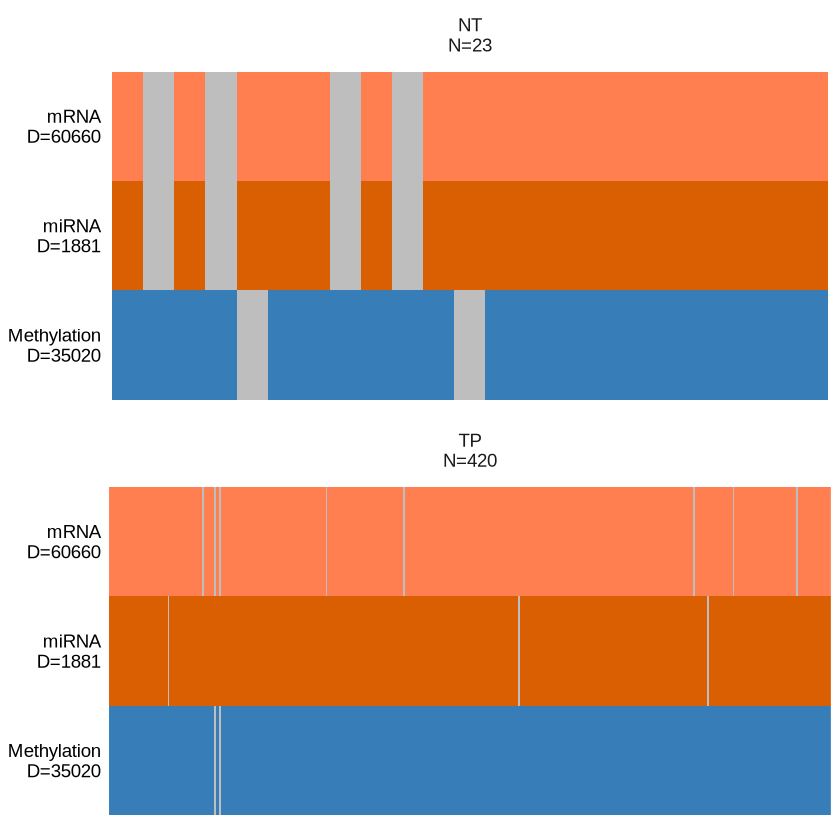

In [144]:
plot_data_overview(model)

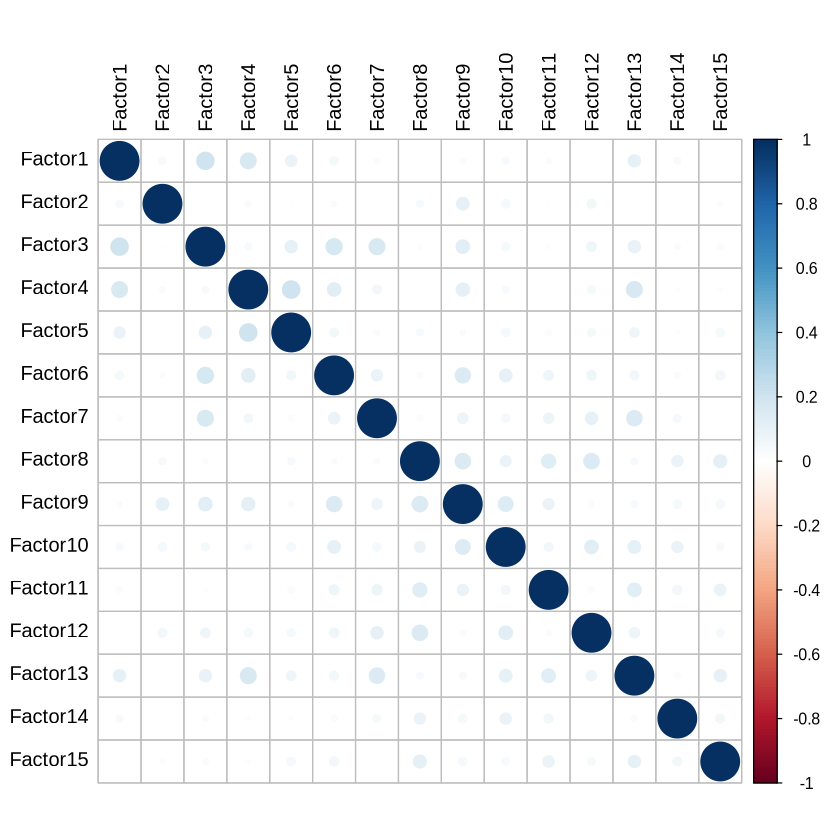

In [145]:
plot_factor_cor(model)

In [146]:
# Total variance explained per view and group
head(model@cache$variance_explained$r2_total)

$NT
       mRNA       miRNA Methylation 
  22.279054    4.516929   50.712052 

$TP
       mRNA       miRNA Methylation 
   29.76347    14.07508    50.33786

In [147]:
# Variance explained for every factor in per view and group
head(model@cache$variance_explained$r2_per_factor)

$NT
                  mRNA       miRNA  Methylation
Factor1   6.064588e+00  2.24218965 6.724024e+00
Factor2   1.288885e+01  2.88316011 1.608771e+01
Factor3   3.236532e-03  0.00000000 7.125717e+00
Factor4   1.788139e-05  0.00000000 9.289402e+00
Factor5   1.354498e+00  0.52785873 1.160151e+00
Factor6   1.006365e-01 -0.01802444 8.190811e-01
Factor7   1.941979e-01 -0.05179644 1.855135e-01
Factor8   1.622623e+00  0.00000000 1.456141e-02
Factor9   0.000000e+00  0.00000000 2.037358e+00
Factor10  0.000000e+00  0.00000000 3.445315e+00
Factor11  1.121378e+00  0.00000000 2.751350e-02
Factor12  0.000000e+00  0.00000000 2.248031e+00
Factor13  5.564094e-02  0.00000000 4.295945e-01
Factor14  5.197525e-03  0.00000000 2.443790e-03
Factor15 -9.846687e-03  0.00000000 9.715557e-04

$TP
                 mRNA    miRNA Methylation
Factor1  1.054035e+01 5.785716 11.68631315
Factor2  1.734579e+00 1.524097  0.64671040
Factor3  1.282096e-02 0.000000 21.37936950
Factor4  0.000000e+00 0.000000  4.44867015
Factor5  5.479038e+00 2.951872  1.87782645
Factor6  1.493853e+00 1.661205  3.59393954
Factor7  3.079224e+00 2.208155  1.78196430
Factor8  4.563797e+00 0.000000  0.04783869
Factor9  1.192093e-05 0.000000  3.35870385
Factor10 0.000000e+00 0.000000  1.50321126
Factor11 2.204734e+00 0.000000  0.06012917
Factor12 0.000000e+00 0.000000  1.10191107
Factor13 3.130257e-01 0.000000  2.46359706
Factor14 3.500104e-01 0.000000  0.04143715
Factor15 2.437472e-01 0.000000  0.02974272

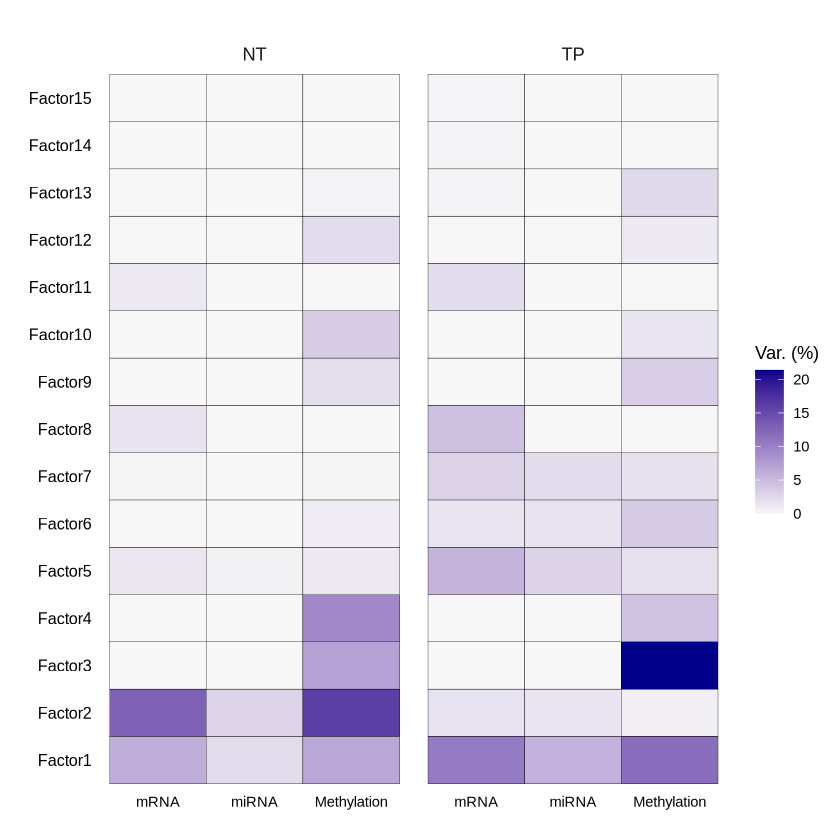

In [148]:
plot_variance_explained(model, x="view", y="factor")

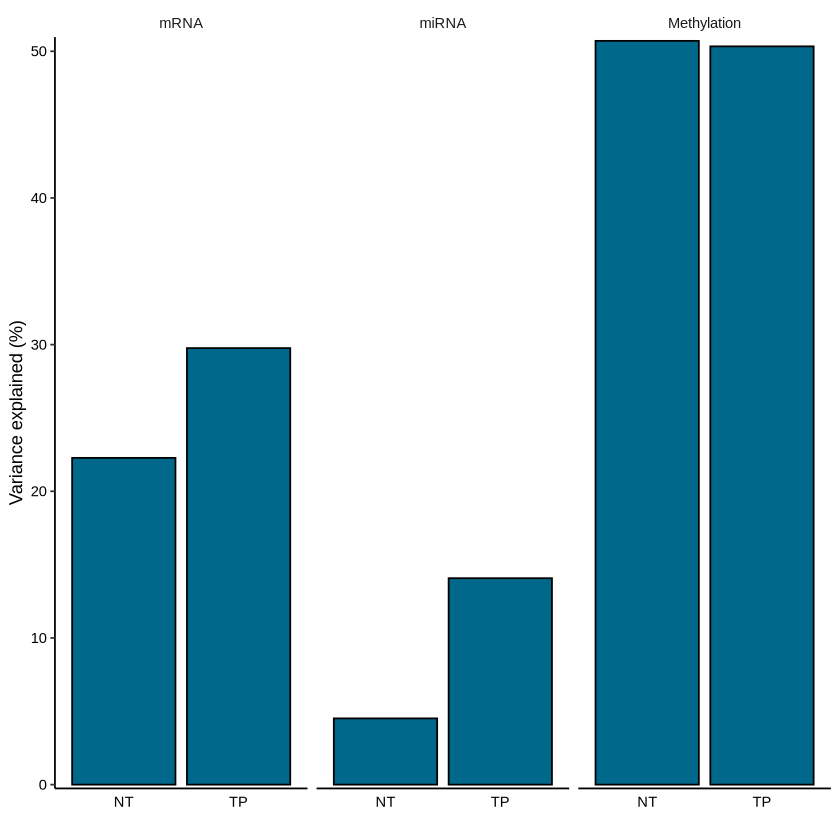

In [149]:
plot_variance_explained(model, x="group", y="factor", plot_total = T)[[2]]

### plot_factor

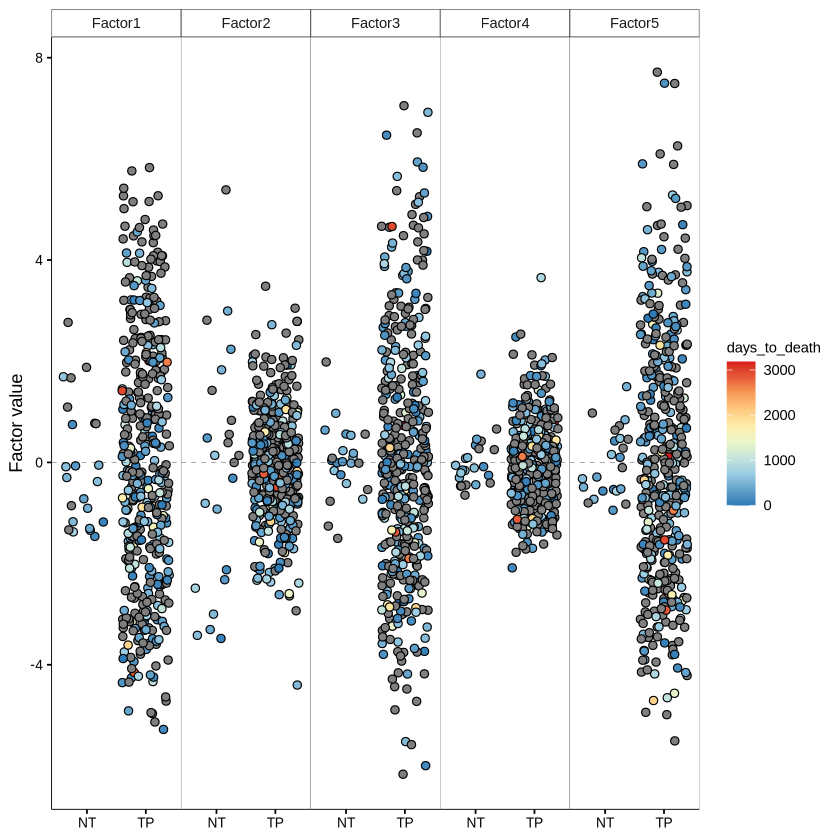

In [150]:
plot_factor(model, factor = 1:5, color_by = "days_to_death")

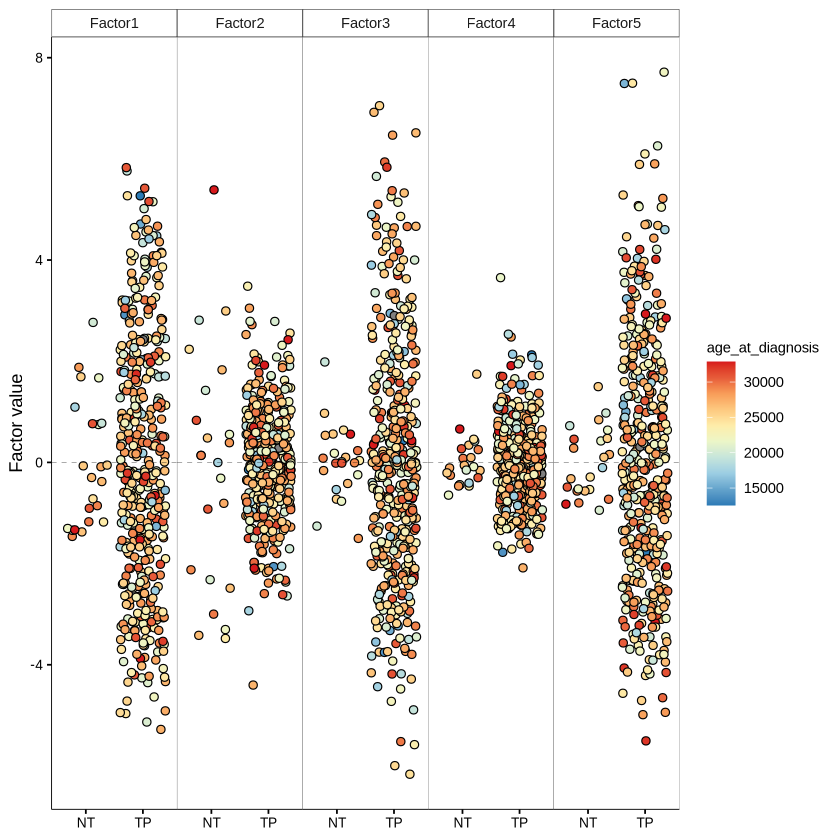

In [151]:
plot_factor(model, factor = 1:5, color_by = "age_at_diagnosis")

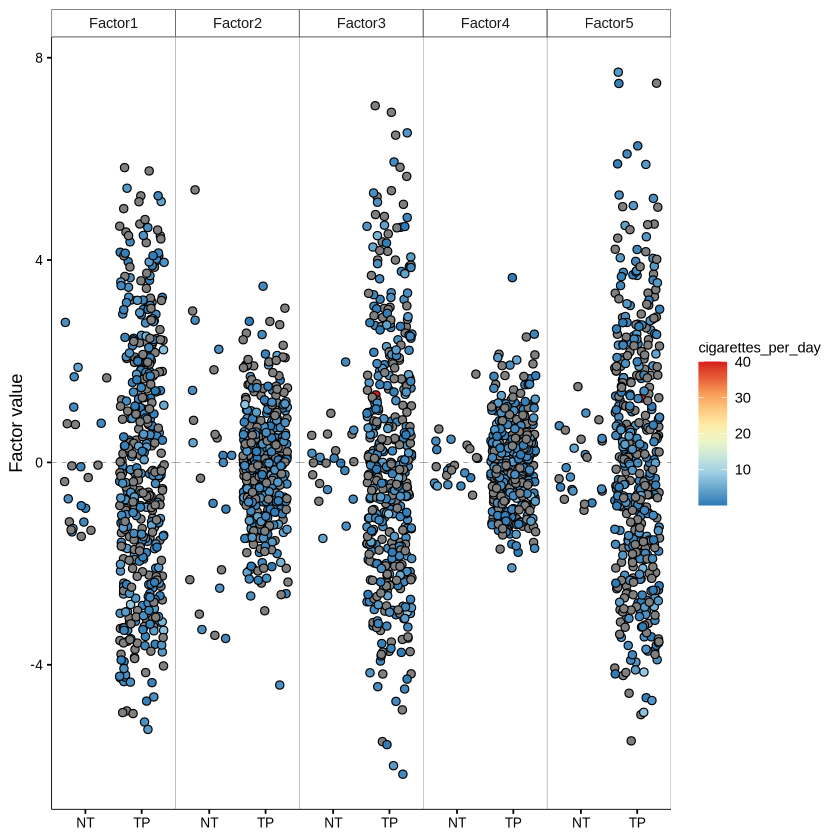

In [152]:
plot_factor(model, factor = 1:5, color_by = "cigarettes_per_day")

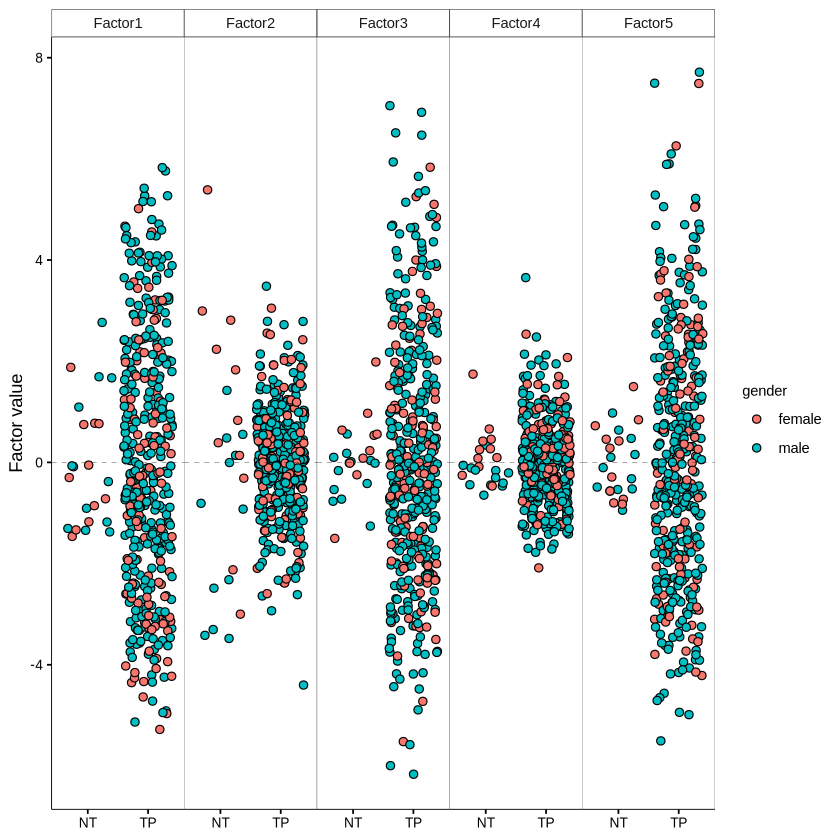

In [153]:
plot_factor(model, factor = 1:5, color_by = "gender")

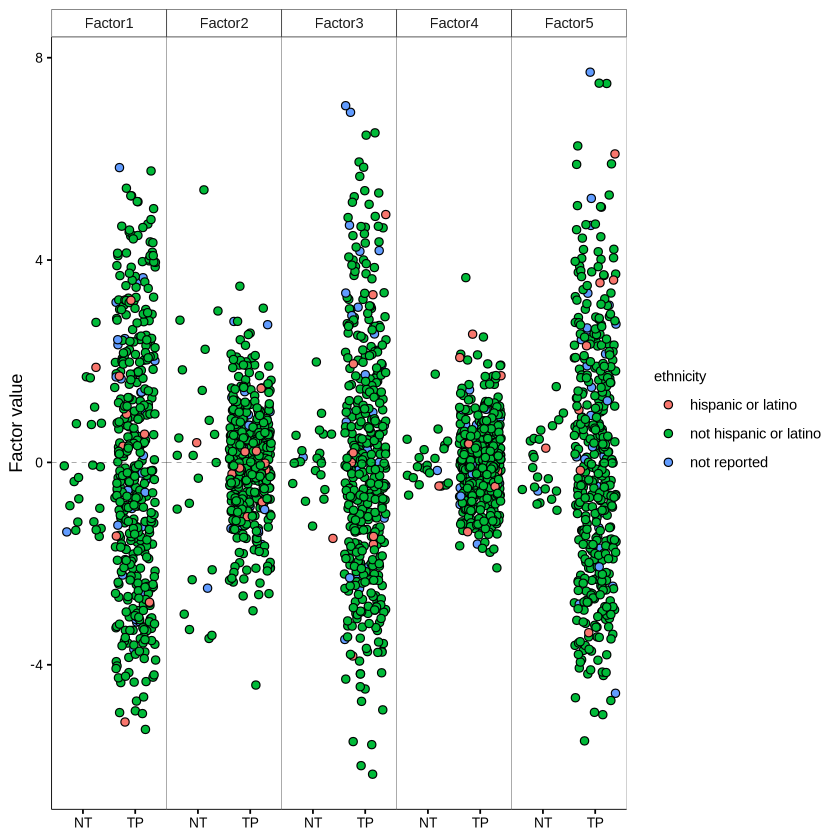

In [154]:
plot_factor(model, factor = 1:5, color_by = "ethnicity")

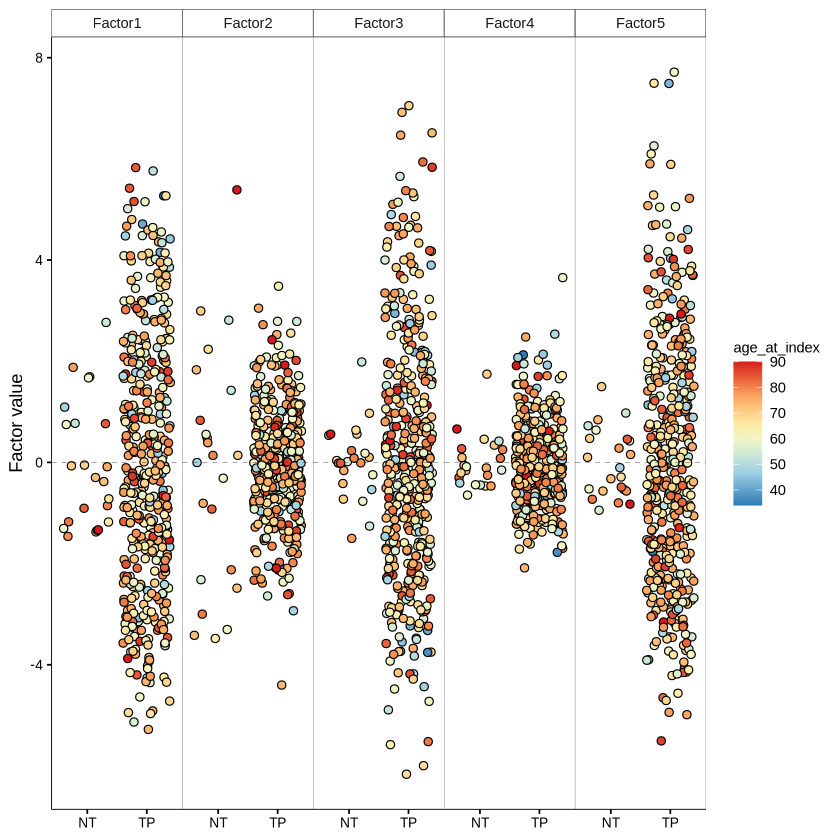

In [155]:
plot_factor(model, factor = 1:5, color_by = "age_at_index")

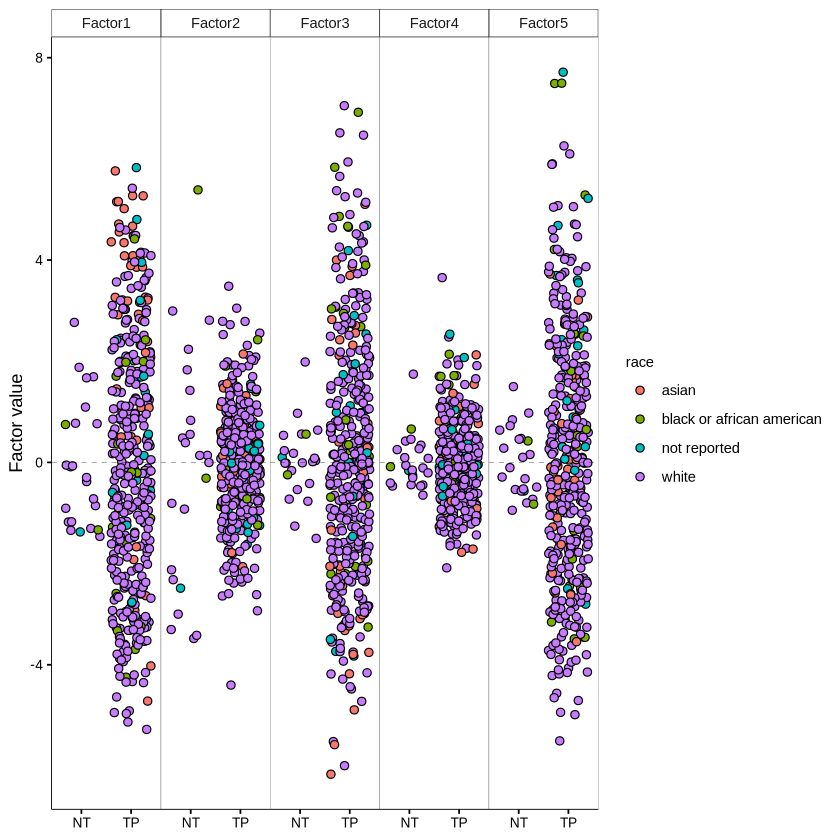

In [156]:
plot_factor(model, factor = 1:5, color_by = "race")

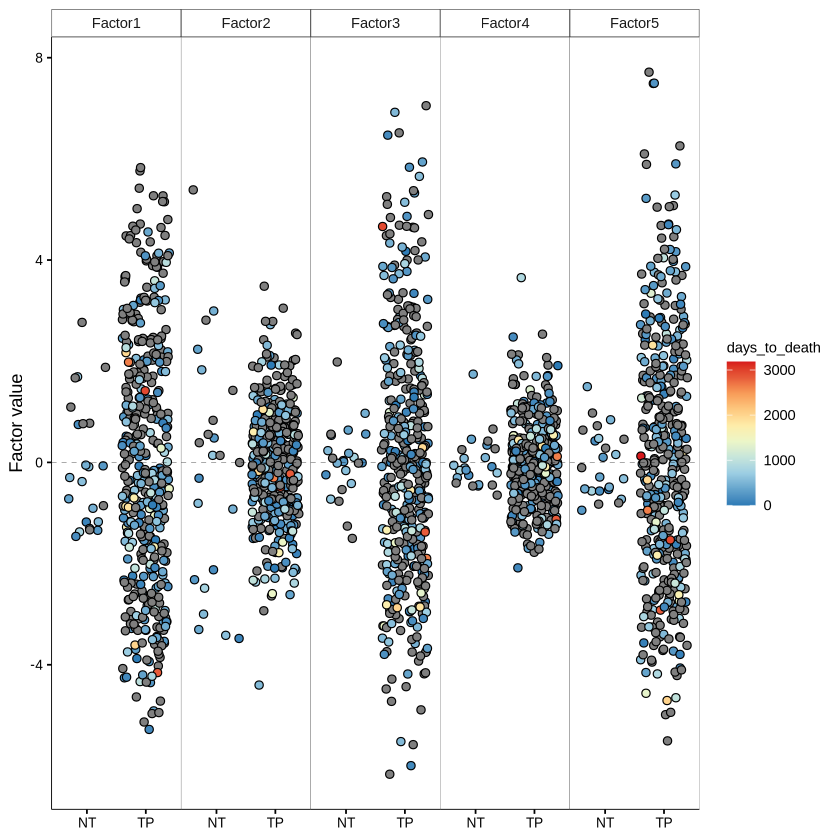

In [157]:
plot_factor(model, factor = 1:5, color_by = "days_to_death")

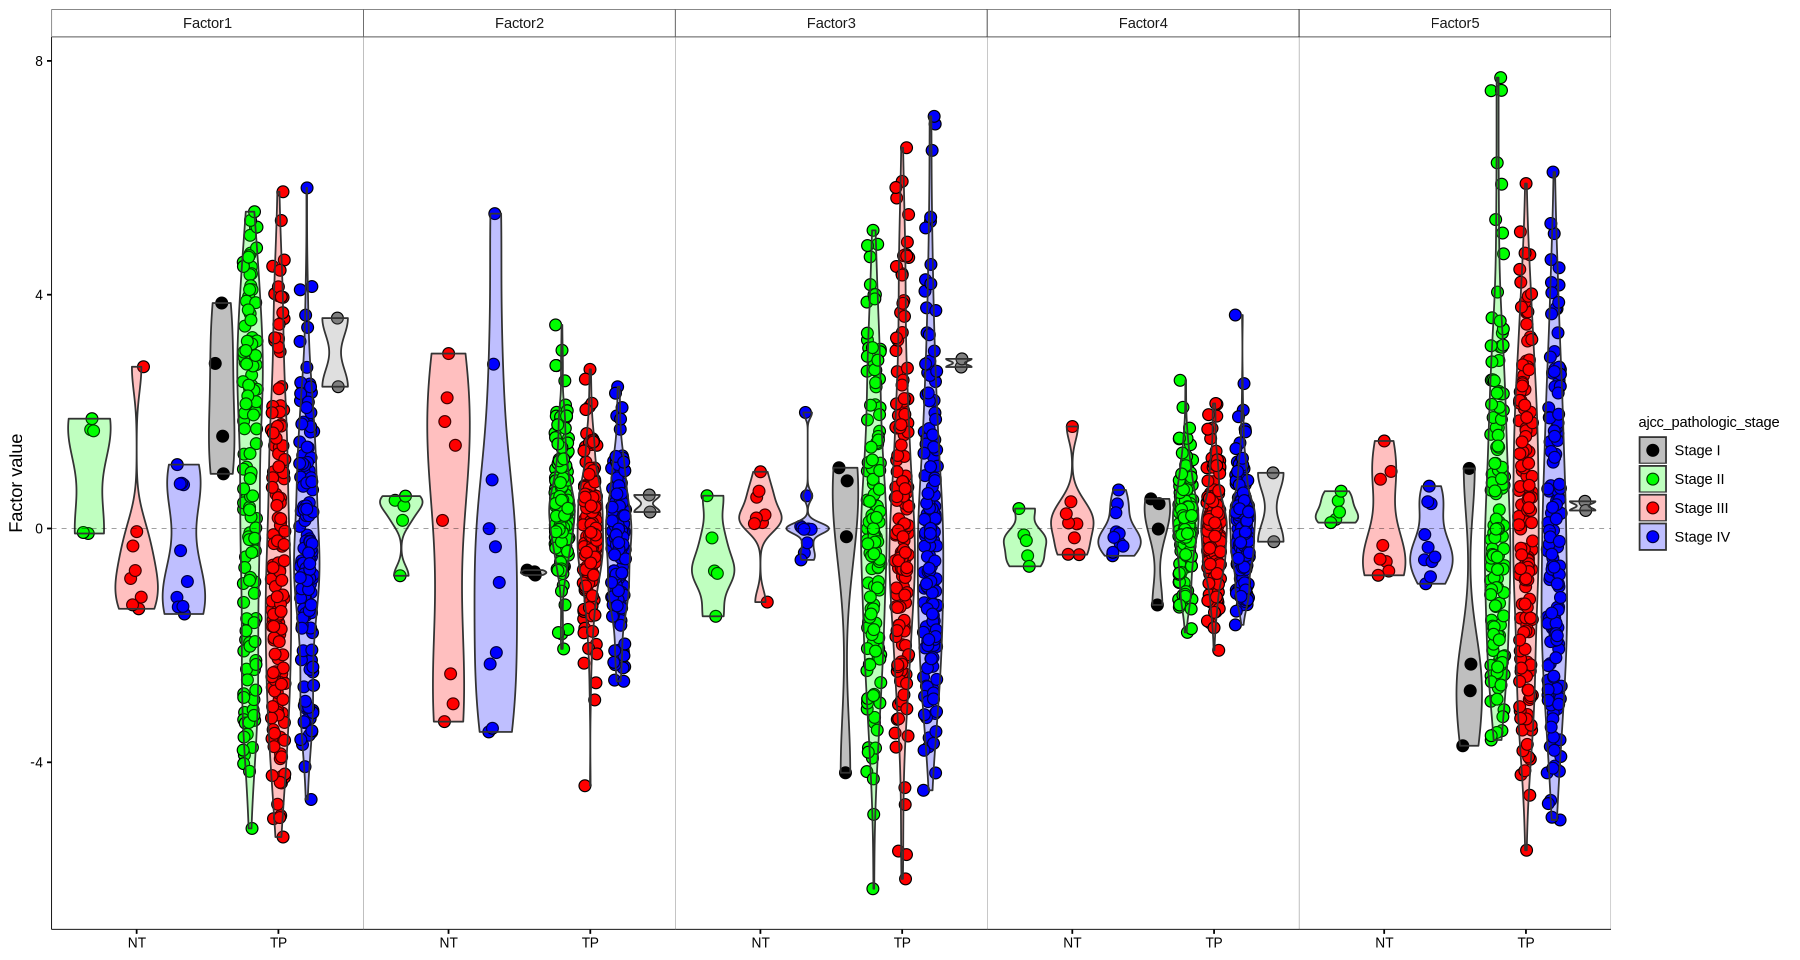

In [159]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "ajcc_pathologic_stage", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("Stage I"="black", "Stage II"="green", "Stage III"="red", "Stage IV"="blue")) +
  scale_fill_manual(values=c("Stage I"="black", "Stage II"="green", "Stage III"="red", "Stage IV"="blue"))

options(repr.plot.width = 15, repr.plot.height =8) 

p

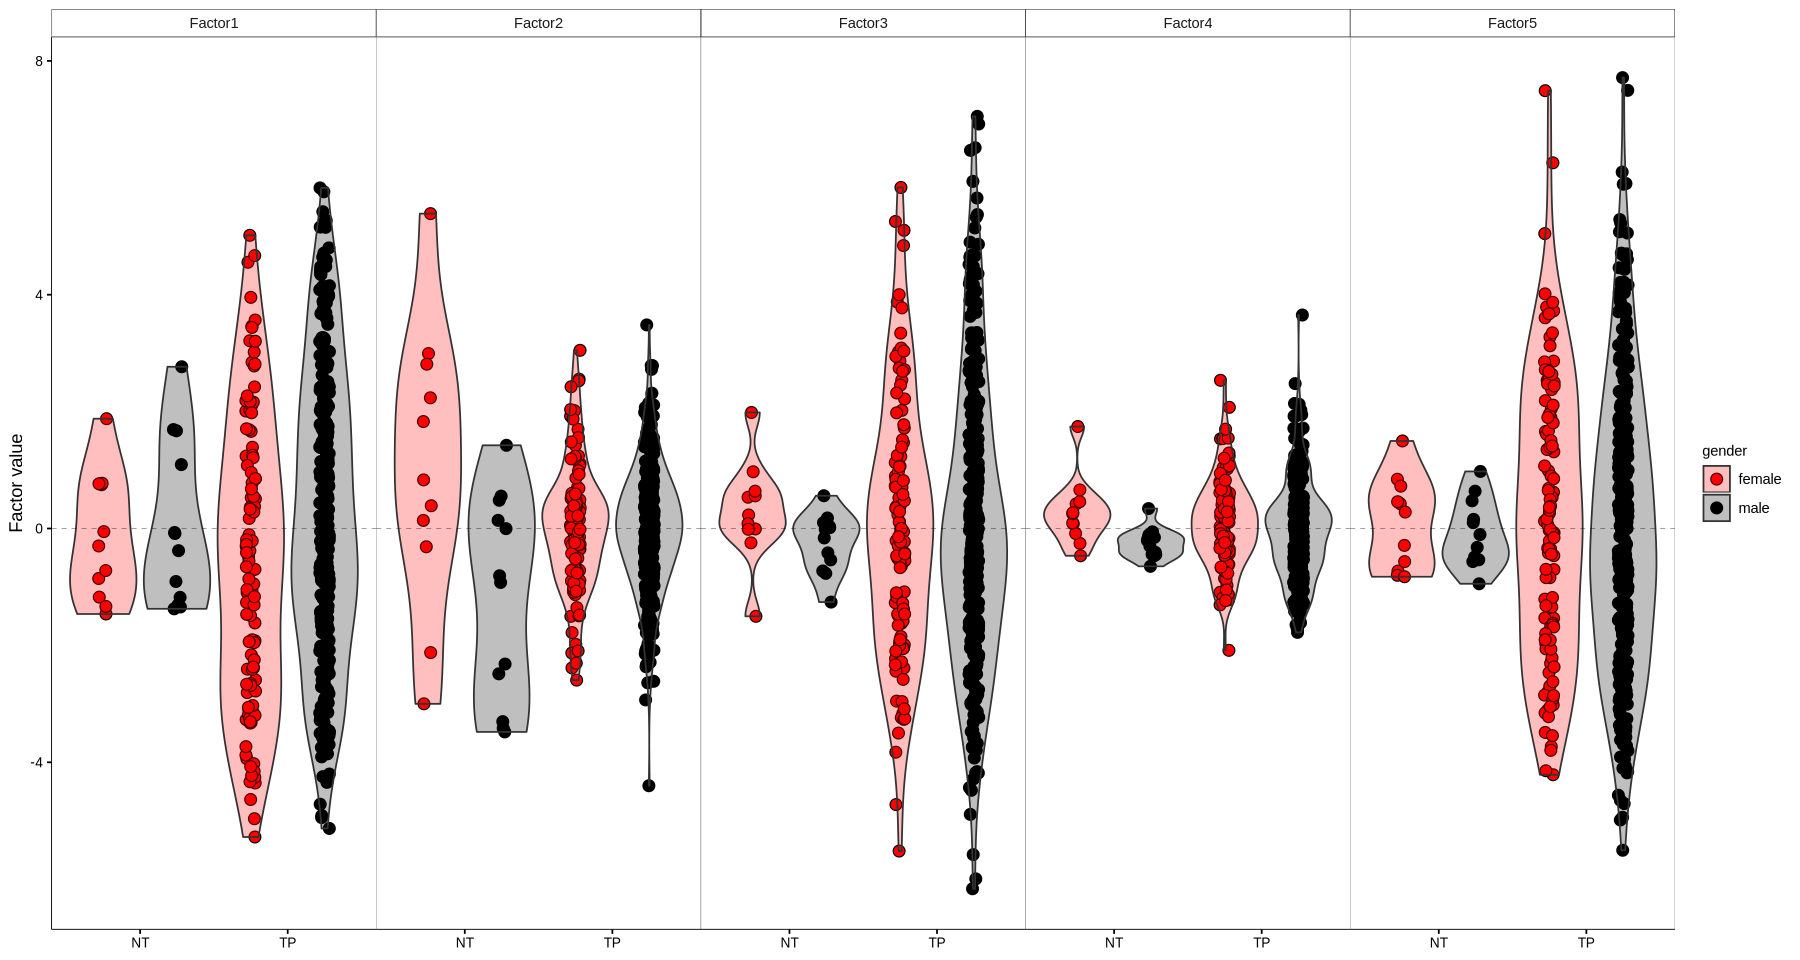

In [160]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "gender", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("male"="black", "female"="red")) +
  scale_fill_manual(values=c("male"="black", "female"="red"))

options(repr.plot.width = 15, repr.plot.height =8) 

p

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


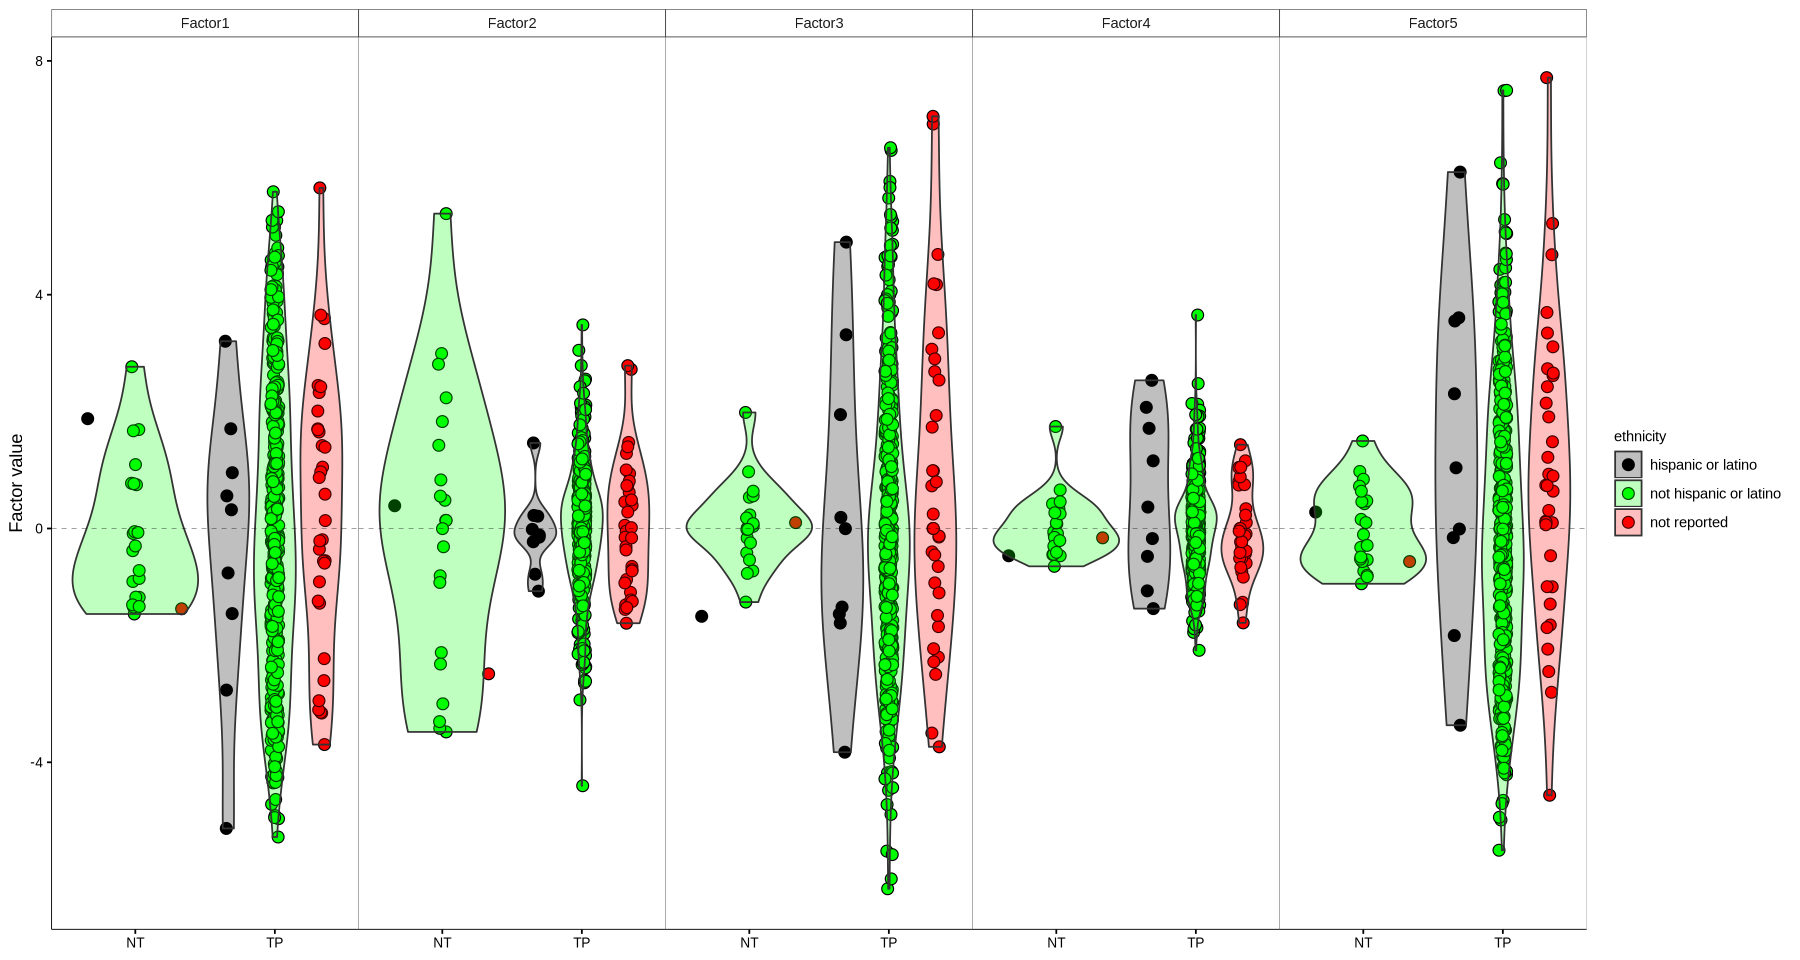

In [161]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "ethnicity", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("hispanic or latino"="black", "not hispanic or latino"="green", "not reported"="red")) +
  scale_fill_manual(values=c("hispanic or latino"="black", "not hispanic or latino"="green", "not reported"="red"))

options(repr.plot.width = 15, repr.plot.height =8) 

p

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


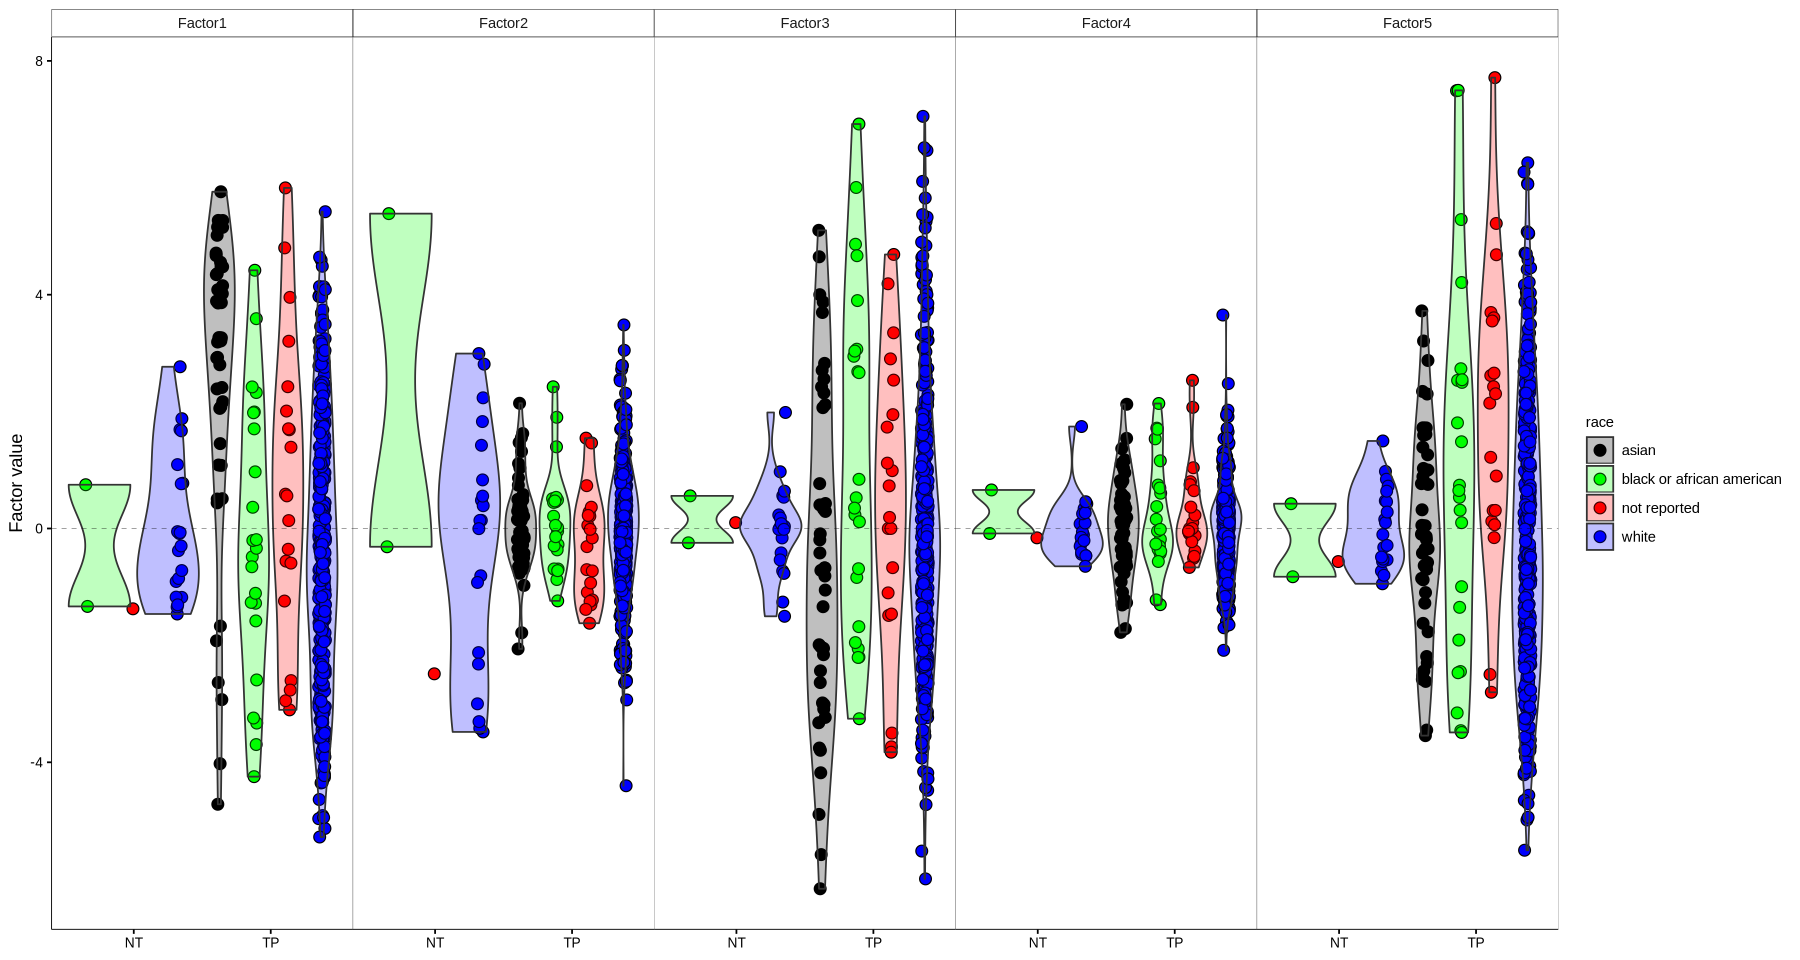

In [162]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "race", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("asian"="black", "black or african american"="green", "white"="blue", "not reported"="red")) +
  scale_fill_manual(values=c("asian"="black", "black or african american"="green", "white"="blue", "not reported"="red"))

options(repr.plot.width = 15, repr.plot.height =8) 

p

### plot_factors

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



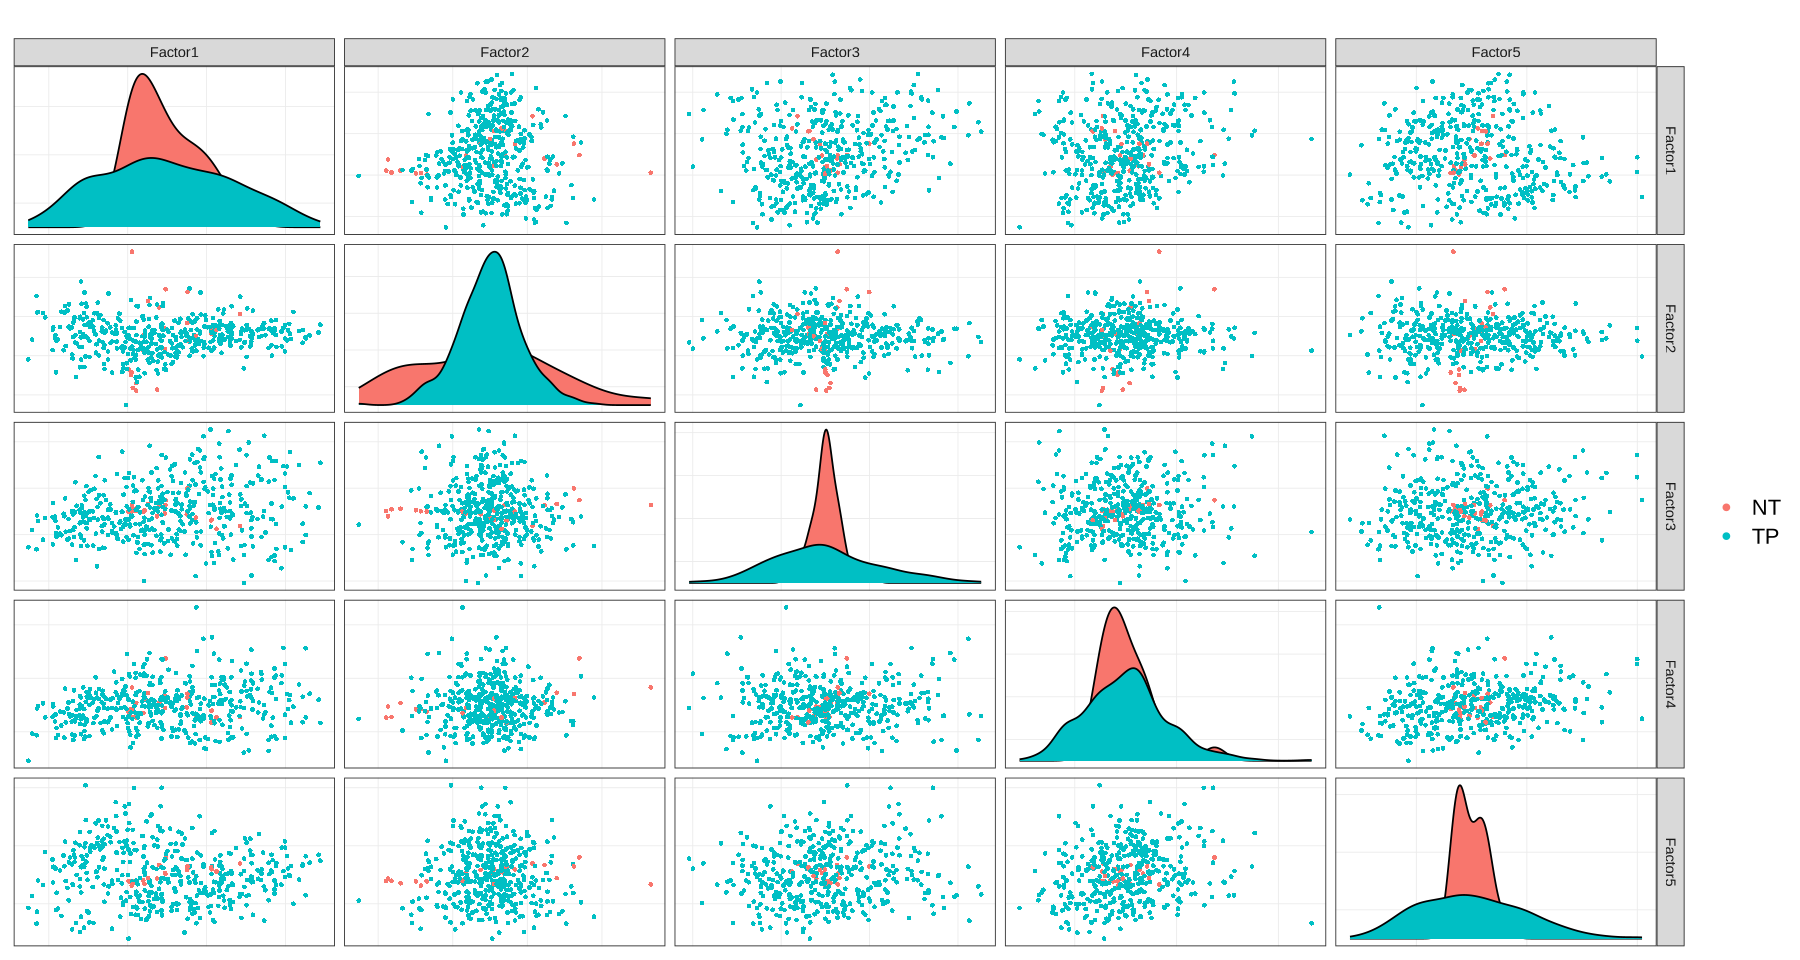

In [163]:
# Generate the plot and store it in a variable
p <- plot_factors(model, factors = 1:5, color_by = "group")

options(repr.plot.width = 15, repr.plot.height =8) 

p

## GSEA / MSigDB_v6.0_C2_human / mRNA

In [184]:
data("MSigDB_v6.0_C2_human")

enrichment.parametric <- run_enrichment(model,
  view = "mRNA", factors = 1:5,
  feature.sets = MSigDB_v6.0_C2_human
)

Intersecting features names in the model and the gene set annotation results in a total of 19351 features.


Running feature set Enrichment Analysis with the following options...
View: mRNA 
Number of feature sets: 1293 
Set statistic: mean.diff 
Statistical test: parametric 







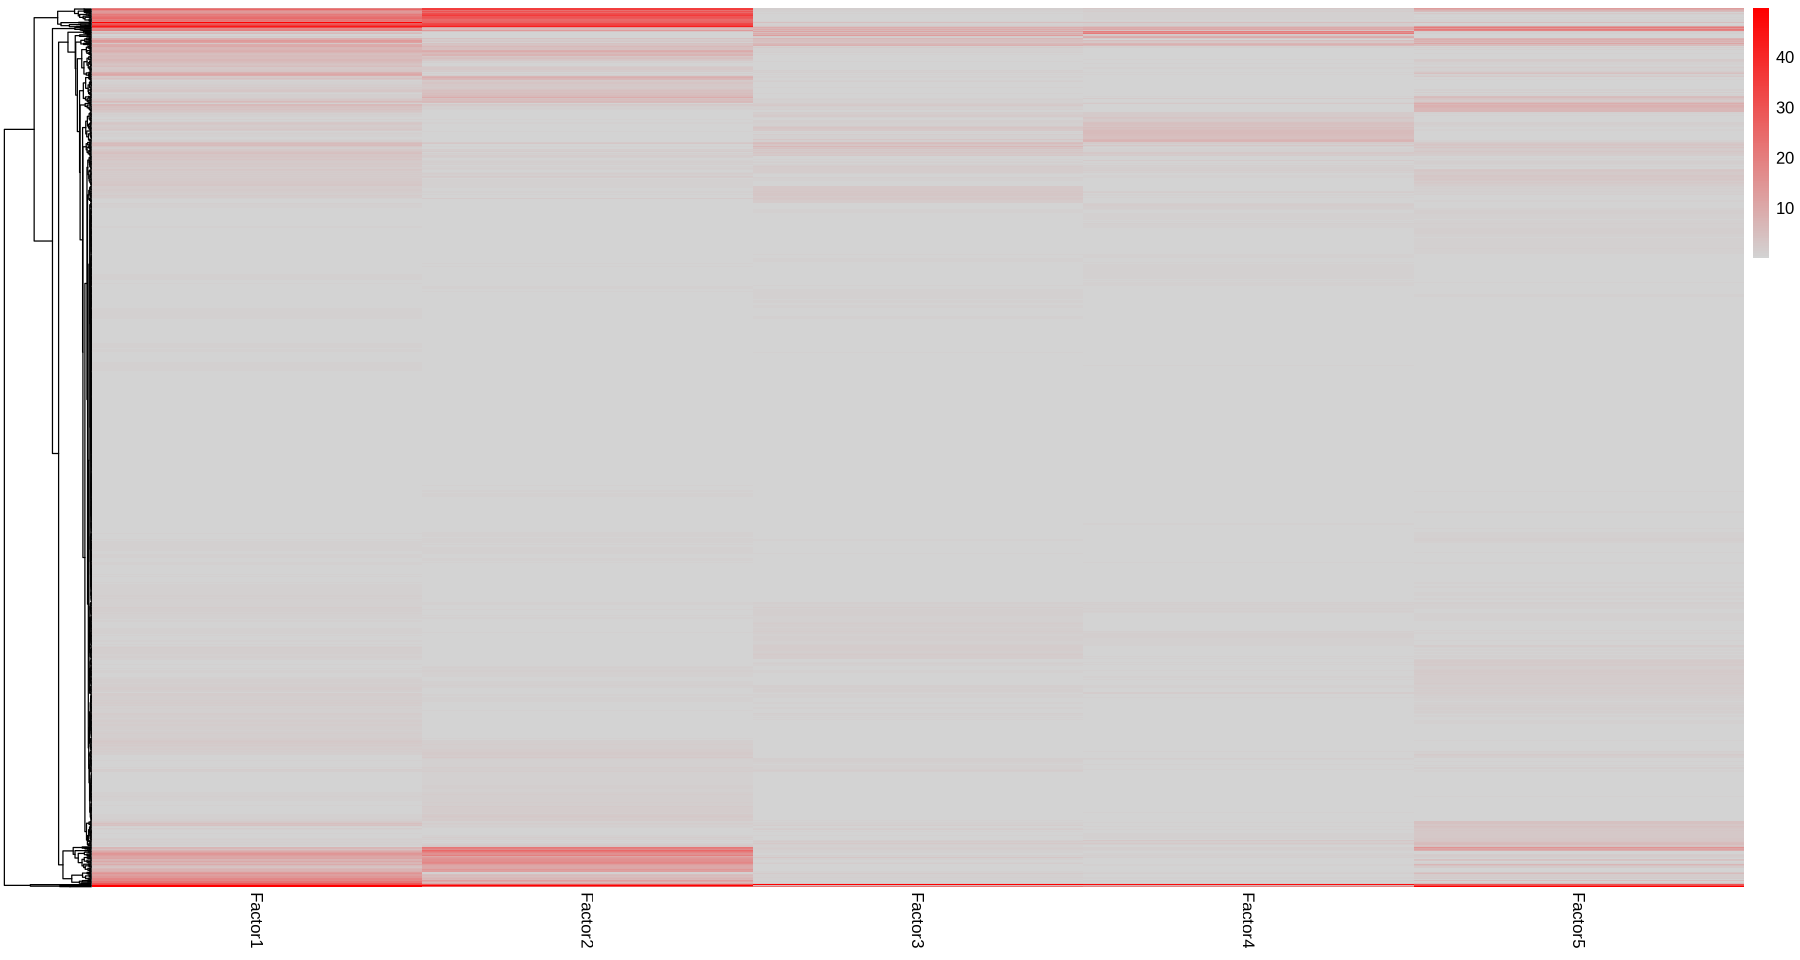

In [185]:
plot_enrichment_heatmap(enrichment.parametric)

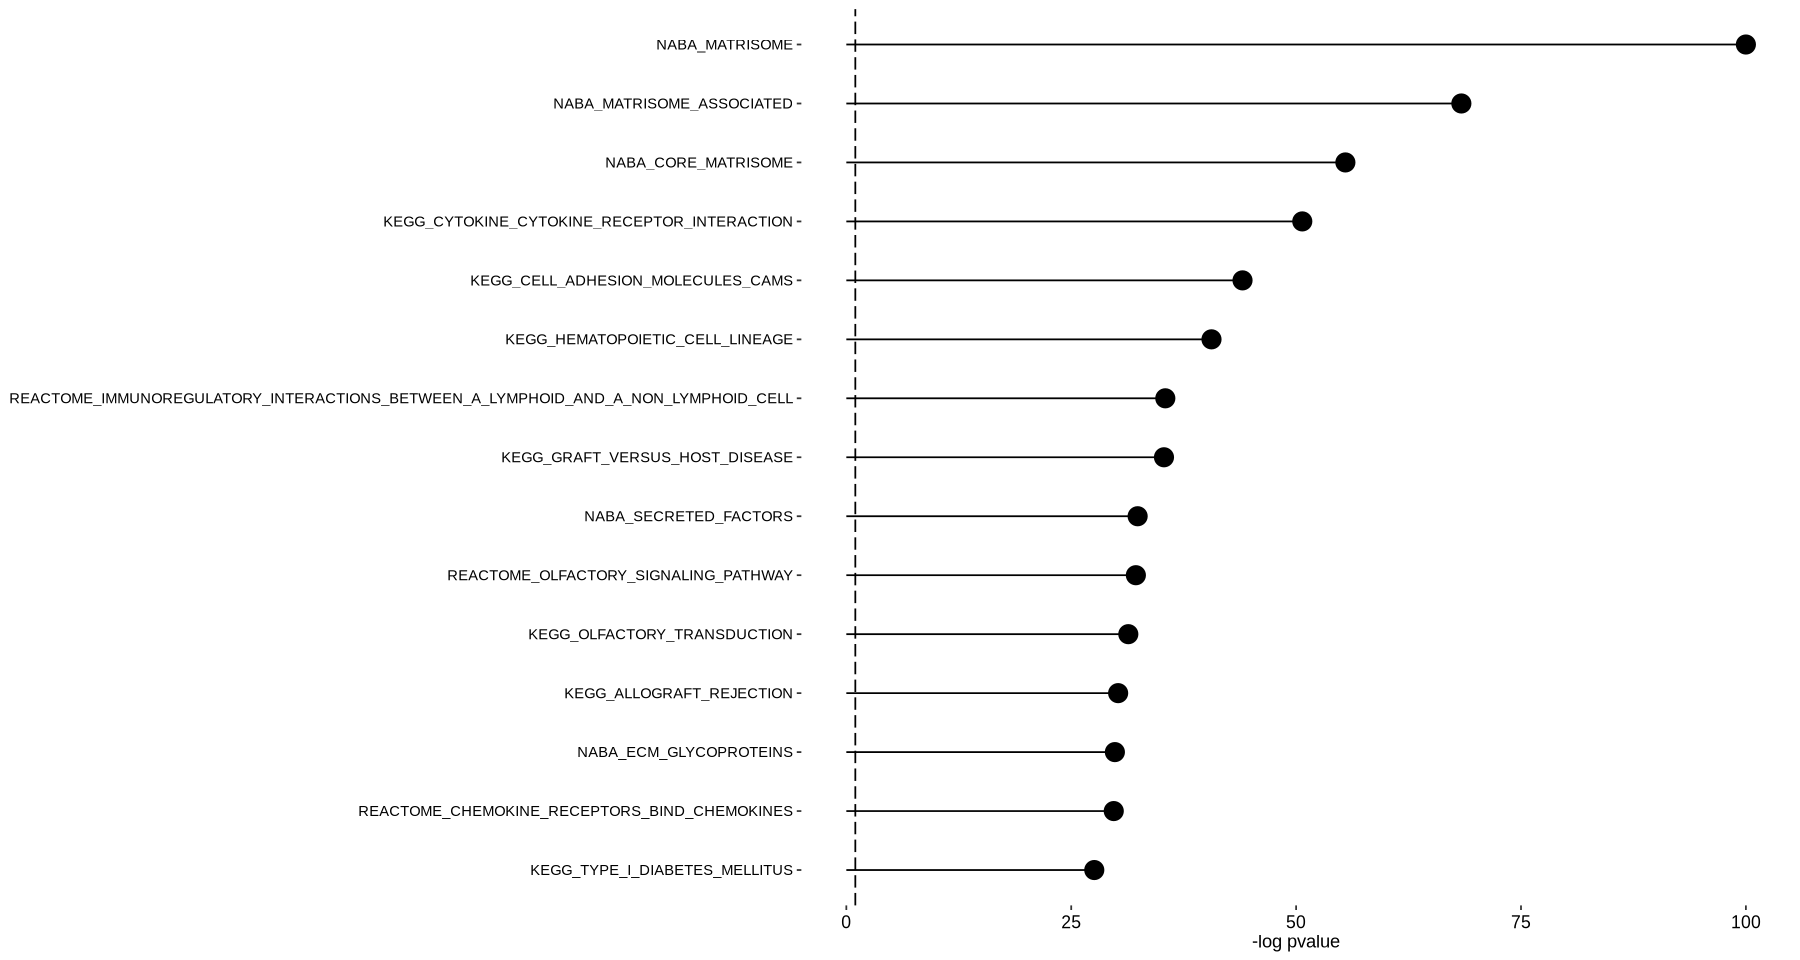

In [186]:
# Generate the plot and store it in a variable
p <- plot_enrichment(enrichment.parametric, factor = 1, max.pathways = 15)
p

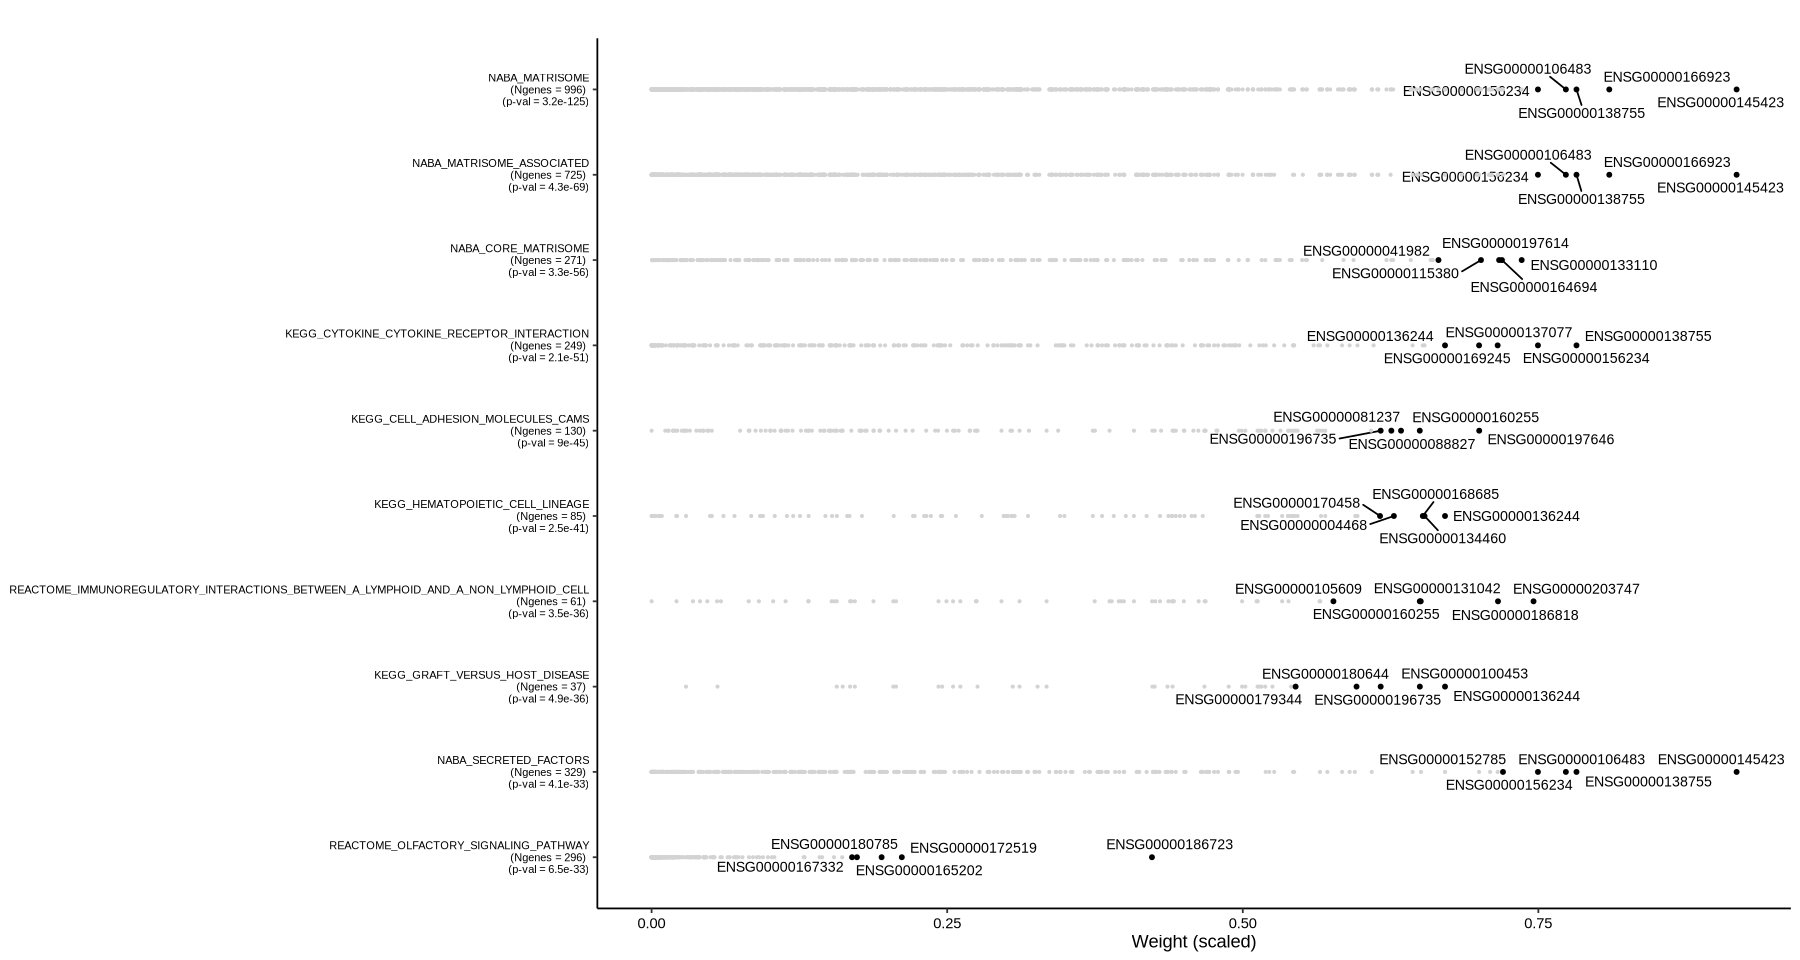

In [187]:
# Generate the plot and store it in a variable
p <- plot_enrichment_detailed(enrichment.parametric, factor = 1)

p

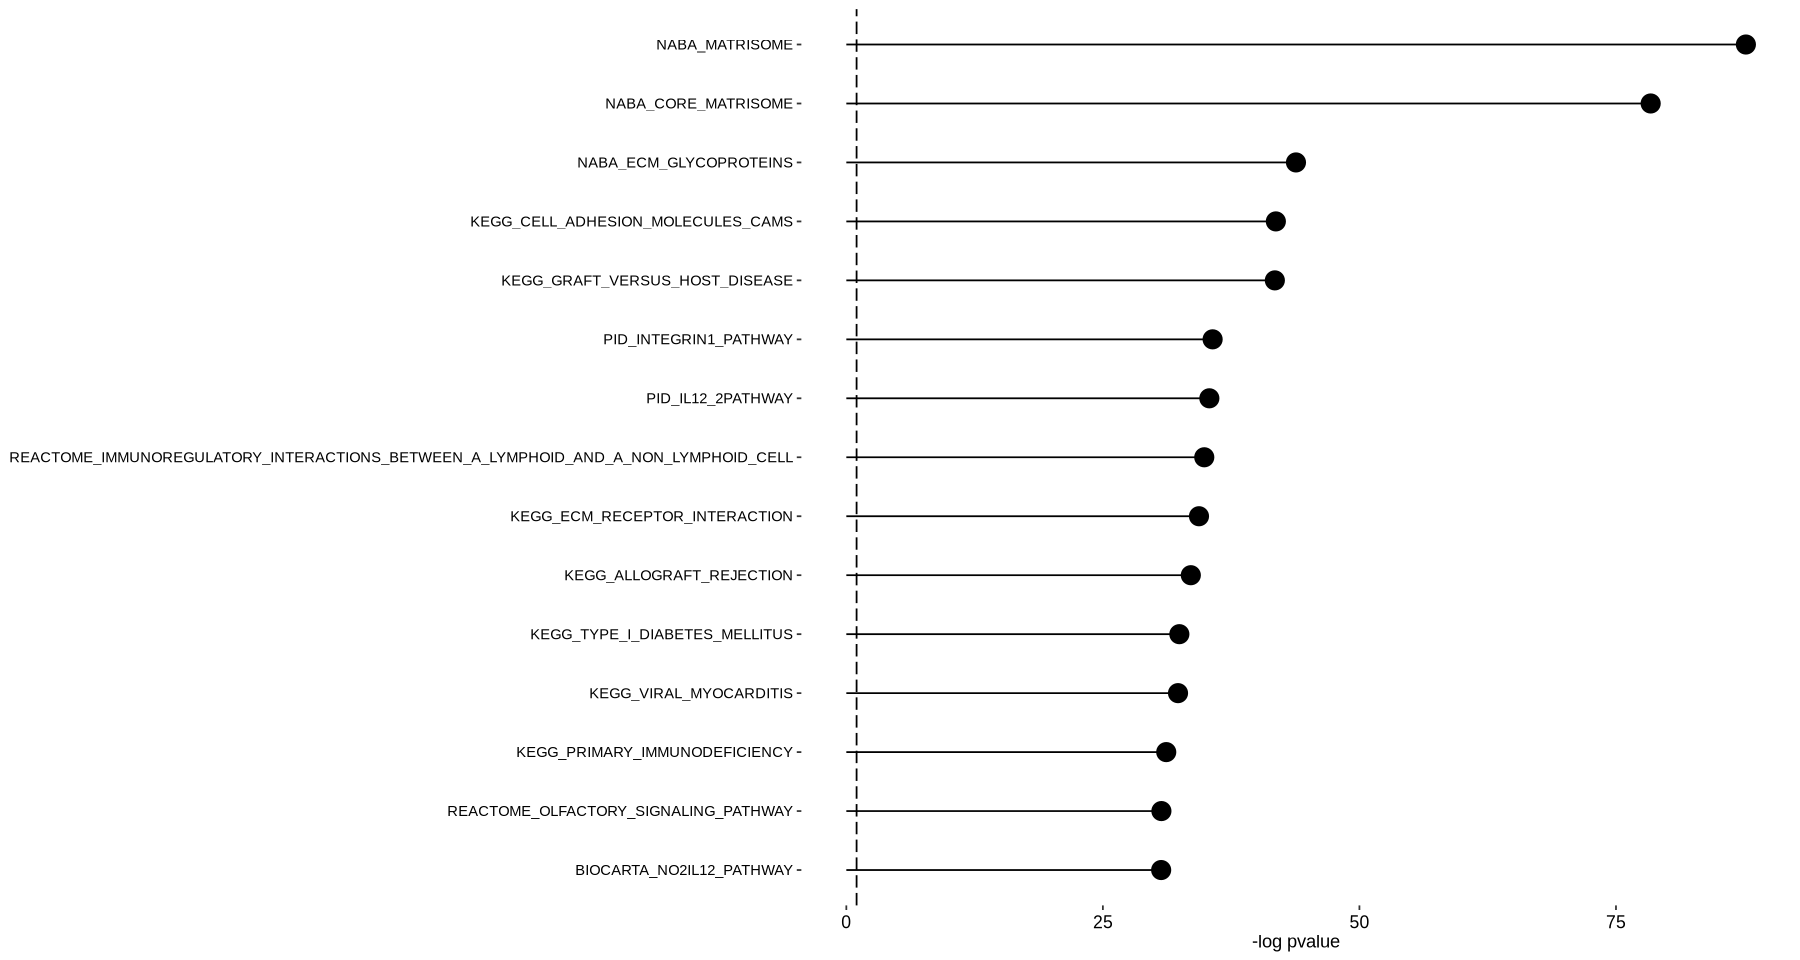

In [188]:
# Generate the plot and store it in a variable
p <- plot_enrichment(enrichment.parametric, factor = 2, max.pathways = 15)

p

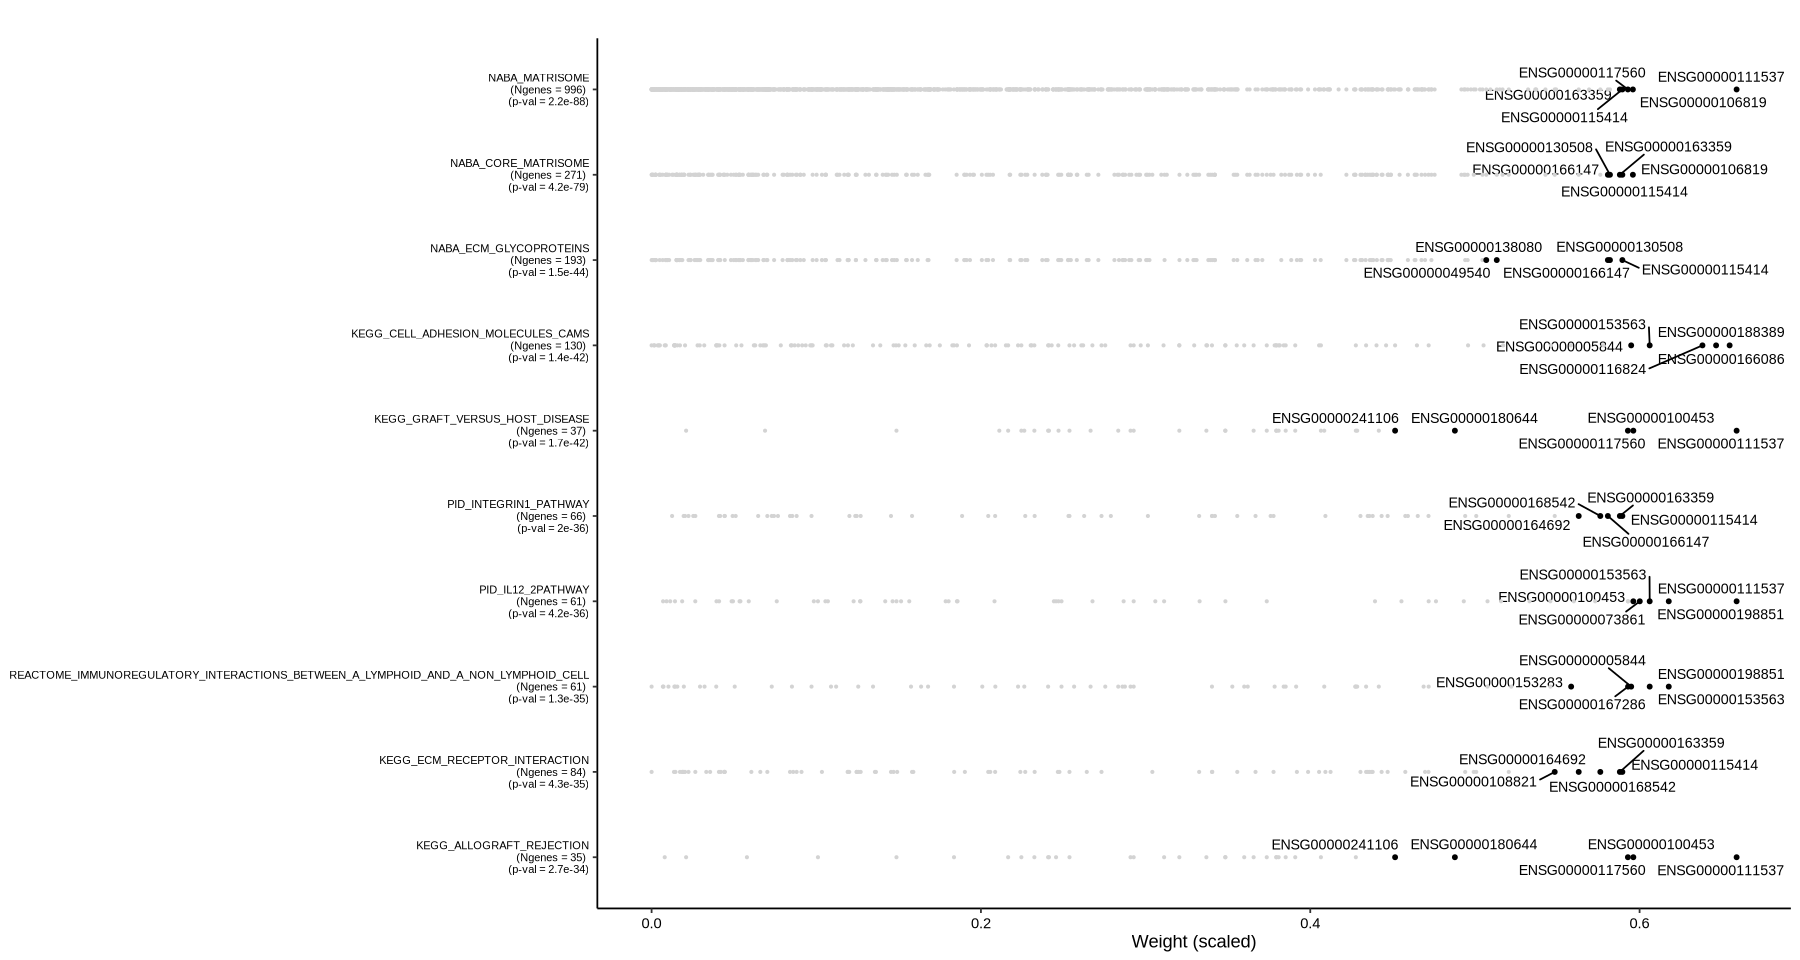

In [189]:
# Generate the plot and store it in a variable
p <- plot_enrichment_detailed(enrichment.parametric, factor = 2)

p

## GSEA / MSigDB_v6.0_C5_human / mRNA

In [175]:
data("MSigDB_v6.0_C5_human")

enrichment.parametric <- run_enrichment(model,
  view = "mRNA", factors = 1:5,
  feature.sets = MSigDB_v6.0_C5_human
)

Intersecting features names in the model and the gene set annotation results in a total of 19351 features.


Running feature set Enrichment Analysis with the following options...
View: mRNA 
Number of feature sets: 4416 
Set statistic: mean.diff 
Statistical test: parametric 







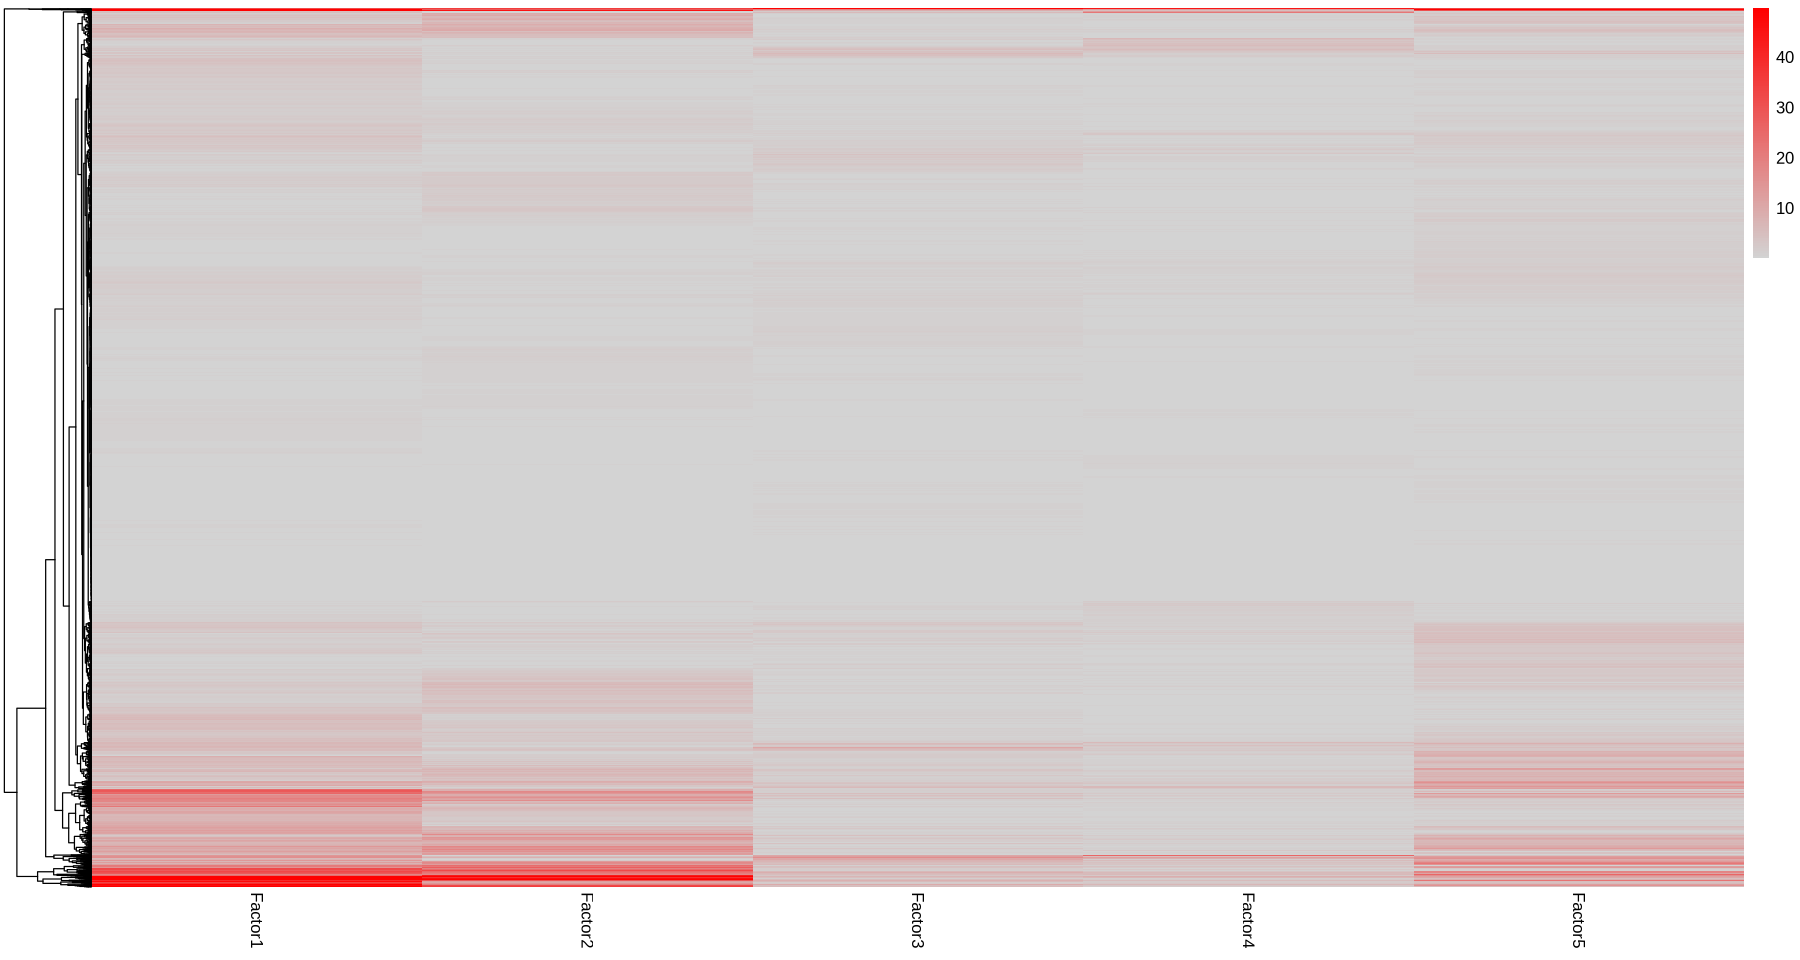

In [176]:
plot_enrichment_heatmap(enrichment.parametric)

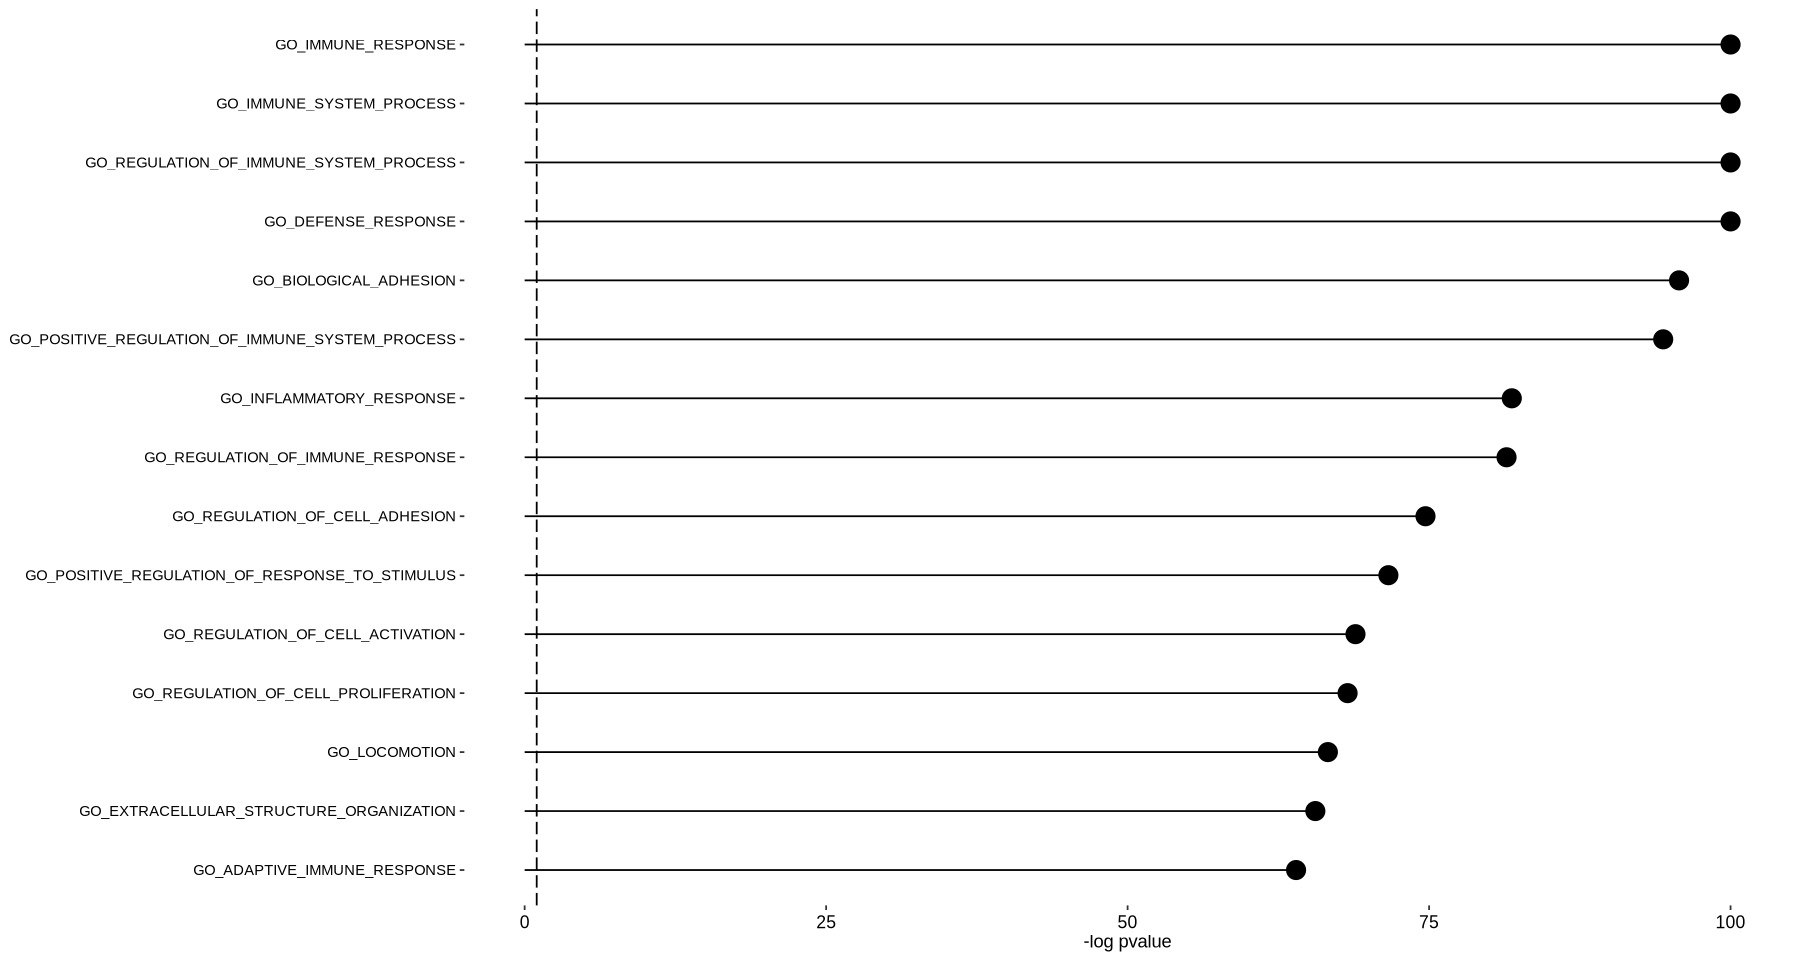

In [177]:
# Generate the plot and store it in a variable
p <- plot_enrichment(enrichment.parametric, 
  factor = 1, 
  max.pathways = 15
)
p

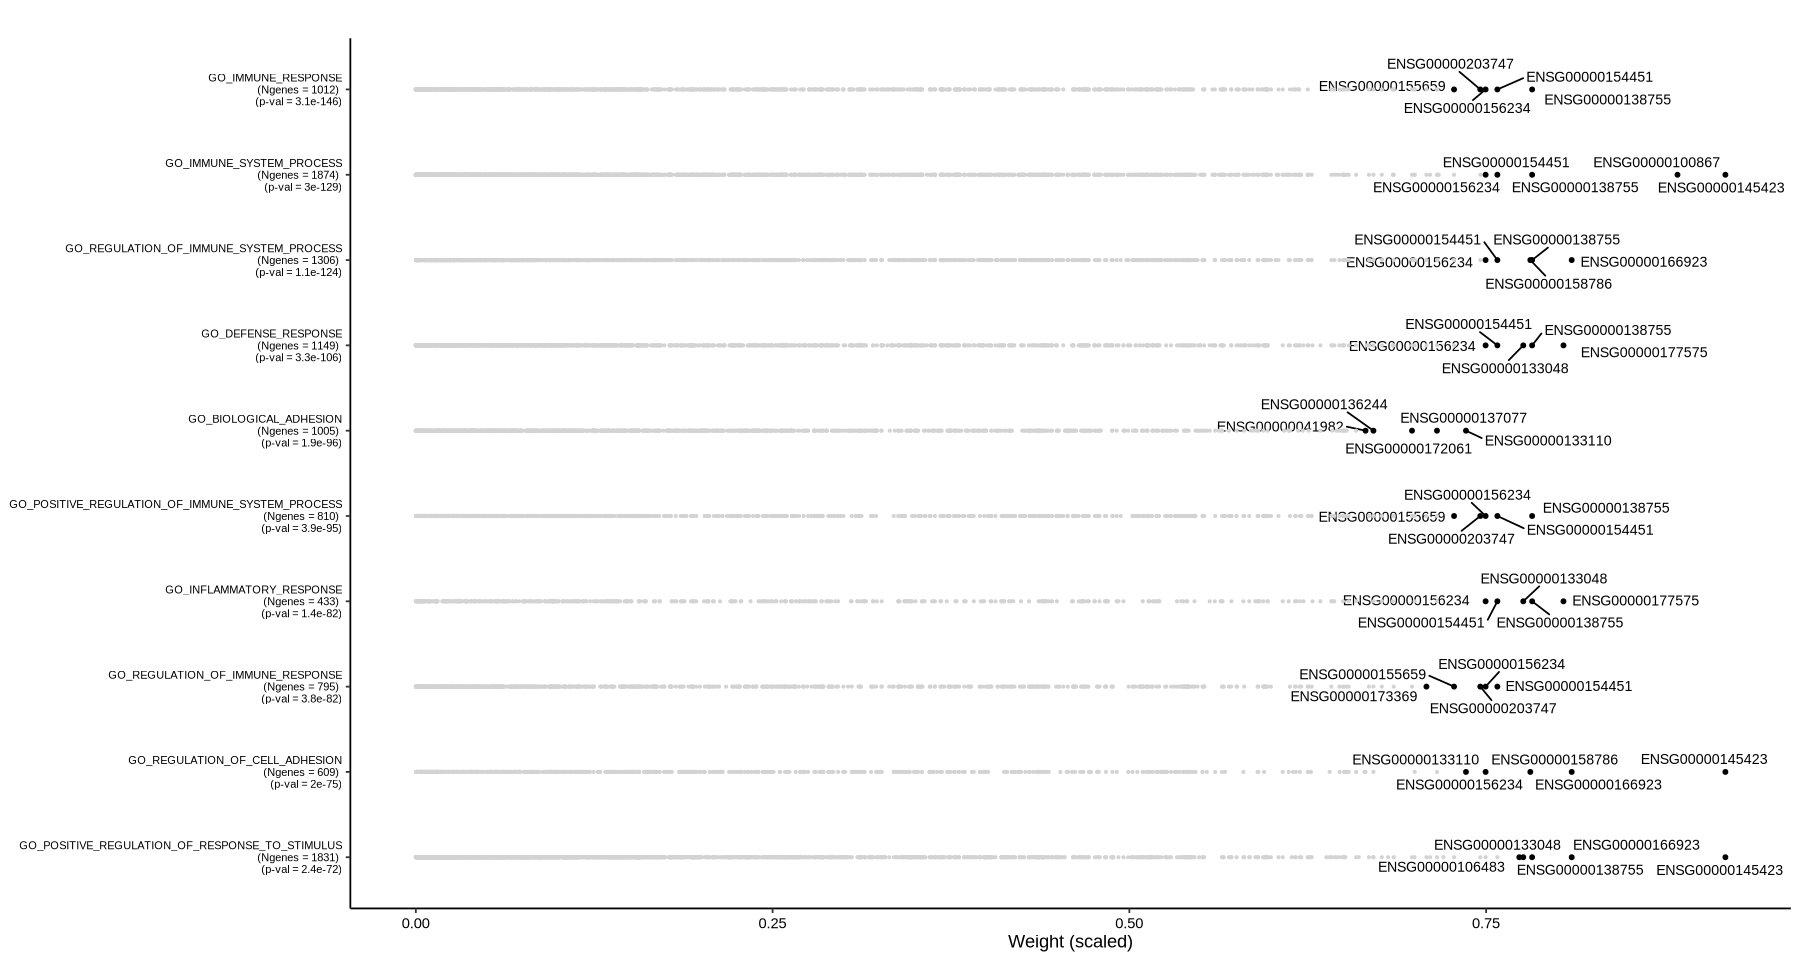

In [178]:
# Generate the plot and store it in a variable
p <- plot_enrichment_detailed(enrichment.parametric, 
  factor = 1
)

p

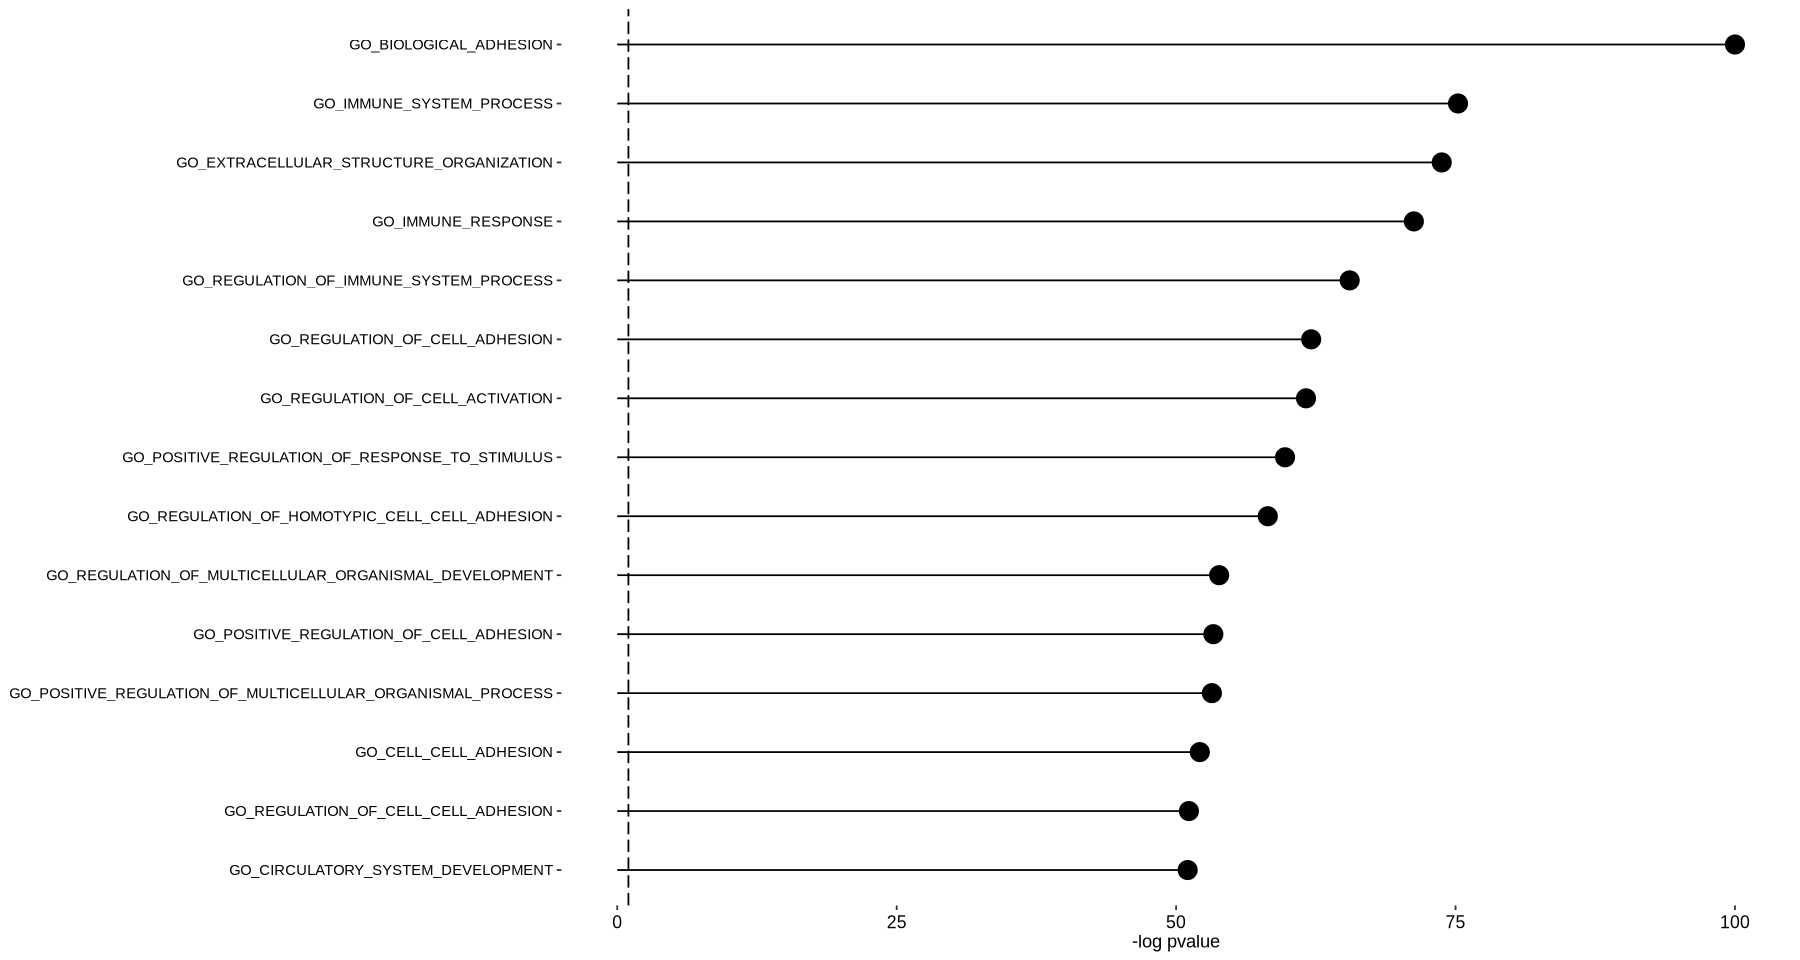

In [179]:
# Generate the plot and store it in a variable
p <- plot_enrichment(enrichment.parametric, 
  factor = 2, 
  max.pathways = 15
)

p

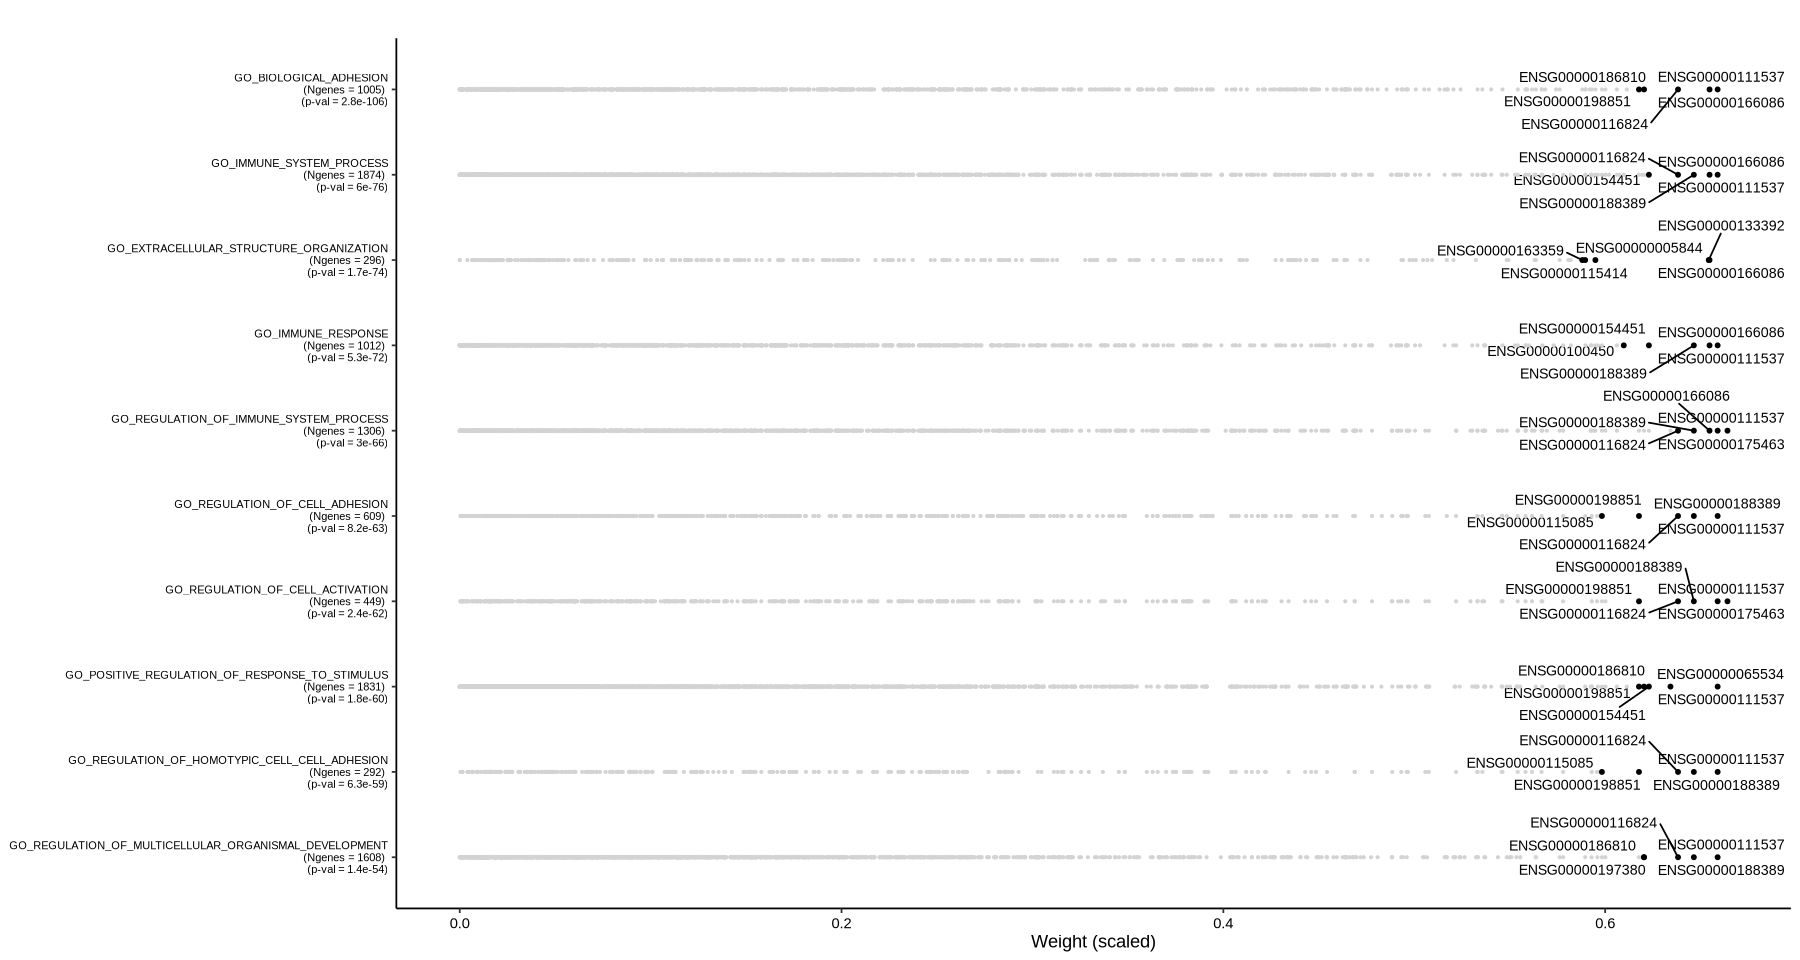

In [181]:
# Generate the plot and store it in a variable
p <- plot_enrichment_detailed(enrichment.parametric, 
  factor = 2
)

p

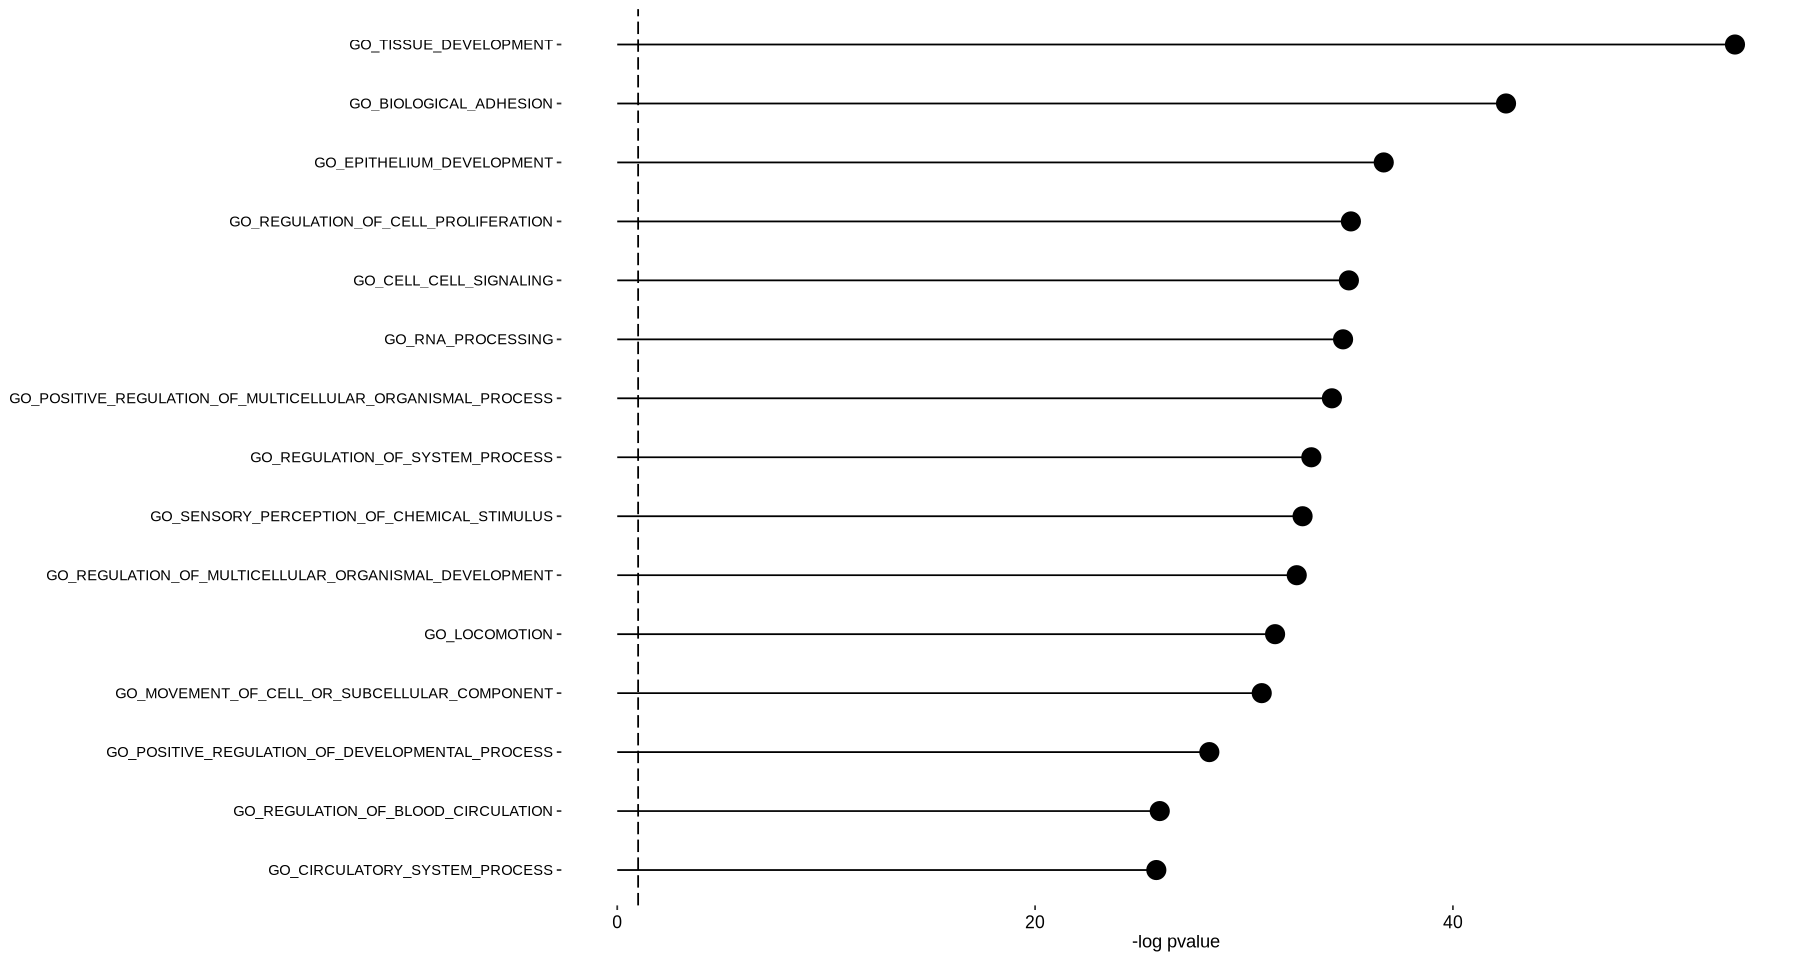

In [183]:
# Generate the plot and store it in a variable
p <- plot_enrichment(enrichment.parametric, factor = 5, max.pathways = 15)

p

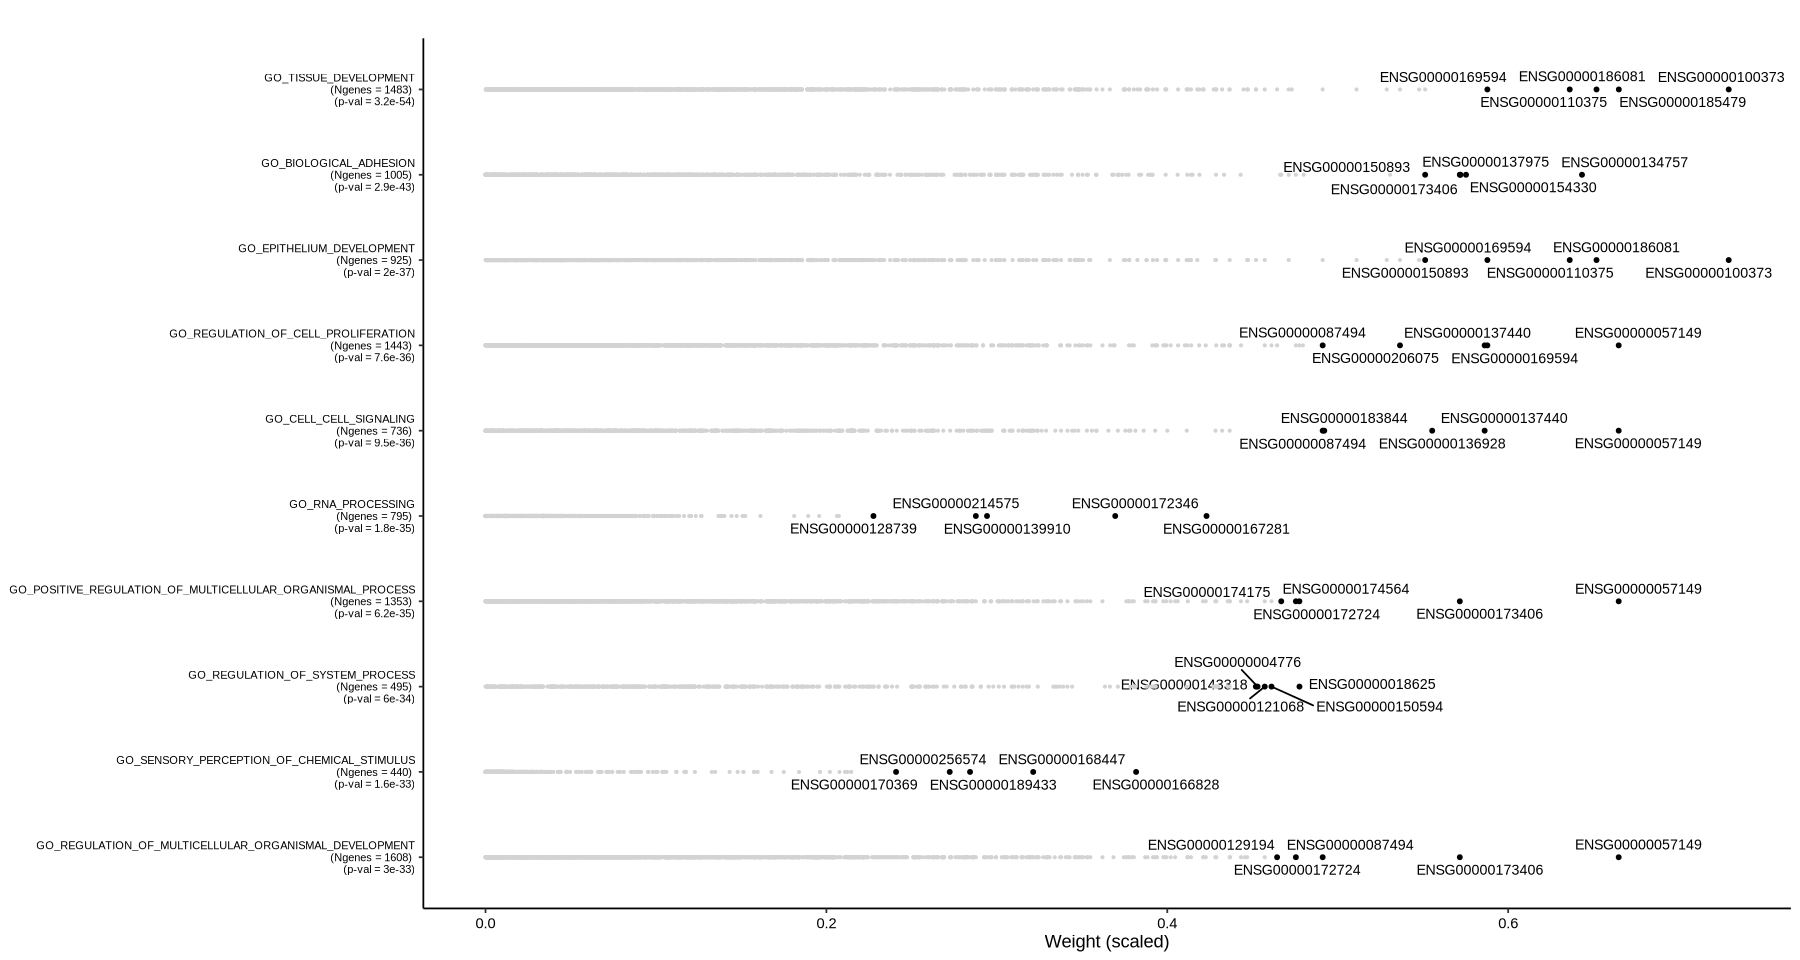

In [182]:
# Generate the plot and store it in a variable
p <- plot_enrichment_detailed(enrichment.parametric, factor = 5)

p

## GSEA / MSigDB_v6.0_C2_human / methylation

In [191]:
data("MSigDB_v6.0_C2_human")

colnames(MSigDB_v6.0_C2_human) <- paste0(colnames(MSigDB_v6.0_C2_human), "_methylation")
head(colnames(MSigDB_v6.0_C2_human))

enrichment.parametric <- run_enrichment(model,
  view = "Methylation", factors = 1:5,
  feature.sets = MSigDB_v6.0_C2_human
)

[1] "ENSG00000186092_methylation" "ENSG00000237683_methylation"
[3] "ENSG00000235249_methylation" "ENSG00000185097_methylation"
[5] "ENSG00000269831_methylation" "ENSG00000187634_methylation"

Intersecting features names in the model and the gene set annotation results in a total of 18618 features.


Running feature set Enrichment Analysis with the following options...
View: Methylation 
Number of feature sets: 1292 
Set statistic: mean.diff 
Statistical test: parametric 







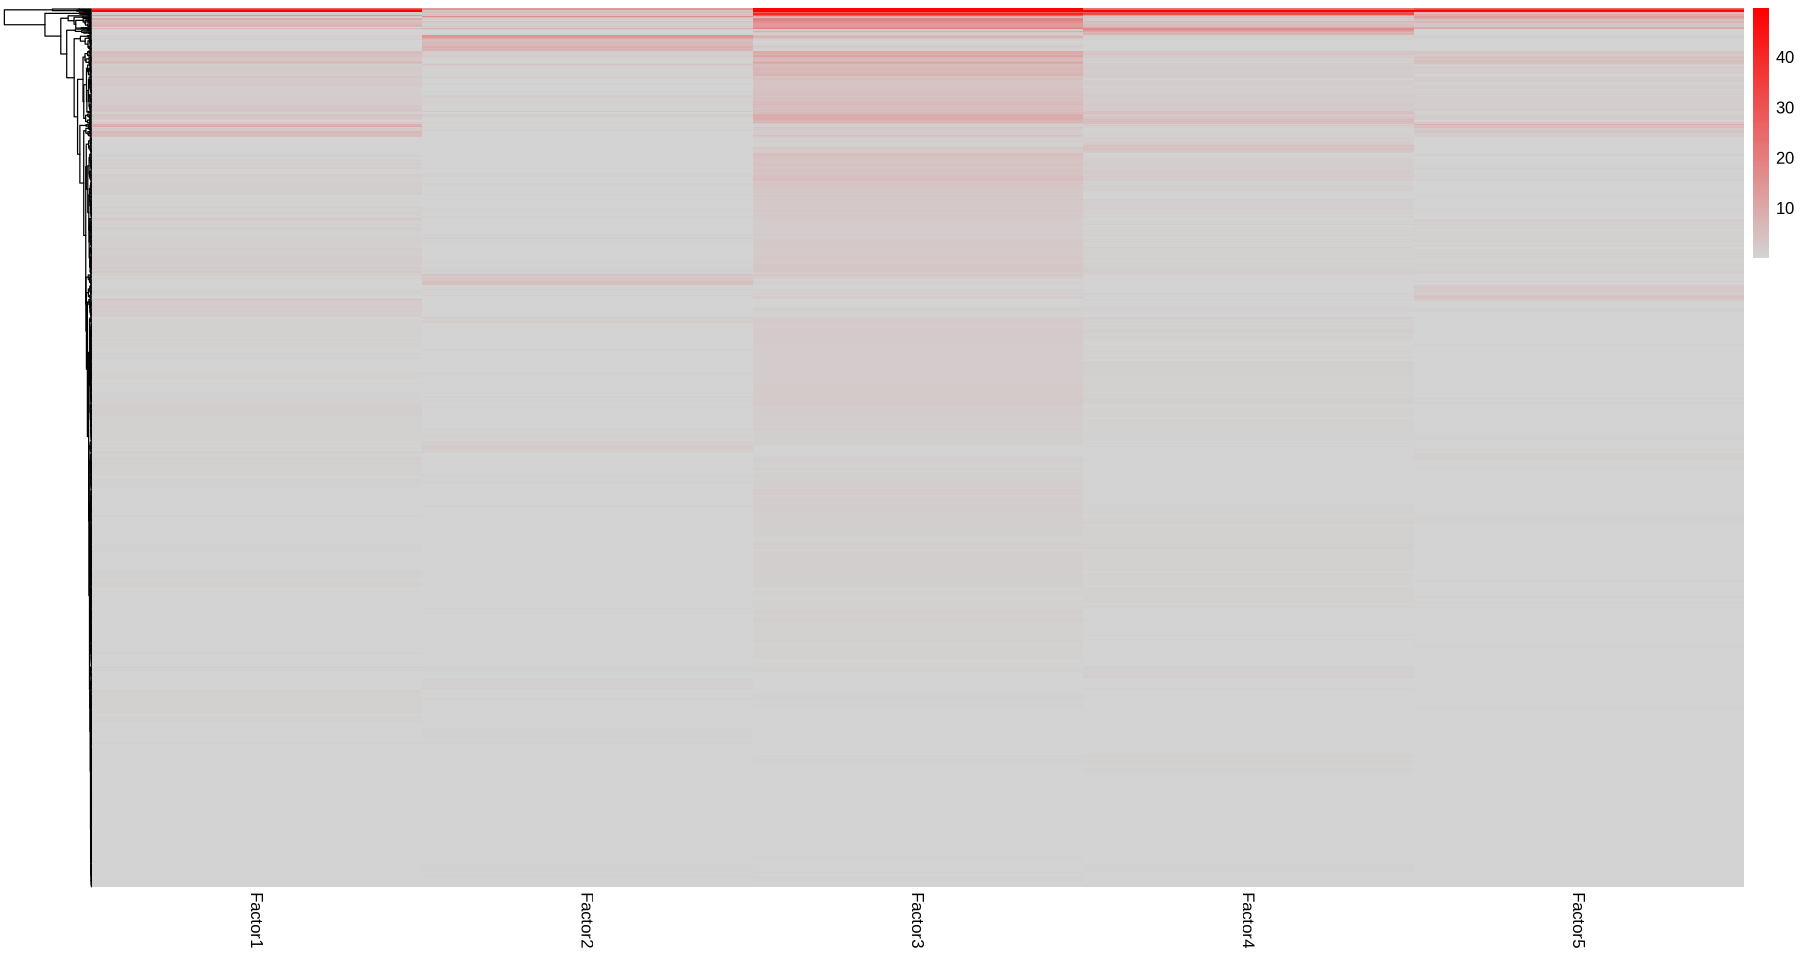

In [192]:
plot_enrichment_heatmap(enrichment.parametric)

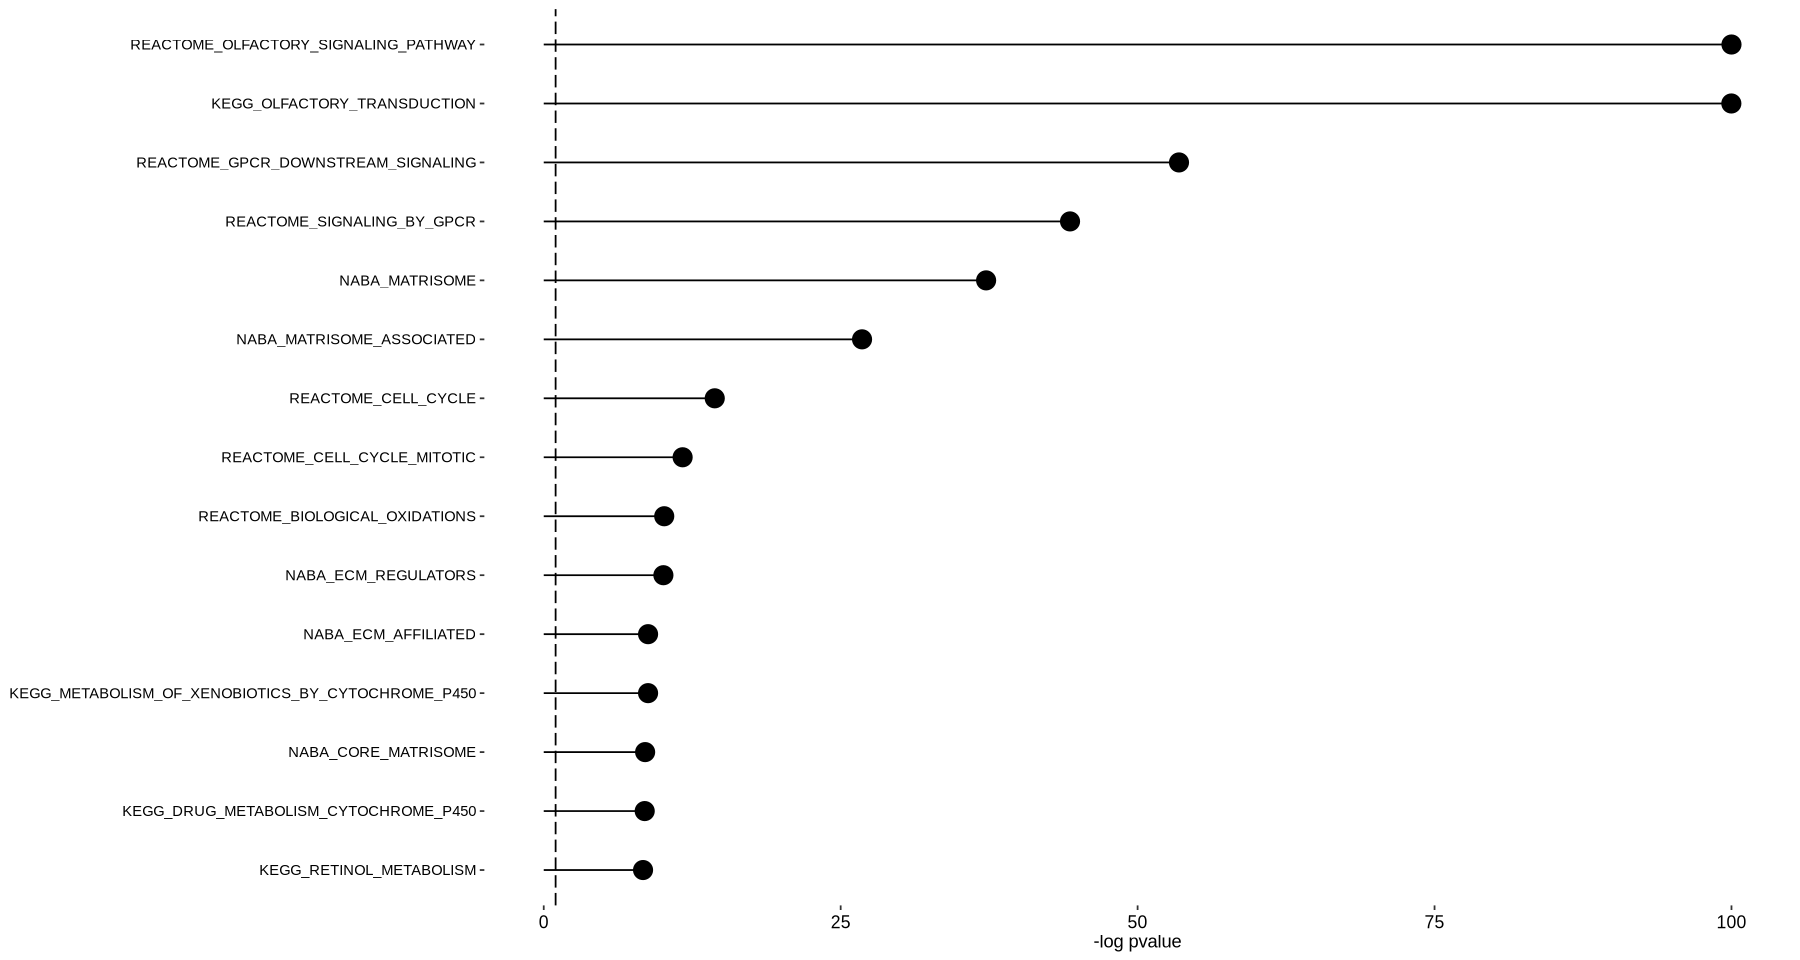

In [193]:
# Generate the plot and store it in a variable
p <- plot_enrichment(enrichment.parametric, factor = 1, max.pathways = 15)
p

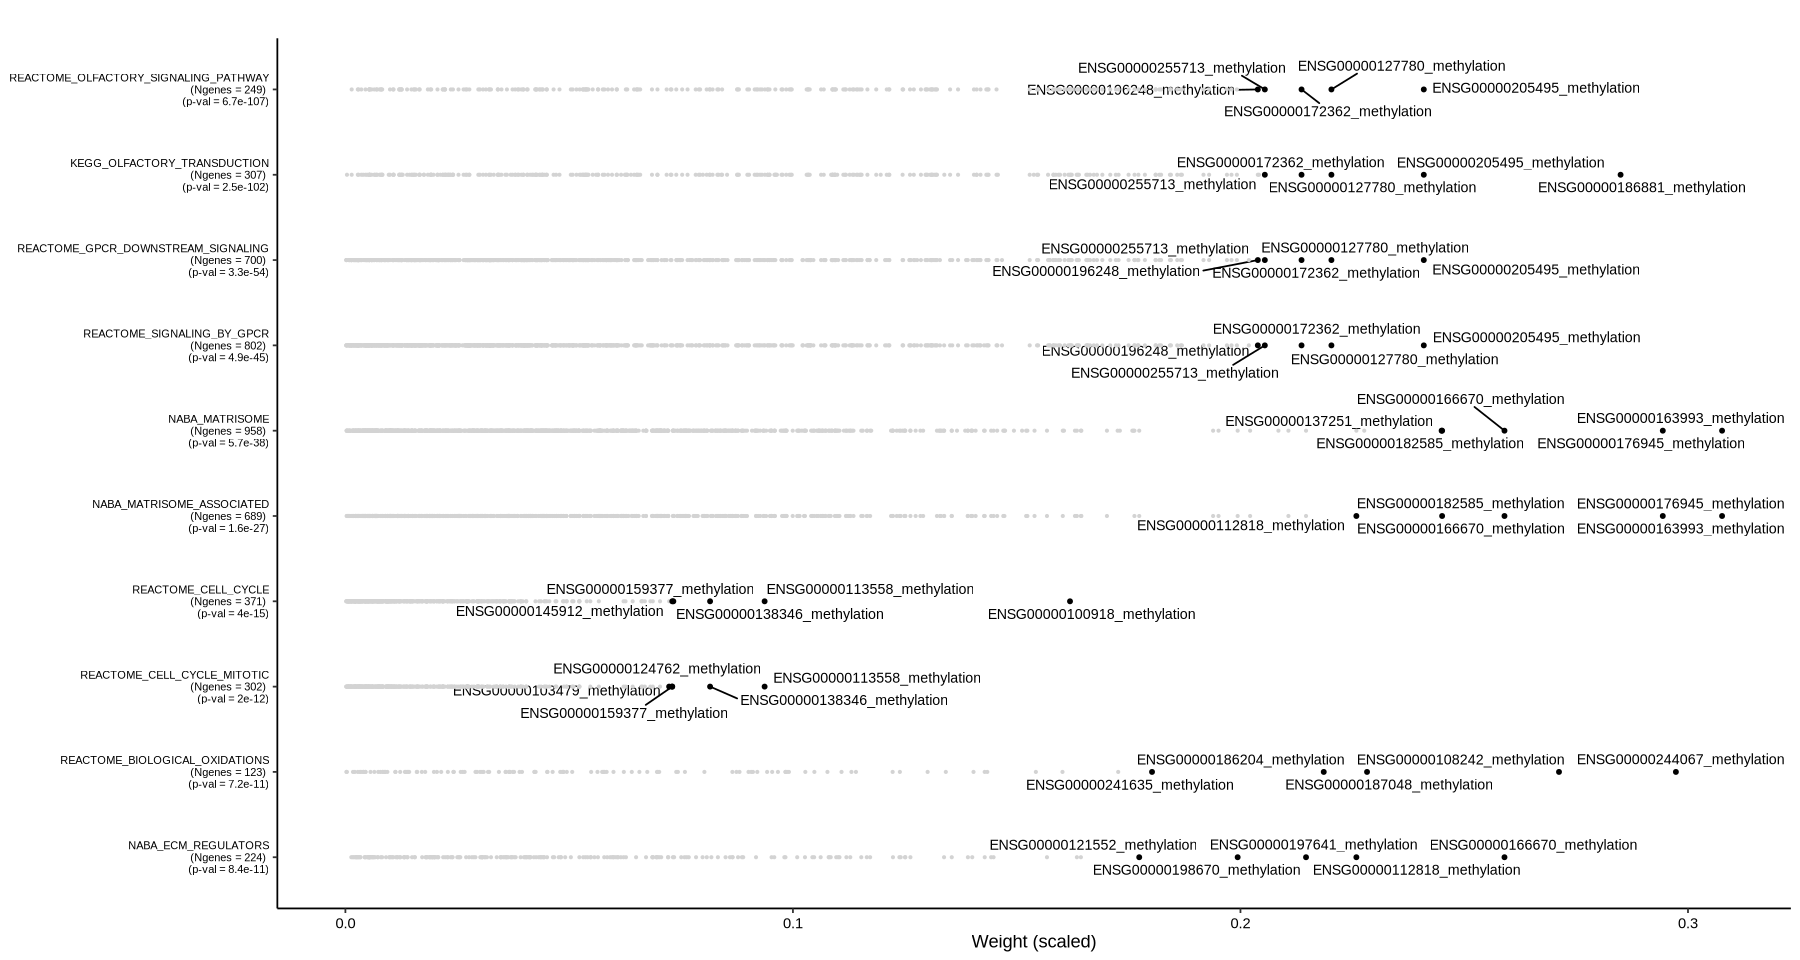

In [199]:
# Generate the plot and store it in a variable
p <- plot_enrichment_detailed(enrichment.parametric, factor = 1)

p

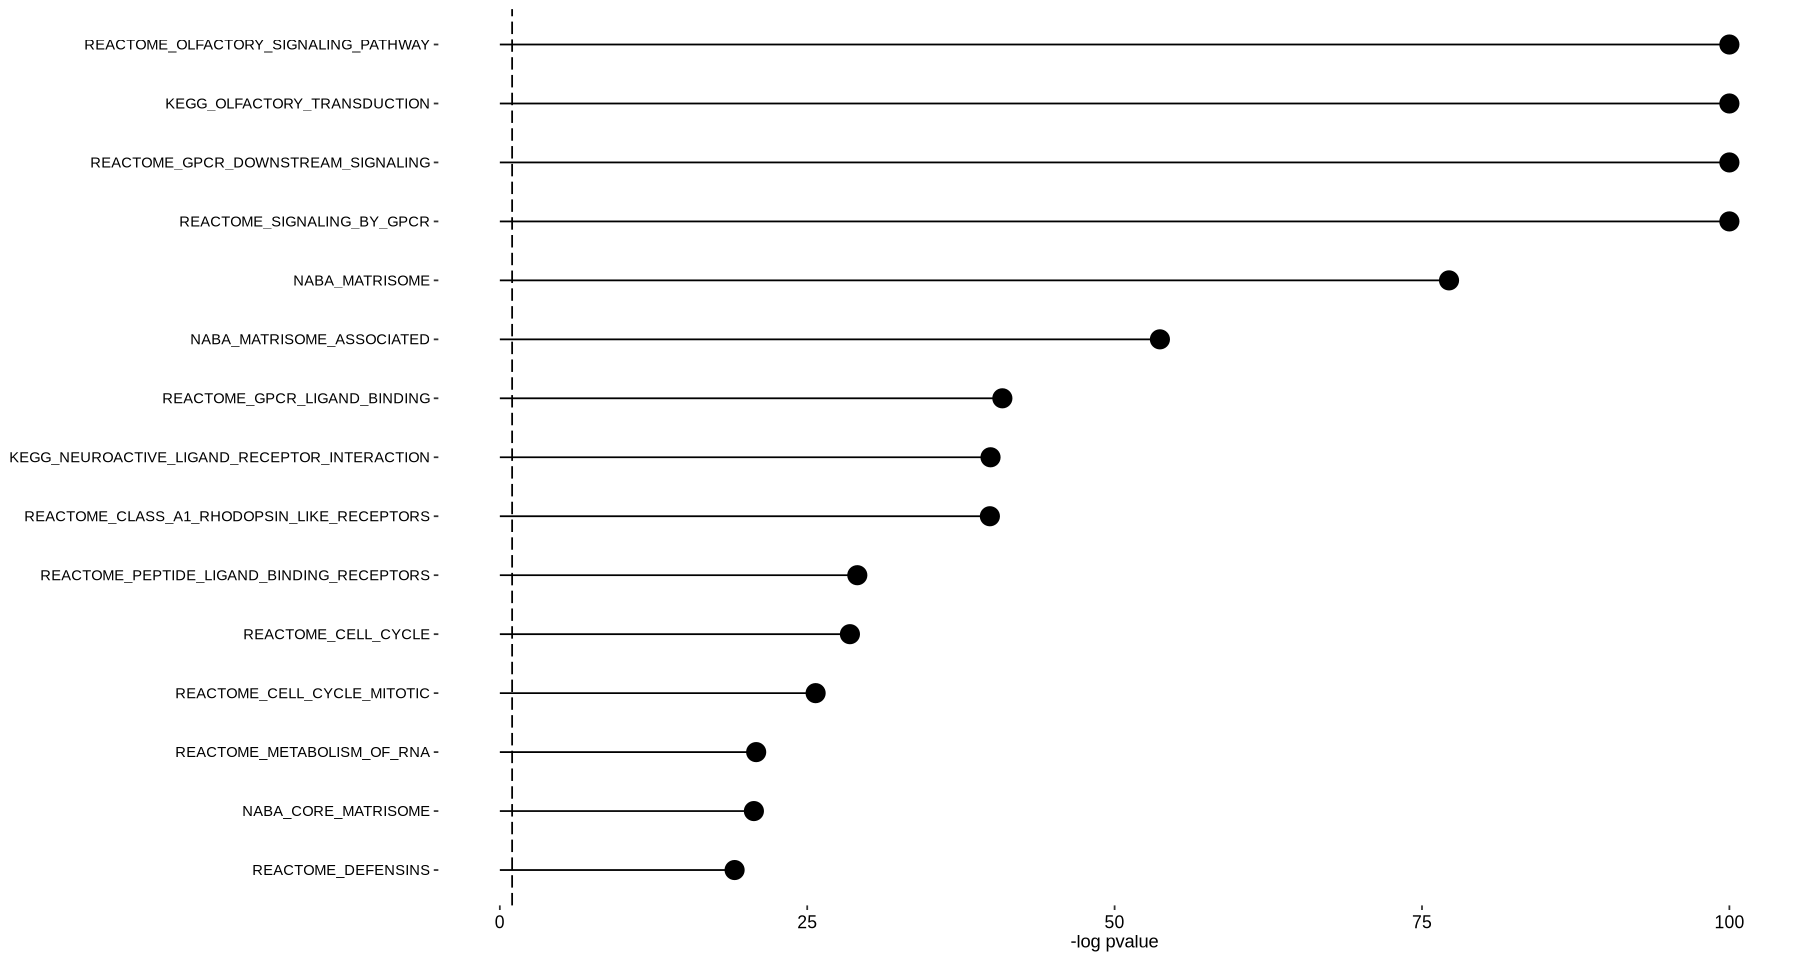

In [196]:
# Generate the plot and store it in a variable
p <- plot_enrichment(enrichment.parametric, factor = 3, max.pathways = 15)

p

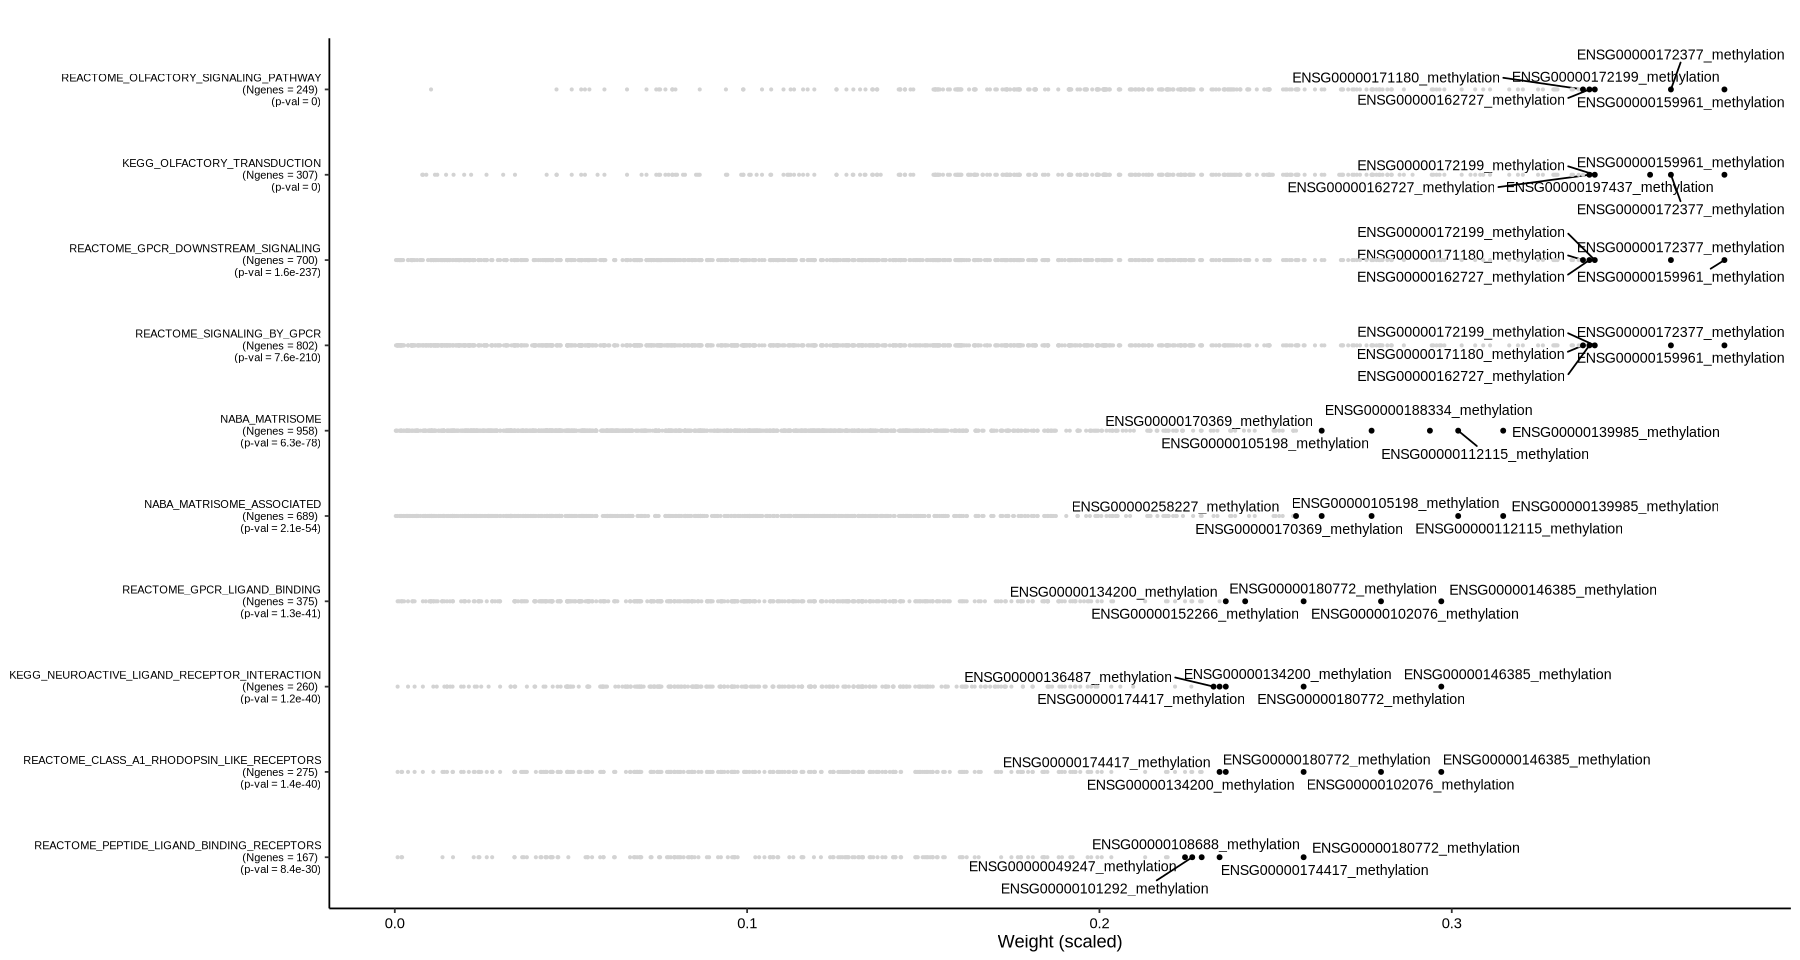

In [200]:
# Generate the plot and store it in a variable
p <- plot_enrichment_detailed(enrichment.parametric, factor = 3)

p

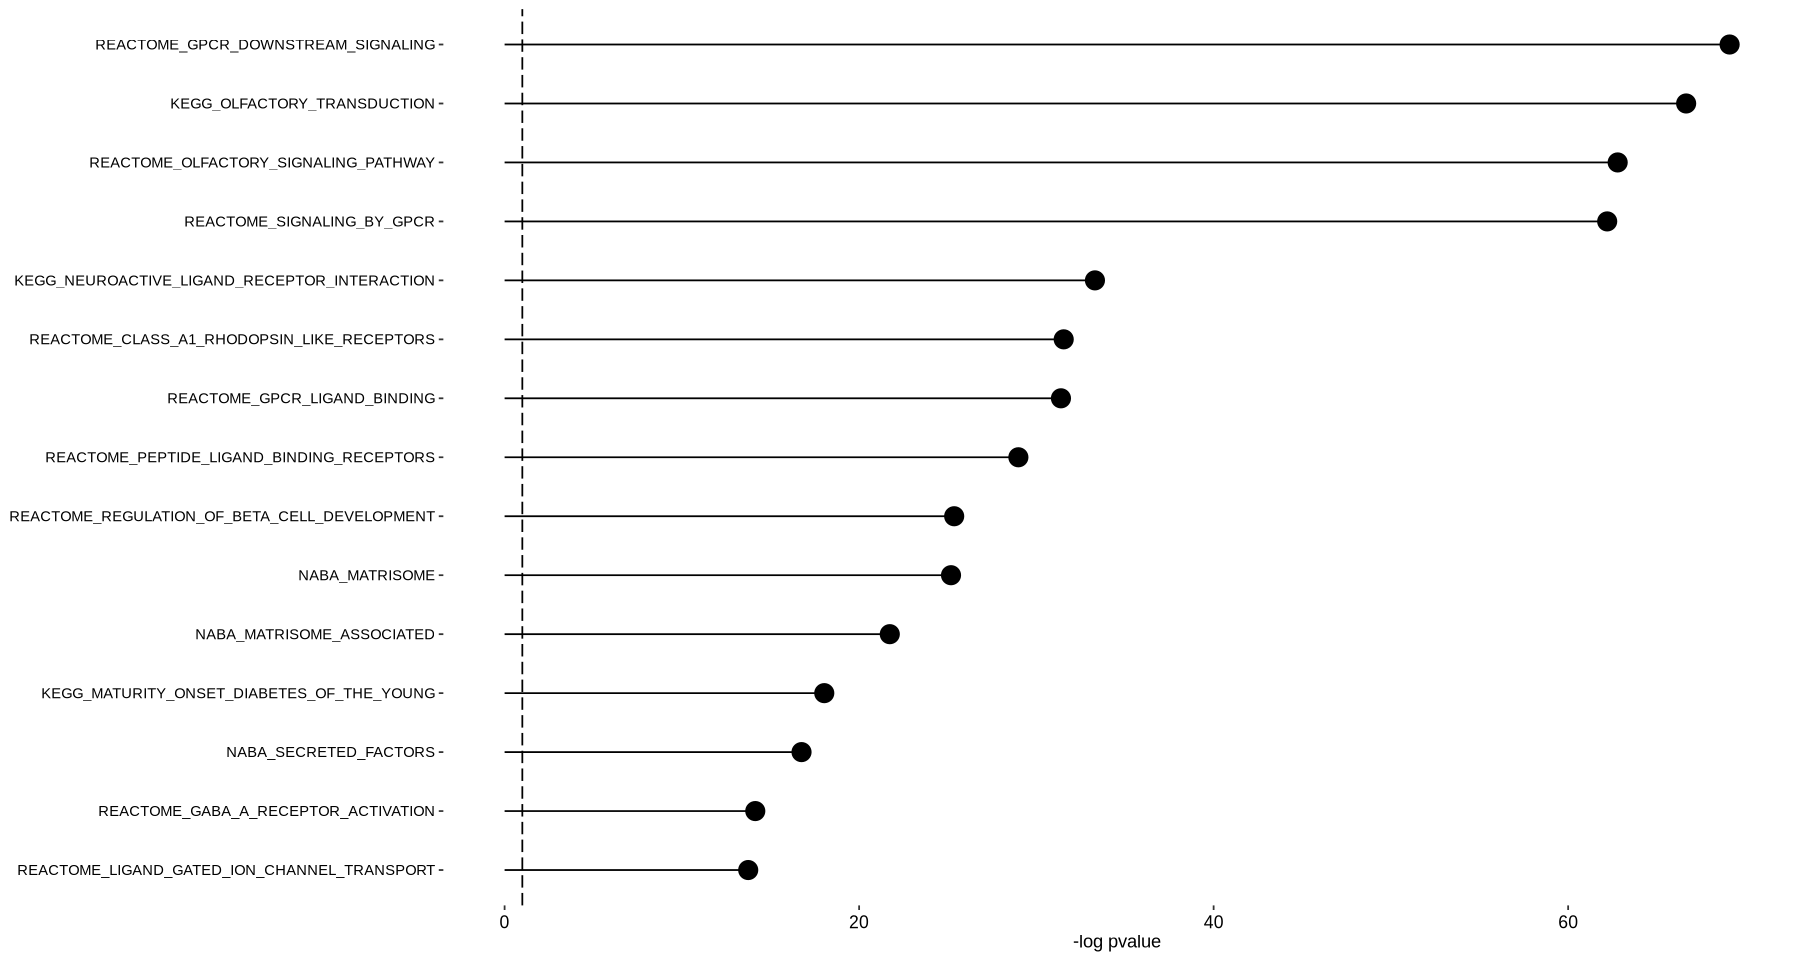

In [198]:
# Generate the plot and store it in a variable
p <- plot_enrichment(enrichment.parametric, factor = 4, max.pathways = 15)

p

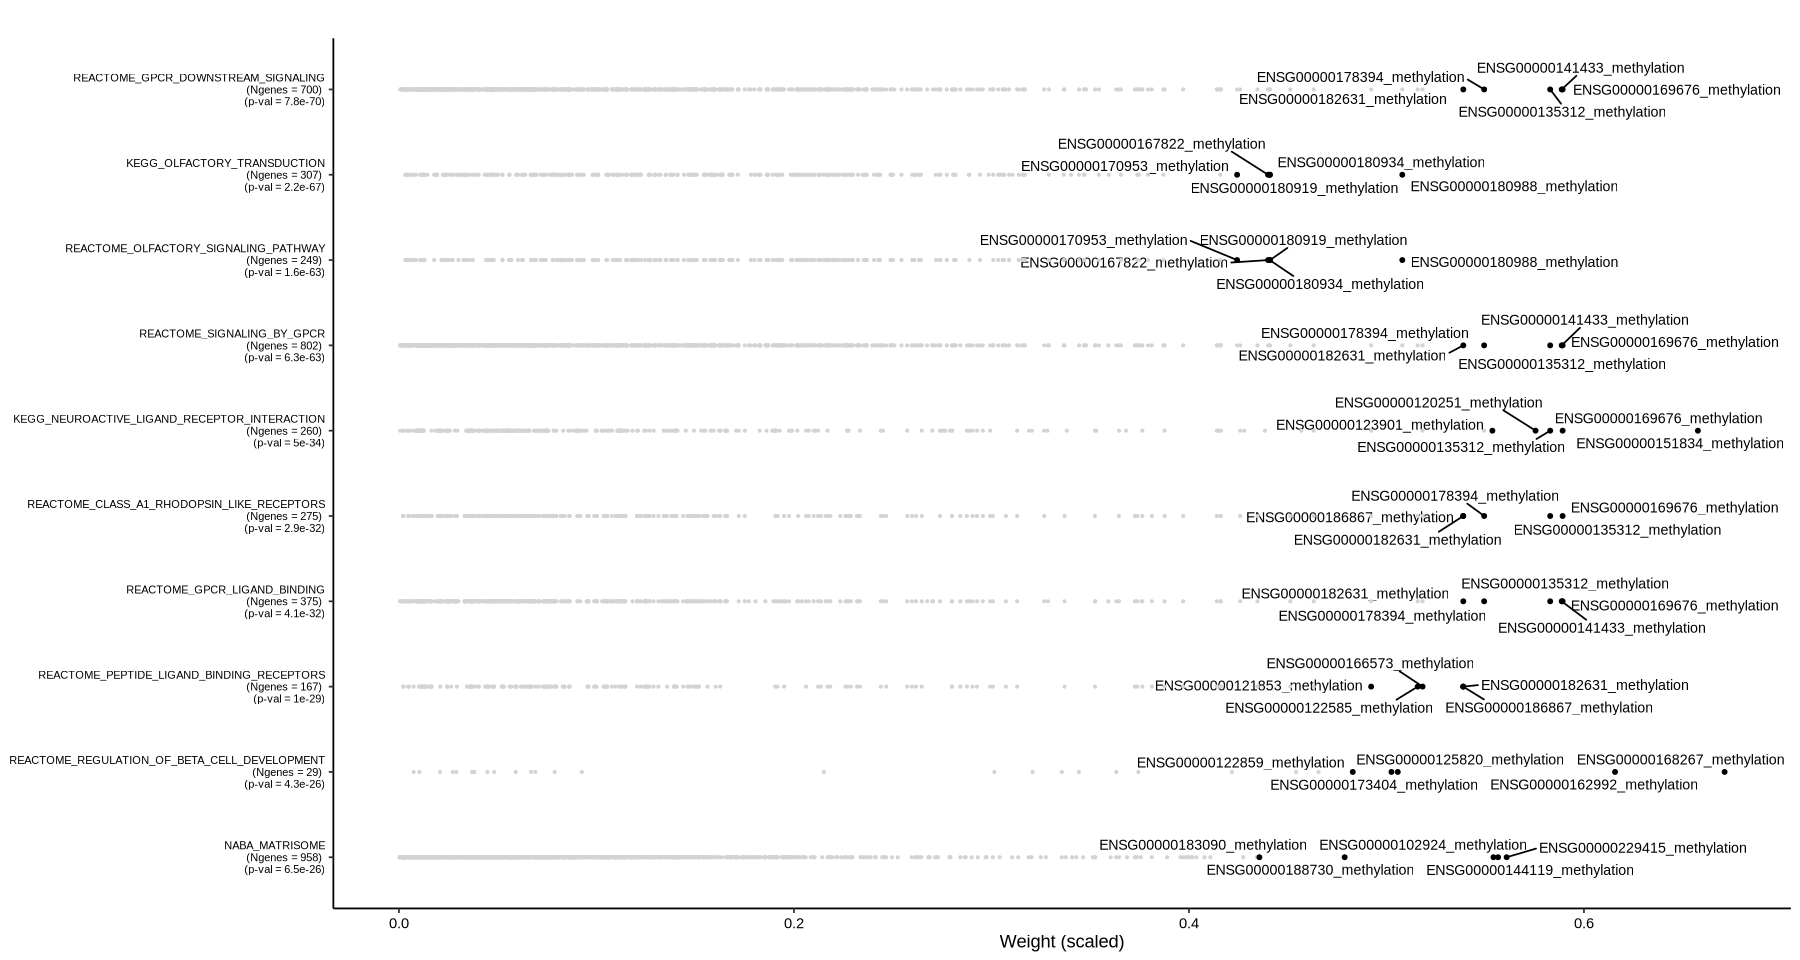

In [201]:
# Generate the plot and store it in a variable
p <- plot_enrichment_detailed(enrichment.parametric, factor = 4)

p

## GSEA / MSigDB_v6.0_C5_human / methylation

In [202]:
data("MSigDB_v6.0_C5_human")

colnames(MSigDB_v6.0_C5_human) <- paste0(colnames(MSigDB_v6.0_C5_human), "_methylation")
head(colnames(MSigDB_v6.0_C5_human))

enrichment.parametric <- run_enrichment(model,
  view = "Methylation", factors = 1:5,
  feature.sets = MSigDB_v6.0_C5_human
)

[1] "ENSG00000186092_methylation" "ENSG00000237683_methylation"
[3] "ENSG00000235249_methylation" "ENSG00000185097_methylation"
[5] "ENSG00000269831_methylation" "ENSG00000187634_methylation"

Intersecting features names in the model and the gene set annotation results in a total of 18618 features.


Running feature set Enrichment Analysis with the following options...
View: Methylation 
Number of feature sets: 4407 
Set statistic: mean.diff 
Statistical test: parametric 







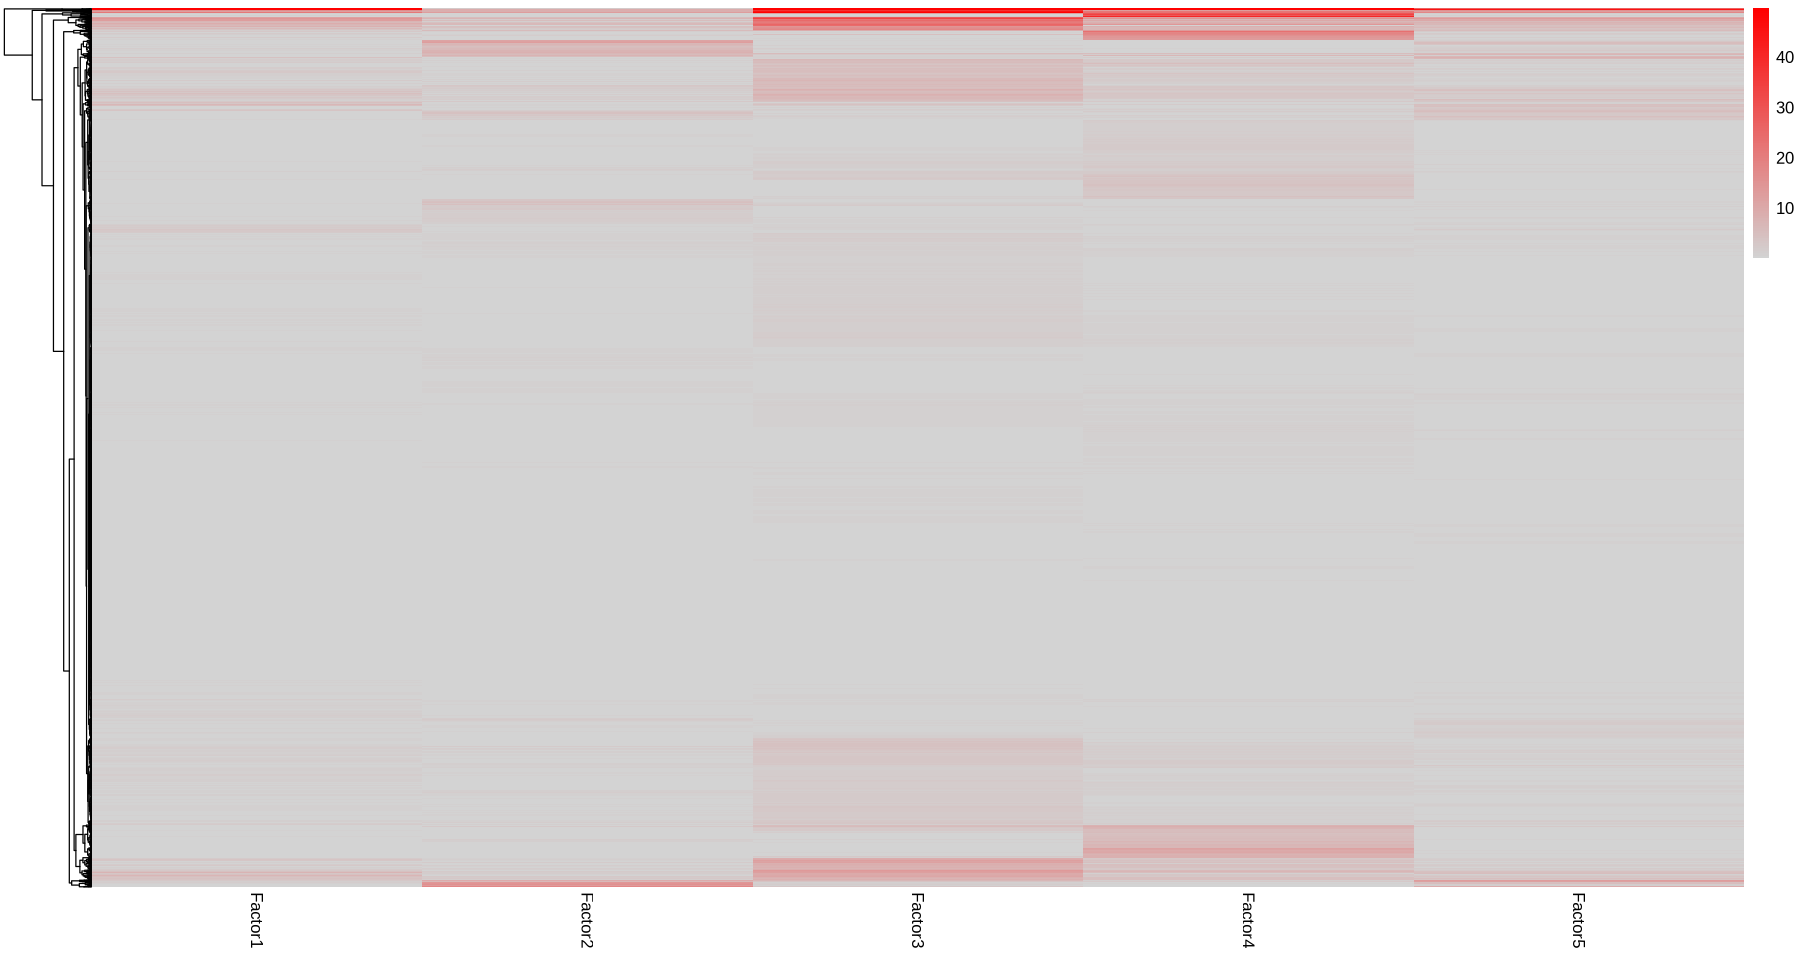

In [203]:
plot_enrichment_heatmap(enrichment.parametric)

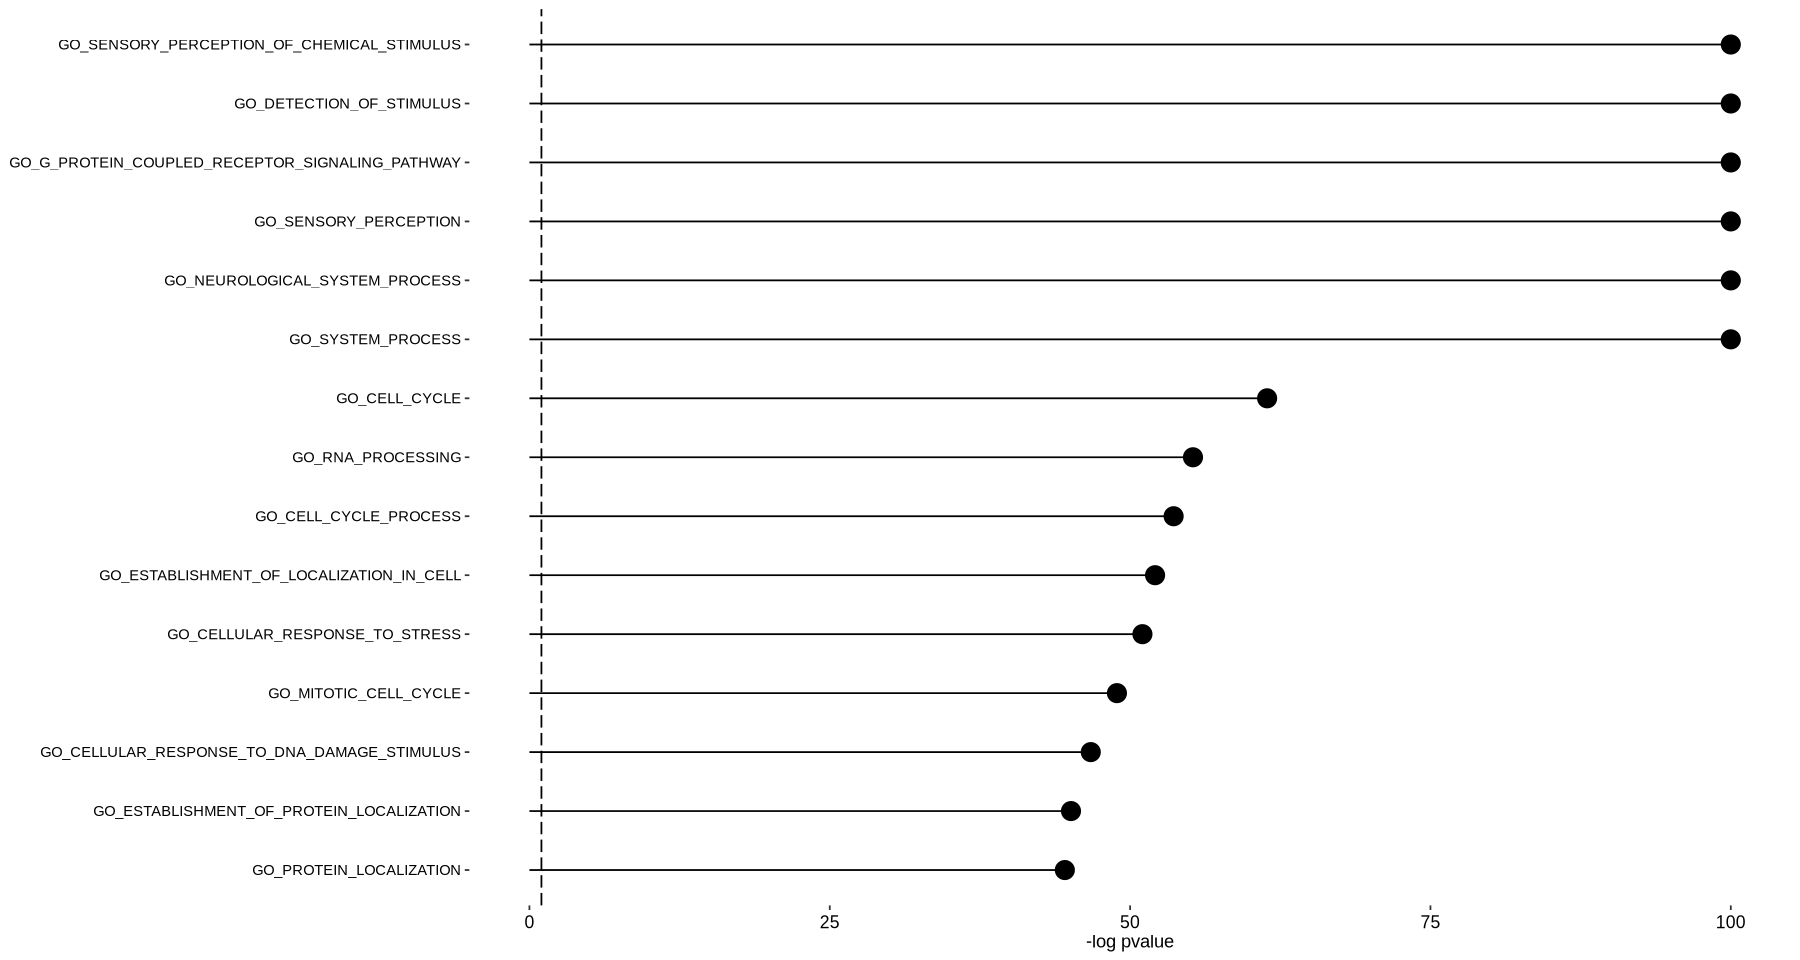

In [204]:
# Generate the plot and store it in a variable
p <- plot_enrichment(enrichment.parametric, factor = 3, max.pathways = 15)

p

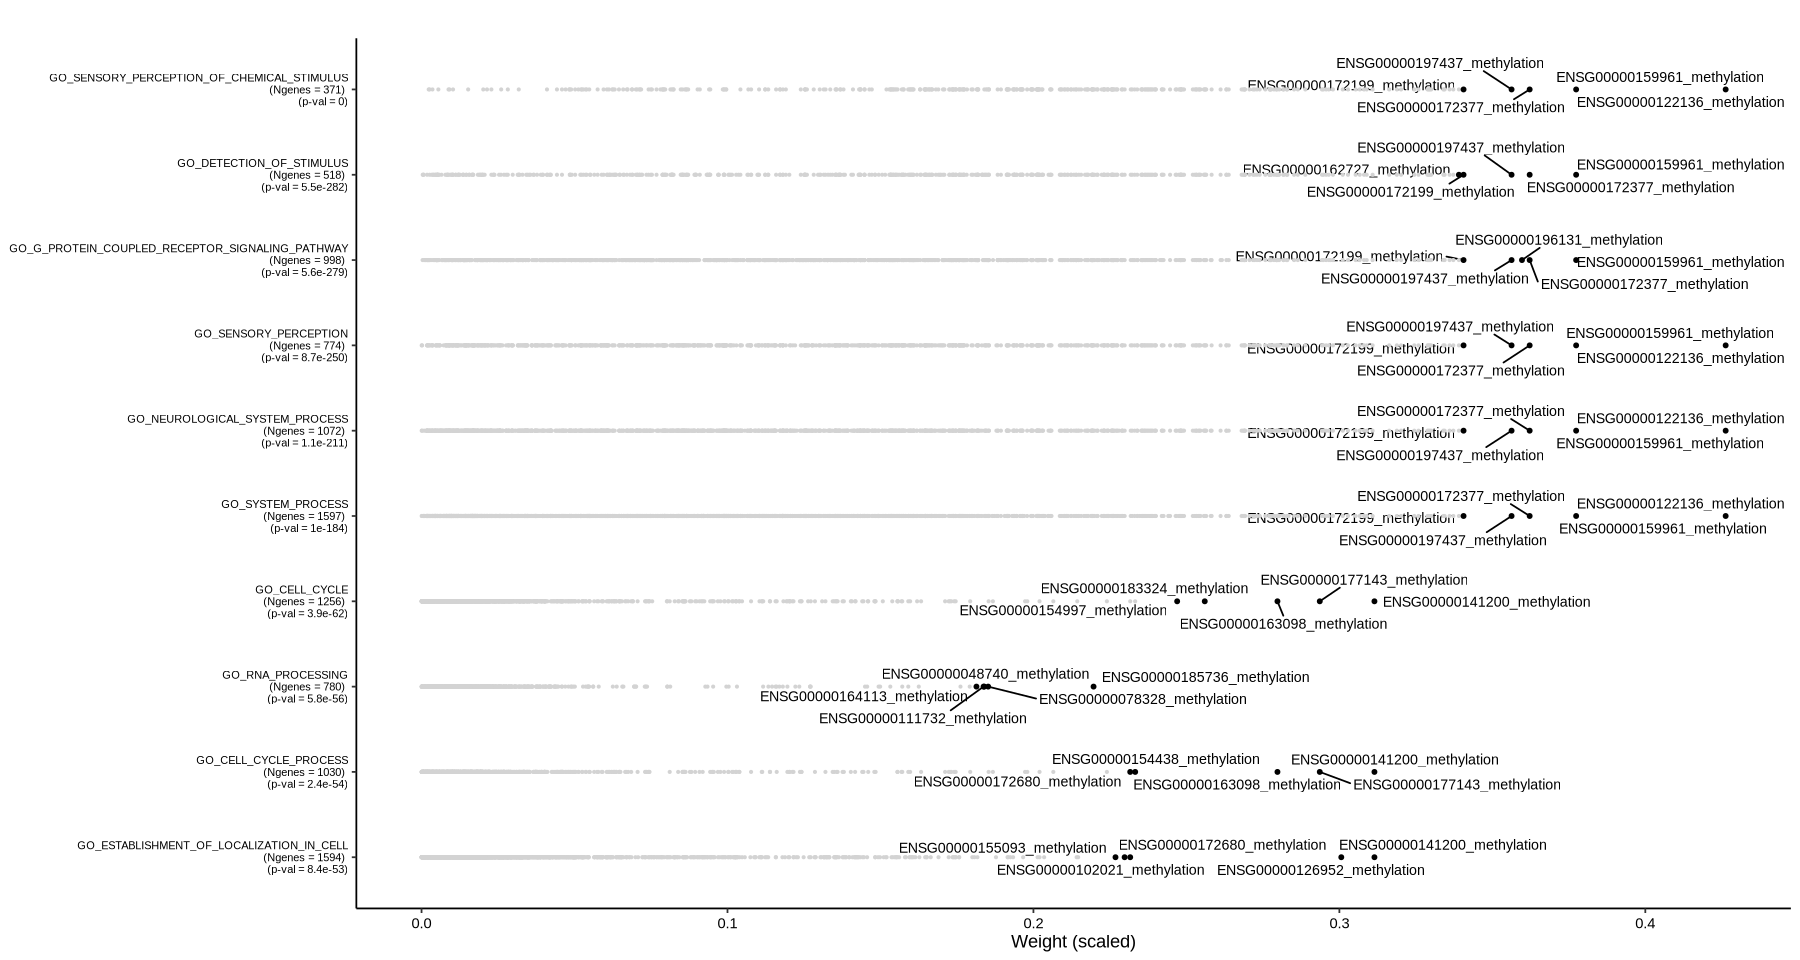

In [205]:
# Generate the plot and store it in a variable
p <- plot_enrichment_detailed(enrichment.parametric, factor = 3)

p

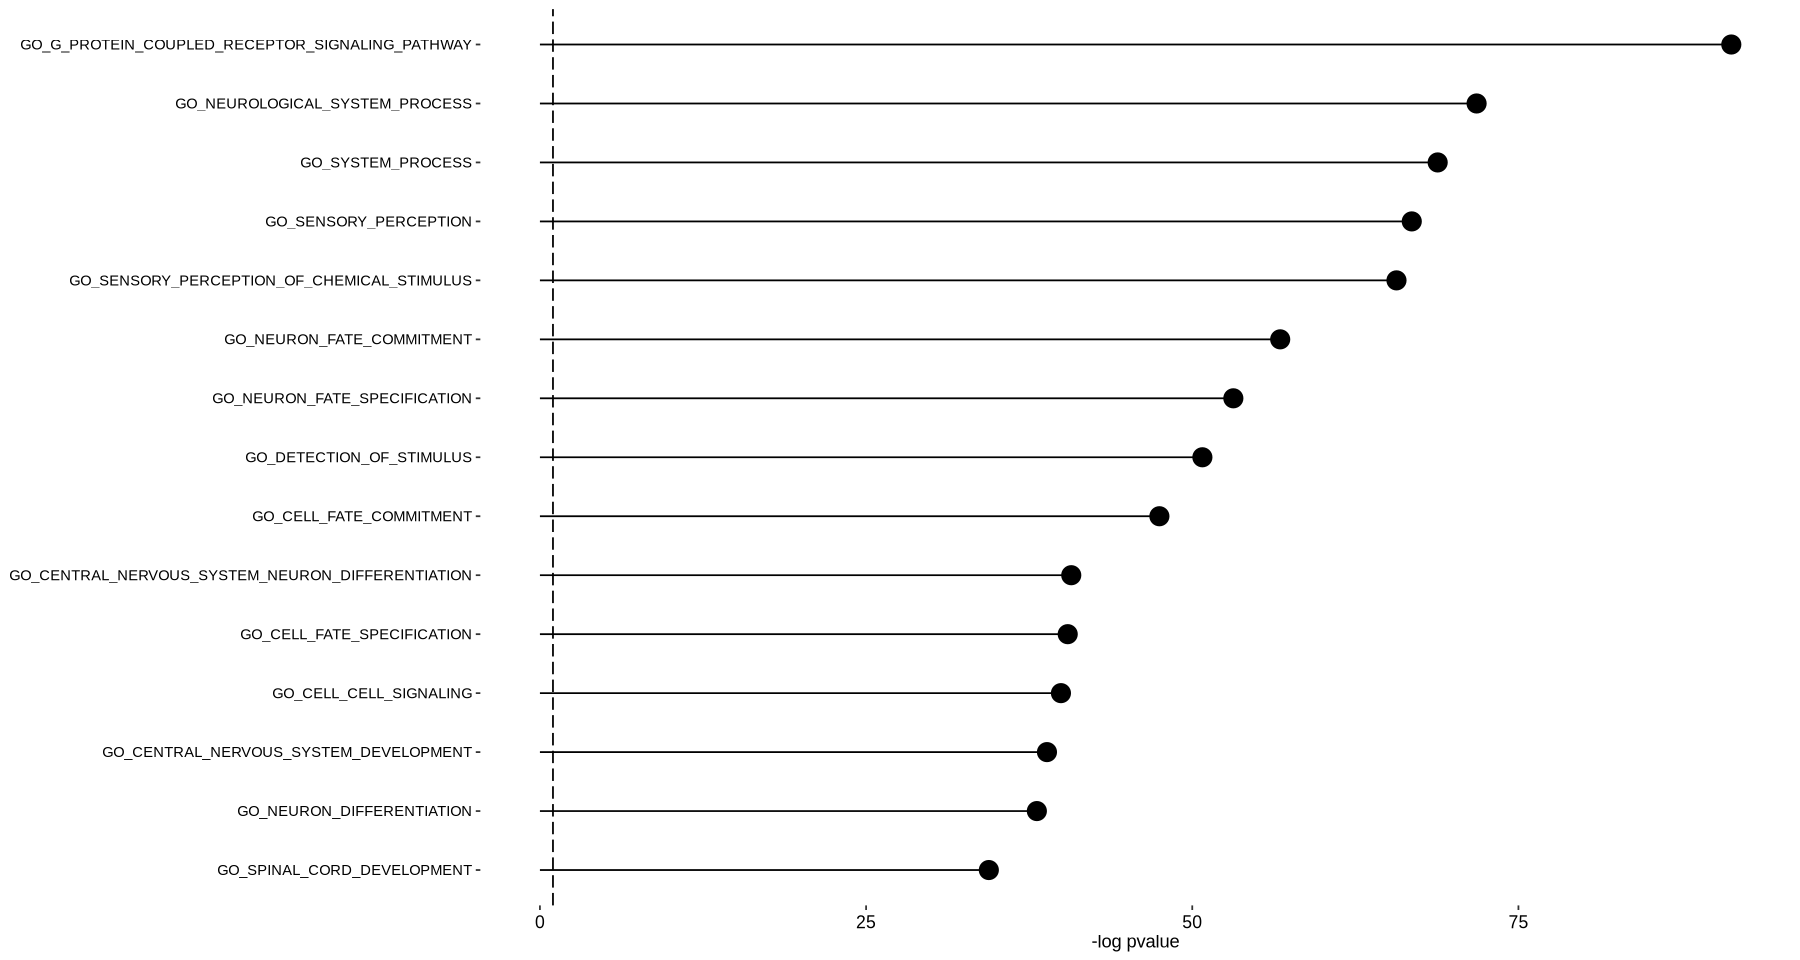

In [206]:
# Generate the plot and store it in a variable
p <- plot_enrichment(enrichment.parametric, factor = 4, max.pathways = 15)

p

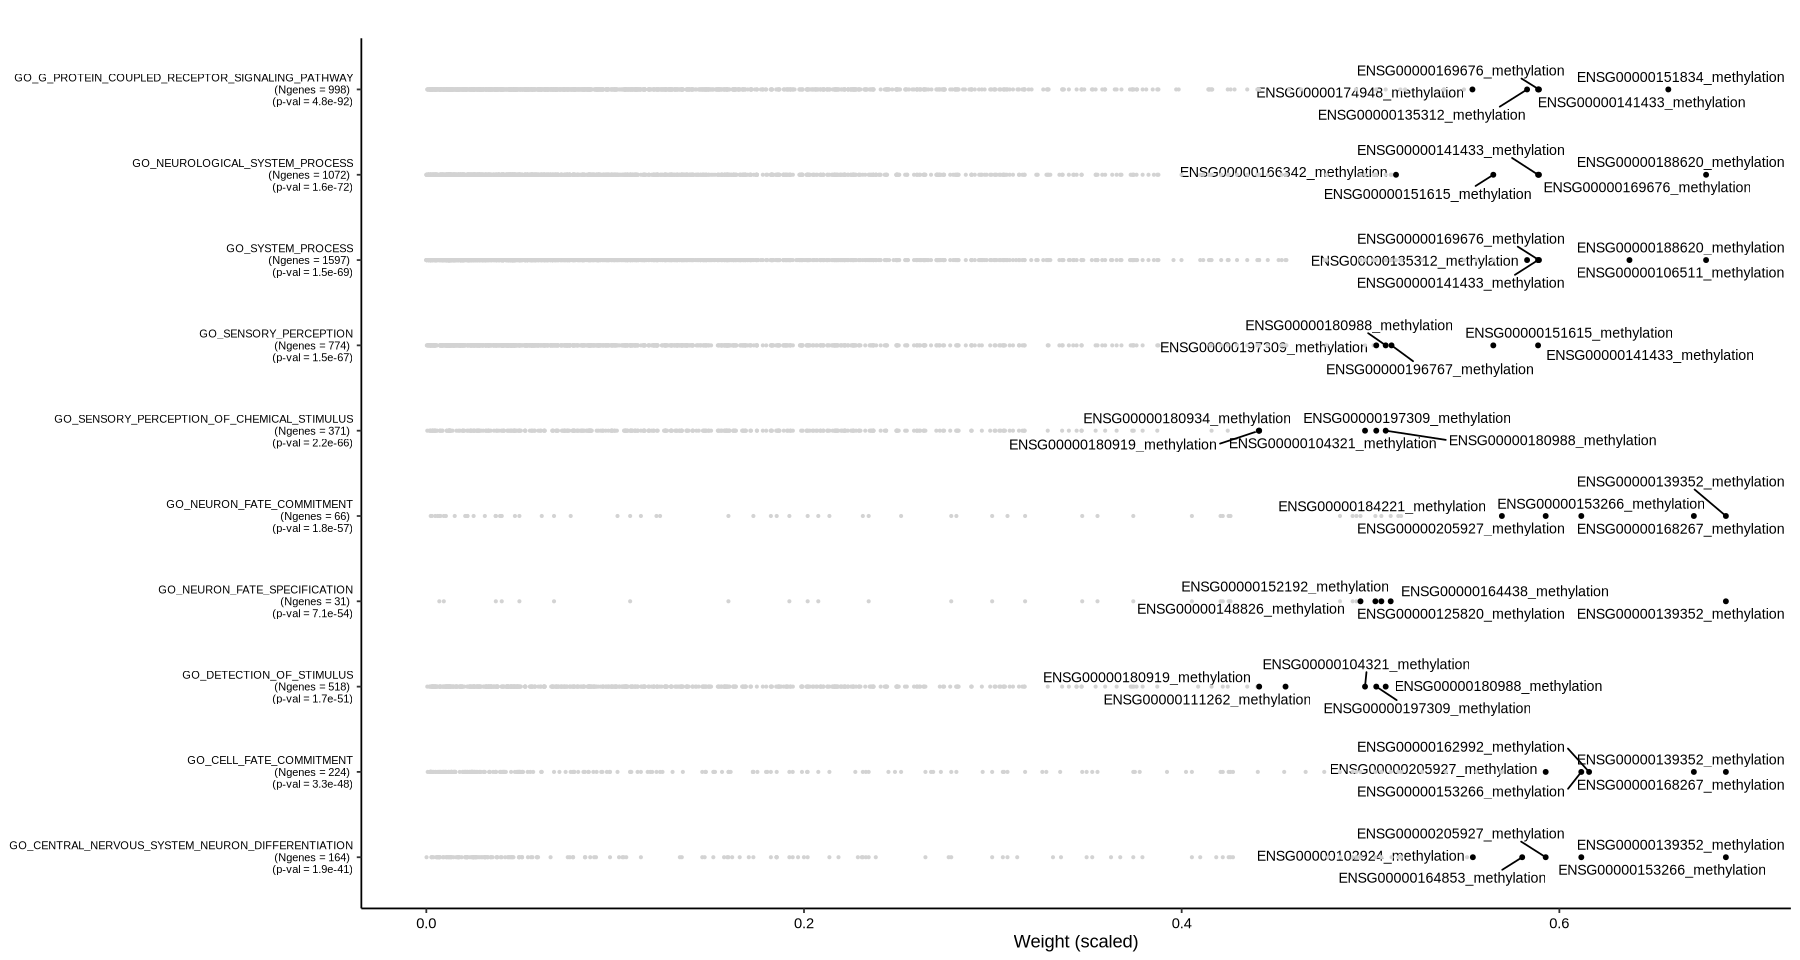

In [207]:
# Generate the plot and store it in a variable
p <- plot_enrichment_detailed(enrichment.parametric, factor = 4)

p